## Условия

**Описание проекта:**

Вы работаете аналитиком в международной компании, занимающейся производством и продажами климатического оборудования: систем кондиционирования и вентиляции. На одной из выставок, посвященной климатическому оборудованию, группа инженеров из дружественной компании предоставила результаты своего исследования: данные по использованию климатических систем в офисах разных стран, городов, а также оценочные данные от респондентов по тому, насколько им комфортно было находиться в заданных условиях. Руководство поставило вам задачу проанализировать полученные данные и предоставить выводы о том, в какой тип климатического оборудования стоит инвестировать больше, чтобы повысить удовлетворенность клиентов созданными условиями в зависимости от региона? И на что стоит обратить внимание при развитии бизнеса в разных регионах?


**Описание данных**

*Год* - Год проведения исследования

*Время* года - Весна, лето, осень, зима

*Климат* - Название типа климата

*Город* - Город, где было проведено исследование

*Страна* - Страна, где было проведено исследование

*Способ охлаждения*

	- Кондиционирование = может быть разных типов, окна закрыты.
	- Вентиляция = механические системы вентиляции и естественное охлаждение.
	- Смешанный = механическое охлаждение, окна могут быть как открыты, так и закрыты.
	- NA = не применимо, например исследование холодной зимой, когда включено отопление.

*Режим при смешанном типе охлаждения*

		- NA = здания, не относящиеся к смешанному типу.
		- Кондиционер = кондиционер включен, окна закрыты.
		- Вентиляция = кондиционер выключен, окна открыты/механическая
	вентиляция.

*Способ обогрева*

	- Механическое отопление = в здании имеется механическая система отопления (переносные обогреватели не считаются механическим отоплением на уровне здания).
	- NA = отсутствие механического отопления, неизвестно или исследование только в жаркую летнюю погоду.

*Возраст* - Возраст респондента

*Пол* - Пол респондента

*Ощущение температуры* - Оценка температуры по ощущениям: от -3 (холодно) до +3 (горячо)

*Ощущение температуры (bool)* - 0 = неприемлемо, 1 = приемлемо

*Предпочтительное изменение температуры* - Без изменений, теплее, холоднее

*Ощущение движения воздуха (bool)* - 0 = неприемлемо, 1 = приемлемо

*Предпочтительное изменение движения воздуха* - Меньше, без изменений, больше

*Оценка комфорта* - От 1 (очень неудобно) до 6 (очень комфортно)

*Утепление* - Фактор связанный с одеждой респондента

*Температура воздуха в помещении* - Измеренная температура в помещении

*Температура воздуха на улице* - Измеренная температура на улице

*RH* - Относительная влажность

*Скорость воздуха* - Скорость воздуха, м/с

*Рост* - Рост респондента

*Вес* - Вес респондента

*Занавески* - 0 = открыто, 1 = закрыто; если неизвестно - нет данных

*Вентилятор* - Режим вентилятора: 0 = выключен, 1 = включен; если неизвестно - нет данных

*Окно* - 0 = открыто, 1 = закрыто; если неизвестно - нет данных

*Двери* - 0 = открыты, 1 = закрыты; если неизвестно - нет данных

*Отопление* - Режим обогрева: 0 -выключен, 1 - включен; если неизвестно - нет данных

*Среднемесячная температура на улице* - Среднемесячная температура наружного воздуха на момент исследования, C.

*Количество рекламаций* - Количество жалоб на установленное оборудование, полученных от клиента, за прошедший период


## Шаг 0. Импорт библиотек

In [1]:
# блок 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# блок 3
from scipy.stats import shapiro, spearmanr, pearsonr, chi2_contingency
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal

In [3]:
# блок 4
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error
from IPython.display import display

## Шаг 1. Исследование и предобработка

### Загрузка датасета + просмотр значений

In [4]:
fn = "data_1.csv"
df = pd.read_csv(fn, delimiter=";")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

год время_года                       климат  город страна  \
0  2011.0       Лето  Cубтропический океанический  Техас    США   
1  2011.0       Лето  Cубтропический океанический  Техас    США   
2  2011.0       Лето  Cубтропический океанический  Техас    США   

   способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
0  Кондиционирование                                 NaN             NaN   
1  Кондиционирование                                 NaN             NaN   
2  Кондиционирование                                 NaN             NaN   

   возраст  пол  ...  скорость_воздуха  рост вес  занавески вентилятор  окно  \
0     22.0  NaN  ...              0.26   NaN NaN        1.0        1.0   NaN   
1     40.0  NaN  ...              0.12   NaN NaN        0.0        0.0   NaN   
2     42.0  NaN  ...              0.08   NaN NaN        0.0        0.0   NaN   

   двери  отопление  среднемесячная_температура_на_улице  \
0    NaN        NaN                                 28.9   
1    NaN        NaN                                 84.0   
2    NaN        NaN                                 32.8   

   количество_рекламаций  
0                      0  
1                      0  
2                      0  

[3 rows x 30 columns]

In [5]:
# Correction values
def custom_correct():
    global df
    replace_climat = {"Cубтроп океанич": "Cубтропический океанический"}
    replace_delta_temp = {"Холодн": "Холоднее", "Тепле": "Теплее"}
    df["климат"] = df["климат"].apply(
        lambda x: replace_climat[x] if x in replace_climat.keys() else x
    )
    df["предпочтительное_изменение_температуры"] = df[
        "предпочтительное_изменение_температуры"
    ].apply(lambda x: replace_delta_temp[x] if x in replace_delta_temp.keys() else x)



def dtype_to_int(cols: list):
    for col in cols:
        df[col] = df[col].astype(int)

In [6]:
custom_correct()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          484 non-null    float64
 1   время_года                                   484 non-null    object 
 2   климат                                       484 non-null    object 
 3   город                                        484 non-null    object 
 4   страна                                       484 non-null    object 
 5   способ_охлаждения                            484 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          337 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      413 non-null    float64
 9   пол                                          412 non-null    object 
 10  ощ

### Графический анализ исходных данных

In [7]:
nominal_columns = ["время_года", "климат", "город", "страна", "способ_охлаждения",
                   "режим_при_смешанном_типе_охлаждения", "способ_обогрева",
                   "пол", "ощущение_температуры_(bool)",
                   "предпочтительное_изменение_температуры",
                   "предпочтительное_изменение_движения_воздуха", "окно",
                    "двери", "отопление"
                   ]
sequenced_columns = ["год", "оценка_комфорта"]
numeric_columns = ["возраст", "ощущение_температуры", "утепление",
                   "температура_воздуха_в_помещении",
                   "температура_воздуха_на_улице",
                   "rh", "скорость_воздуха", "рост", "вес",
                   "среднемесячная_температура_на_улице", "количество_рекламаций"
                   ]

In [8]:
df[numeric_columns].head(3)

возраст  ощущение_температуры  утепление  температура_воздуха_в_помещении  \
0     22.0                   0.0       0.54                             22.9   
1     40.0                  -2.0       0.61                             74.8   
2     42.0                   1.0       0.57                             25.6   

   температура_воздуха_на_улице    rh  скорость_воздуха  рост  вес  \
0                          22.8  48.9              0.26   NaN  NaN   
1                          23.7  39.2              0.12   NaN  NaN   
2                          24.5  34.7              0.08   NaN  NaN   

   среднемесячная_температура_на_улице  количество_рекламаций  
0                                 28.9                      0  
1                                 84.0                      0  
2                                 32.8                      0

#### Пропуски

In [9]:
def show_nans_bar(dataframe):
    cols_with_nans = list(filter(lambda x: any(dataframe[x].isna().values), list(dataframe.columns)))
    copy_df = dataframe.copy()

    for col in cols_with_nans:
        copy_df[col] = len(copy_df[dataframe[col].notna()]) / len(copy_df[col])


    cols_with_nans.sort(key=lambda x: copy_df[x][0], reverse=True)

    plt.clf()
    plt.title("Доля заполненных значений для столбцов исходного датасета")
    sns.barplot(copy_df[cols_with_nans], orient="h")

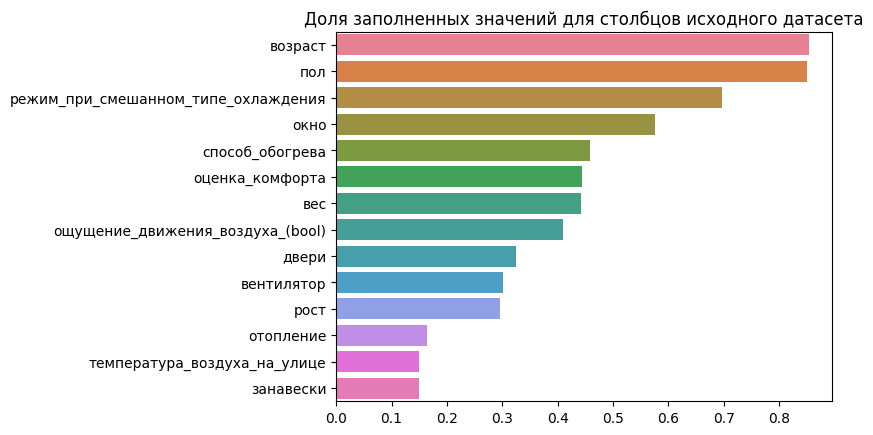

In [10]:
show_nans_bar(df)

Данные ниже оценки комфорта содержат много пропусков, нужно проверять условия задачи. Пока затирать столбцы рано - вдруг пропусков в нужной части датасета меньше и мы потеряем данные

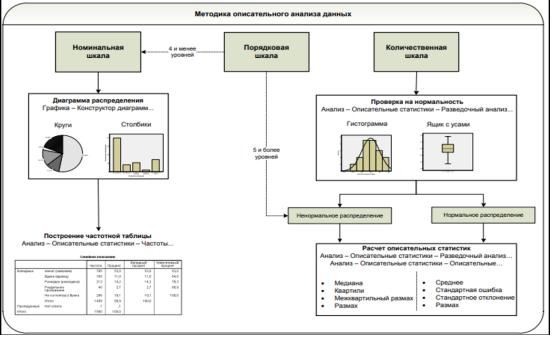

#### Функции для численных шкал

In [11]:
# это для одной количественной колонки
def describe_numeric_column(col):
    fig, axs = plt.subplots(1, 2, figsize=(6, 4))
    sns.set_style("whitegrid")

    custom_title = col.name.capitalize()
    sns.histplot(col, ax=axs[0])
    axs[0].set_title(custom_title, pad=15)

    sns.boxplot(col, ax=axs[1])
    axs[1].set_title(custom_title, pad=15)

    plt.tight_layout()

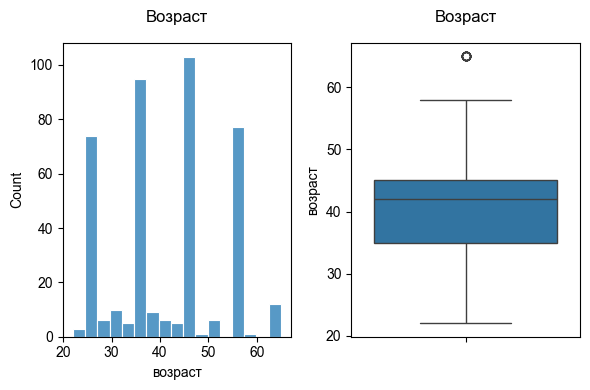

In [12]:
describe_numeric_column(df[numeric_columns[0]])

In [13]:
def show_all_numeric_4(num_sp, dataframe):
    fig, axs = plt.subplots(len(num_sp) // 2, 4, figsize=(12, 2 * len(num_sp)))
    row_index = 0

    sns.set_style("whitegrid")

    for index in range(0, len(num_sp) - 2, 2):

        num_col_1, num_col_2 = num_sp[index], num_sp[index + 1]

        sns.histplot(dataframe[num_col_1], ax=axs[row_index, 0])
        title_1 = num_col_1.capitalize()
        if len(title_1) > 20:
            # тогда лучше посмотреть сбоку у оси
            title_1 = ""

        axs[row_index, 0].set_title(title_1, pad=15)
        sns.boxplot(dataframe[num_col_1], ax=axs[row_index, 1])
        axs[row_index, 1].set_title(title_1, pad=15)

        title_2 = num_col_2.capitalize()
        if len(title_2) > 20:
            # тогда лучше посмотреть сбоку у оси
            title_2 = ""

        sns.histplot(dataframe[num_col_2], ax=axs[row_index, 2])
        axs[row_index, 2].set_title(title_2, pad=15)
        sns.boxplot(dataframe[num_col_2], ax=axs[row_index, 3])
        axs[row_index, 3].set_title(title_2, pad=15)

        row_index += 1
    plt.tight_layout()

Анализируемый столбец подписан у оси

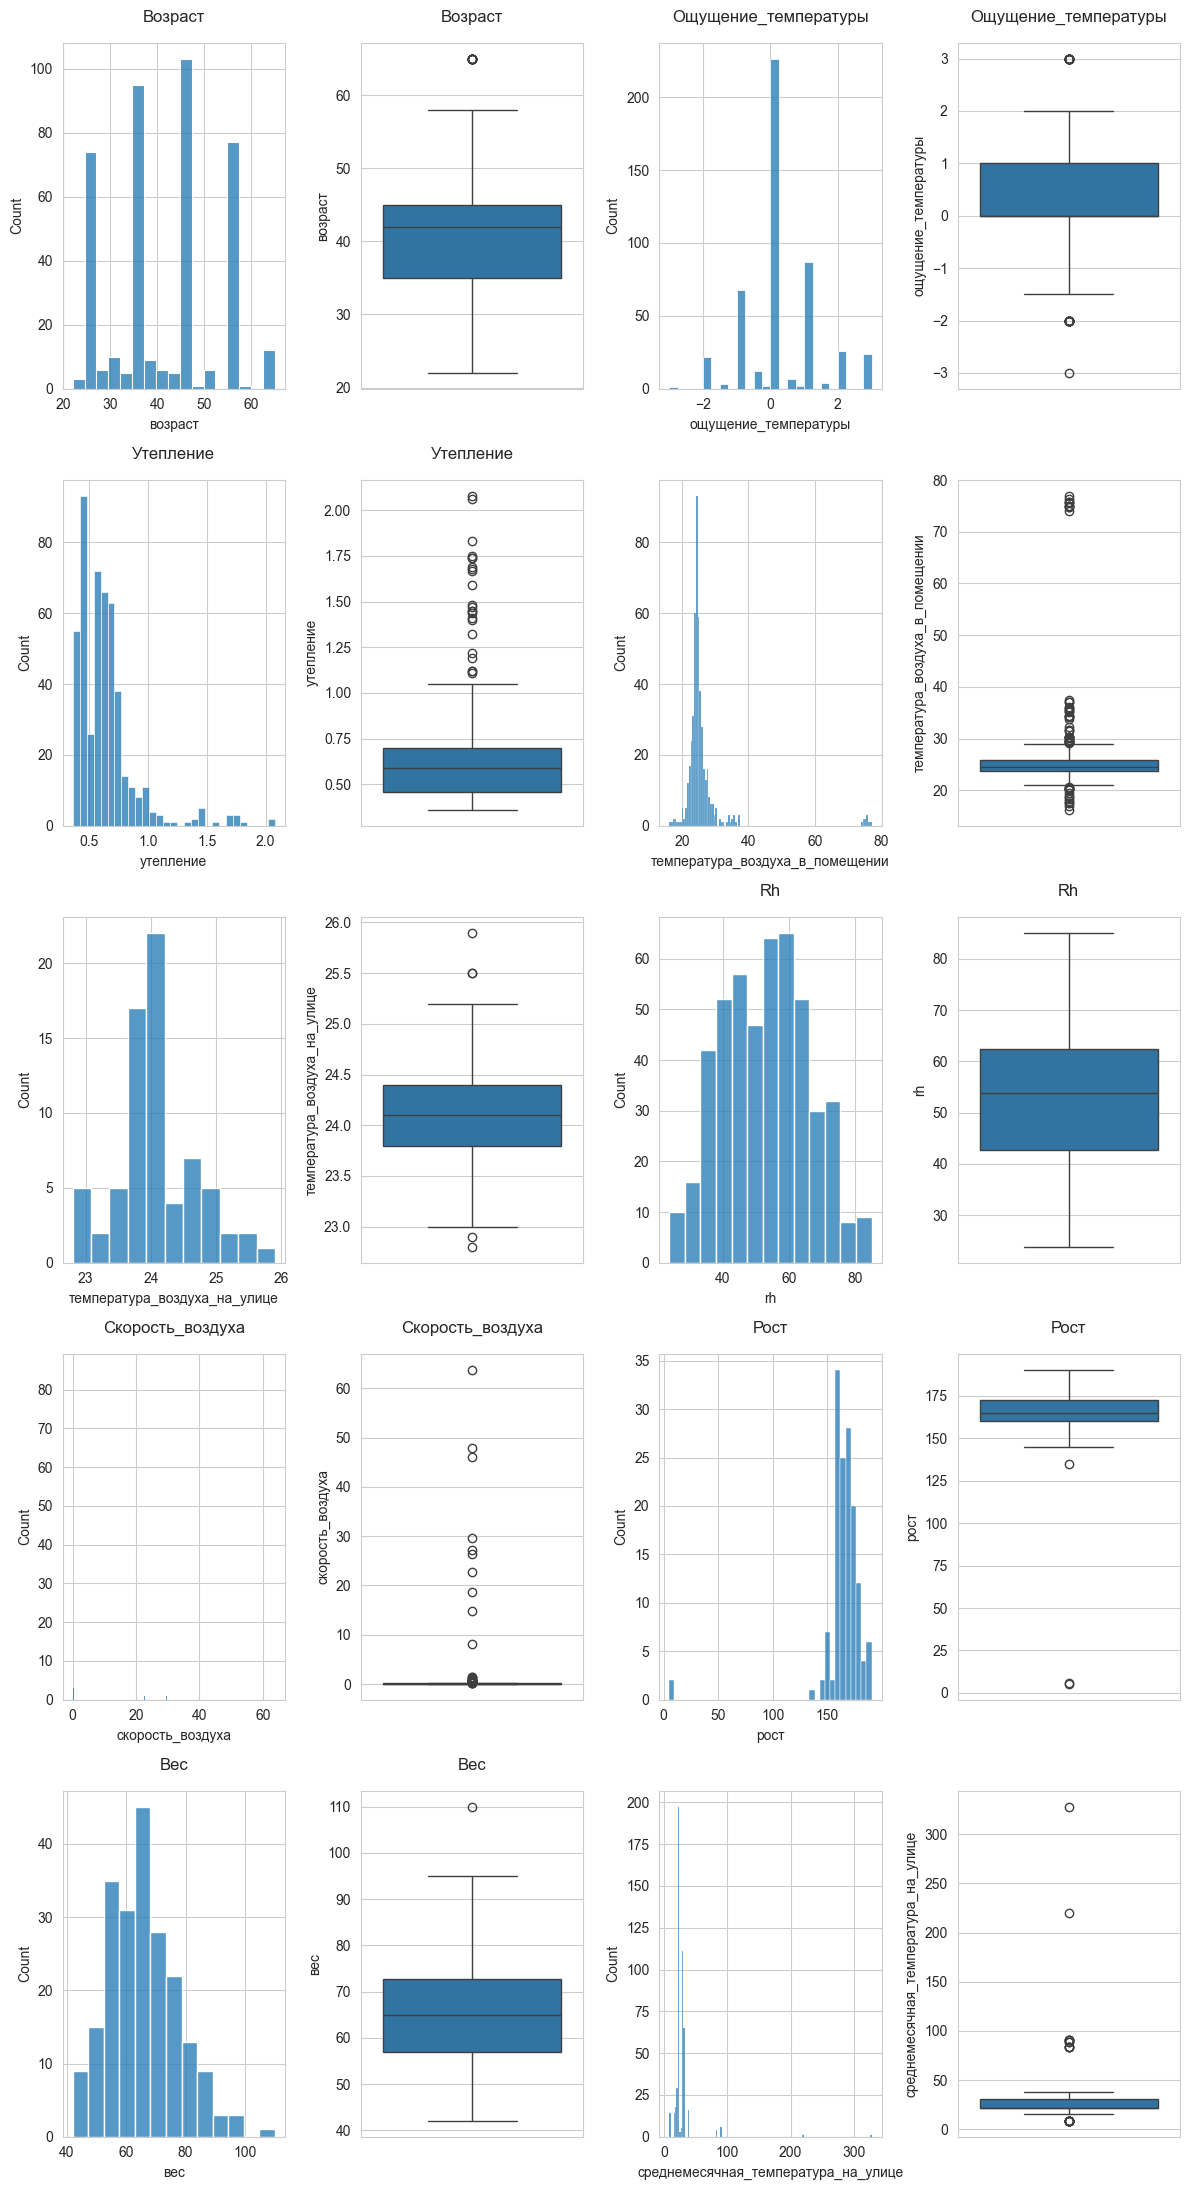

In [14]:
show_all_numeric_4(numeric_columns, df)

Количество рекламаций не влезло, поэтому доп. графики

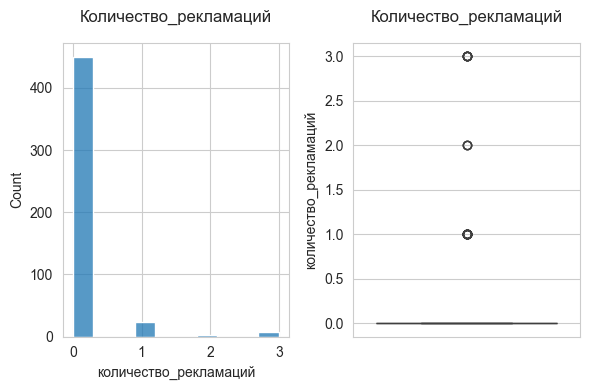

In [15]:
describe_numeric_column(df[numeric_columns[-1]])

Много повторяющихся значений в возрасте - осматриваем столбец

In [16]:
df["возраст"].value_counts().reset_index().head(5)

возраст  count
0     45.0     99
1     35.0     91
2     55.0     77
3     25.0     67
4     65.0     12

**Выводы по графическому анализу численных столбцов**

- возраст:

	- есть много повторов (причина: возрастная аккумуляция*) - ок
	- старшим по 65 - ок

    - ["Возраст как переменная в социологическом исследовании" А. Ю. Мягков стр 3 пункт 5](https://cyberleninka.ru/article/n/vozrast-kak-peremennaya-v-sotsiologicheskom-issledovanii-metodologicheskie-i-metodicheskie-problemy-izmereniya/viewer)

- ощущения_температуры:
	- значения от -3 до 3 соответствуют условиям - ок
	- округлим до целых, чтобы проще анализировать
- утепление:
	- столбец без пояснений - пока не судим
	- принимает значения от 0.5 до 2
- температура_воздуха_в_помещении:
	- 70 - 80 градусов - видимо, выброс в большую сторону
	- меньше 20 - требует доп. проверки
- температура_воздуха_на_улице:
	- 22 - 26 градусов - ок
- rh:
	- значения от 0 до 100 - для процентов ок
	- нужно доп. исследование - низкие или высокие значения принимаем за особенность данных
	- выбросов нет
- скорость_воздуха:
	- гистограмма выглядит странно и все значения около 0
    - необходимо доп. исследование столбца
- рост:
	- подходящая единица измерения см
	- есть выбросы в меньшую сторону (< 50 см)
	- значение около 125 можно отнести к особенности респондента
- вес:
	- подходящая единица измерения килограммы
	- значение около 110 - ок (в реальности возможно)
- среднемесячная температура:
	- единица измерения: градусы Цельсия
	- выбросы в большую сторону - возможно, Фаренгейты
- рекламации:
	- целые числа от 0 до 3 - ок
	- на ящике с усами есть выбросы, это из-за количества 0 - такие оценки являются особенностью данных

#### Функции для номинальных шкал

In [17]:
def describe_nom_col(col, dataframe, title=None):
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    if title is not None:
        fig.suptitle(title)


    test_col = dataframe[col].fillna("Nan")
    test_col = test_col.astype(str)

    data = test_col.value_counts().reset_index()
    f_data = data.sort_values(by="count", ascending=False)
    vals = f_data[col].to_list()

    turbo_cm = plt.get_cmap('Blues')
    colors = [turbo_cm(v) for v in np.linspace(0.4, 0.85, len(vals))]

    axs[0].pie(test_col.value_counts(), autopct="%1.1f%%", colors=colors, labels=vals)
    axs[0].set_title(col.capitalize())

    test_col = test_col.apply(lambda x: f"{x[:15]}")

    f_data.set_index(col)["count"].plot.barh(grid=True, color=colors, ax=axs[1])
    axs[1].set_title(col.capitalize())

    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

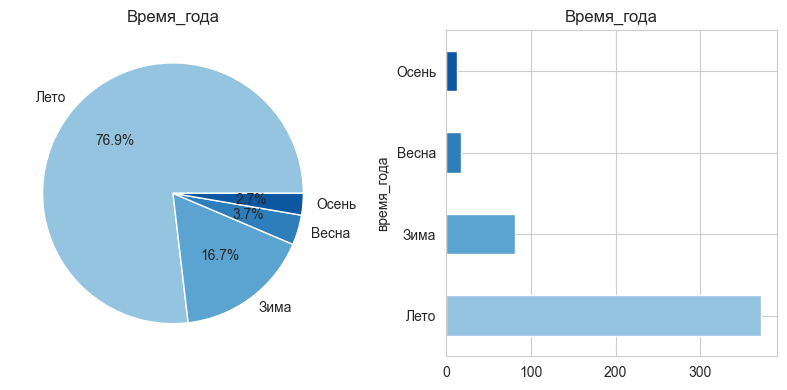

In [18]:
describe_nom_col(nominal_columns[0], df)

In [19]:
def describe_nominal_cols(cols, dataframe):
    plt.clf()

    fig, axs = plt.subplots(len(cols), 2, figsize=(16, 5 * len(cols)))
    row_index = 0

    for col in cols:
        test_col = dataframe[col].fillna("Nan")
        test_col = test_col.astype(str)

        data = test_col.value_counts().reset_index()
        f_data = data.sort_values(by="count", ascending=False)

        vals = f_data[col].to_list()
        turbo_cm = plt.get_cmap('Blues')
        colors = [turbo_cm(v) for v in np.linspace(0.4, 0.85, len(vals))]

        axs[row_index, 0].pie(test_col.value_counts(), autopct="%1.1f%%", colors=colors, labels=vals)
        axs[row_index, 0].set_title(col.capitalize())

        test_col = test_col.apply(lambda x: f"{x[:15]}")
        f_data.set_index(col)["count"].plot.barh(grid=True, color=colors, ax=axs[row_index, 1])
        # axs[row_index, 1].hist(test_col, orientation="vertical", color=colors[-1])
        axs[row_index, 1].set_title(col.capitalize())

        row_index += 1

    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

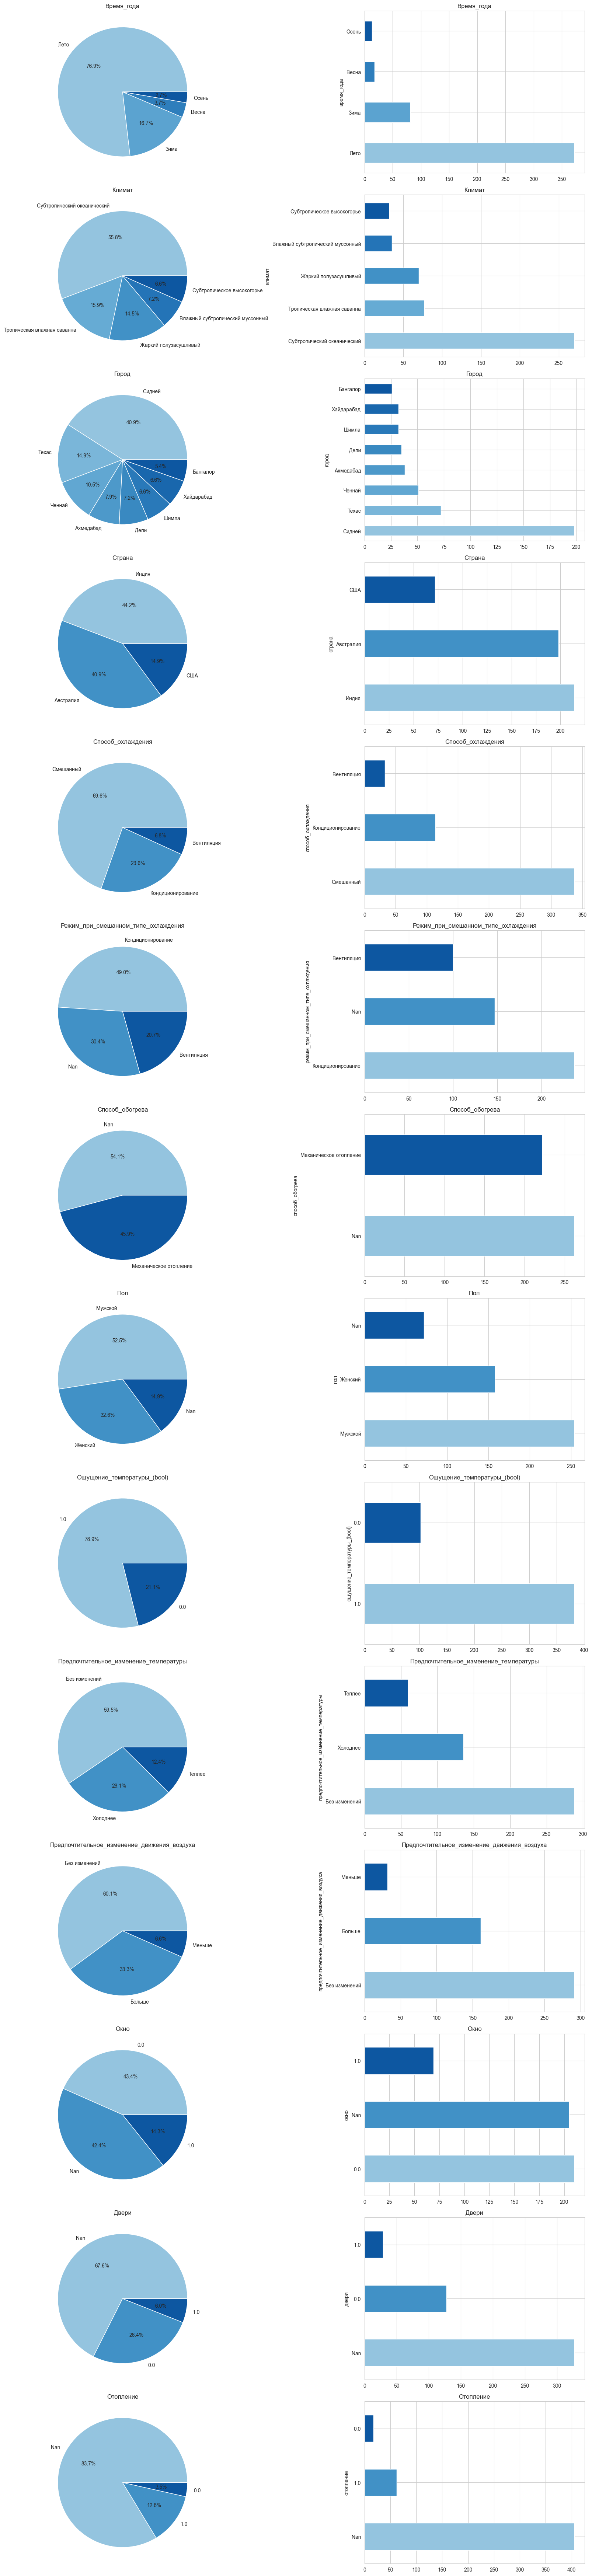

In [20]:
describe_nominal_cols(nominal_columns, df)

**Выводы по графикам для номинальных шкал**

- время года: пропусков нет, преобладает лето - ок
- климат: пропусков нет, преобладает субтропический океанический - ок
- город: пропусков нет, больше всего данных по Сиднею - ок (но Техас - штат)
- страна: пропусков нет, преобладает Индия - ок
- способ охлаждения: пропусков нет, самый популярный смешанный - смешанный
- режим при смешанном типе охлаждения: пропуски есть, самый популярный кондиционирование
- способ_обогрева: пропуски есть, преобладает nan (отопление отсутствует) -ок
- пол: пропуски есть, преобладает мужской - oк
- ощущение_температуры_bool: пропусков нет, (1 или 0) - ок
- предпочтительное_изменение_температуры: пропусков нет, преобладает "без изменений" - ок
- предпочтительное_изменение_движения_воздуха: пропусков нет, преобладает "без изменений" - ок (кстати, на 2ом "больше")
- окно: пропуски есть, преобладают 0 (закрыты) - ок
- двери: пропуски есть, преобладают nan - тут уж точно не заполнить
- отопление: пропуски есть, преобладают nan - нет данных (предположение: связано с сезоном или с типом_охлаждения)



**Идея:** разобраться в разнице кондиционирования и кондиционирования при смешанном_типе - может удастся продать этим сегментам потребителей 1 тип более успешной установки




#### Проверка узких мест

Год - порядковая шкала (значений < 5 => смотрим графики, как для номинальной)

<Figure size 640x480 with 0 Axes>

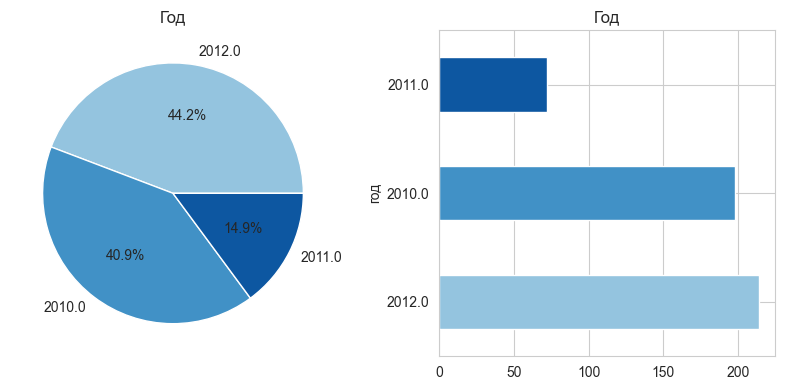

In [21]:
describe_nom_col("год", df)

Год - пропусков нет, больше всего данных за 2012 - ок (нужно привести к целому типу).


Теперь *оценка_комфорта*. Ей будет посвящен отдельный текстовый блок, пока подстрахуемся и визуализируем 2 способами.

-> графики, как для численной шкалы подойдут, если рассматривать столбец, как порядковый (> 5 уровней)

-> если принять за номинальный, то визуализации, как для номинального

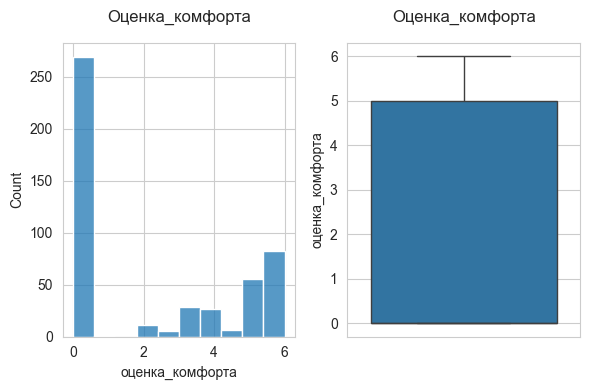

In [22]:
rate_col_fixed = df["оценка_комфорта"].fillna(0)
describe_numeric_column(rate_col_fixed)

Видно, что:
1. Много пропусков
2. Есть нецелые значения - для упрощения округлим (может, была ошибка в форме)

<Figure size 640x480 with 0 Axes>

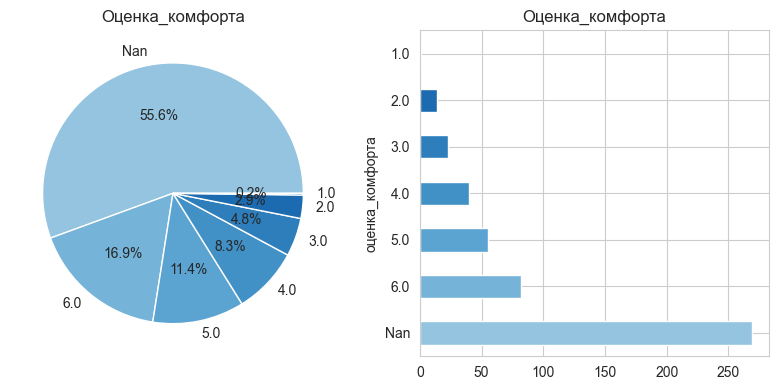

In [23]:
df.loc[df["оценка_комфорта"].notna(), "оценка_комфорта"] = np.round(df.loc[df["оценка_комфорта"].notna(), "оценка_комфорта"], 0)
df.loc[df["оценка_комфорта"].notna(), "оценка_комфорта"] = df.loc[df["оценка_комфорта"].notna(), "оценка_комфорта"].apply(int)
describe_nom_col("оценка_комфорта", df)

Оценка комфорта:

Много пропусков (> 50%!), оценки идут по убыванию (если смотреть по частоте: 6, 5, 4, 3, 2, 1).


### Функции для очитски и подготовки датасета

* Приведение к PEP8

In [24]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

* Смещение категориальных `NaN` к [-1, 0, 1] & приведение к целичисленному

In [25]:
# К нужному типу данных (+ nan для категорий -1 0 1)
def dtype_to_int(cols: list):
    for col in cols:
        df[col] = df[col].replace("Nan", np.nan)
        df[col] = df[col].astype(int)


def fill_nan_category(cols: list):
    for col in cols:  # repl (0, -1) (nan, 0) to int
        df[col] = df[col].replace(0., -1.)
        df[col] = df[col].fillna(0.)

* 1) Замена `NaN` медианой, затем земена выбросов медианой
* 2) Медиана доступна по подгруппам
* 3) Доступны фиксированные значения лимитов

In [26]:
def fill_nan_group_median(column: str, group_col: list, custom_high_limit=None, custom_low_limit=None):
    if len(group_col) > 0:
        df[column] = (df.groupby(group_col, sort=False, dropna=False)[column].transform(
            lambda elem: elem.fillna(elem.median() if elem.median() == np.nan else df[column].median())))
    else:
        df[column] = df[column].fillna(df[column].median())


def fill_3iqr_outliers(column: str):
    Q1, Q3 = np.nanpercentile(df[column], [25, 75])
    IQR  = Q3 - Q1
    High = Q3 + 3 * IQR
    Low  = Q1 - 3 * IQR
    df[column] = df[column].where(df[column].between(Low, High), np.nan)


def fill_outliers_hard(column: str, high=None, low=None):
    df[column] = df[column].where(
        df[column].between(
            low if low else -np.inf,
            high if high else np.inf),
        np.nan)

In [27]:
def from_far_to_cel(F, after_zero=1):
    cels = (F - 32) * 5 / 9
    return np.round(cels, after_zero)

### Проверяем столбец относительная влажность

rh - относительная влажность

In [28]:
rh_col = df["rh"].sort_values()
rh_col.head(3)

275    23.8
392    23.9
302    26.3
Name: rh, dtype: float64

In [29]:
rh_col.describe()

count    484.000000
mean      52.973760
std       13.036204
min       23.800000
25%       42.775000
50%       53.750000
75%       62.325000
max       85.100000
Name: rh, dtype: float64

Действующий ГОСТ 30494-2011 определяет параметры микроклимата для жилых, образовательных, административных и бытовых помещений, введенный вместо ГОСТ 30494-96.


Так, норма влажности воздуха на рабочих местах начинается с нижнего оптимального порогового значения в **30-45% и заканчивается допустимым — не выше 60%**.

В датасете есть значения rh около 80%. Такая относительная влажность возможна зимой (если брать улицу, но допустим, что у людей открыты окна). Проверим времена года в верхней четверти.

In [30]:
df.loc[df["rh"] > 60.0, "время_года"].unique()

array(['Лето', 'Зима', 'Осень'], dtype=object)

In [31]:
df.loc[df["rh"] > 60.0, ["страна", "год", "время_года"]].value_counts()

страна     год     время_года
Австралия  2010.0  Лето          101
Индия      2012.0  Лето           38
                   Зима            7
                   Осень           3
Name: count, dtype: int64

Предположение по поводу сезона не подтвердилось

<Axes: xlabel='rh', ylabel='Count'>

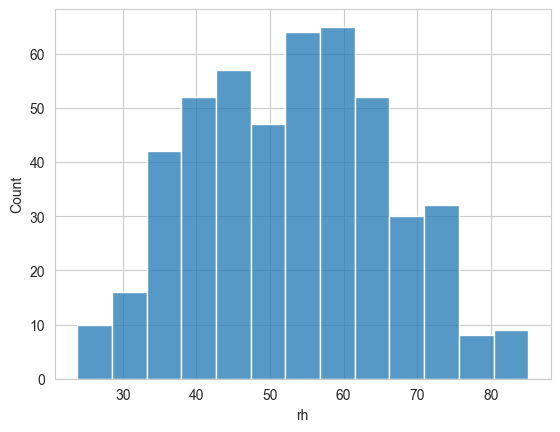

In [32]:
sns.histplot(np.round(df["rh"], 1))

Промежуточный вывод:

rh оставляем, дальше есть задание, где нужно присвоить категорию по этому значению. Тем более такие показатели возможны в жизни, их нельзя отбросить, потому что составляют больше четверти столбца.

### Проверяем столбец скорость_воздуха

In [33]:
df["скорость_воздуха"].head(5)

0     0.26
1     0.12
2     0.08
3    27.16
4    63.83
Name: скорость_воздуха, dtype: float64

<Axes: xlabel='скорость_воздуха', ylabel='Count'>

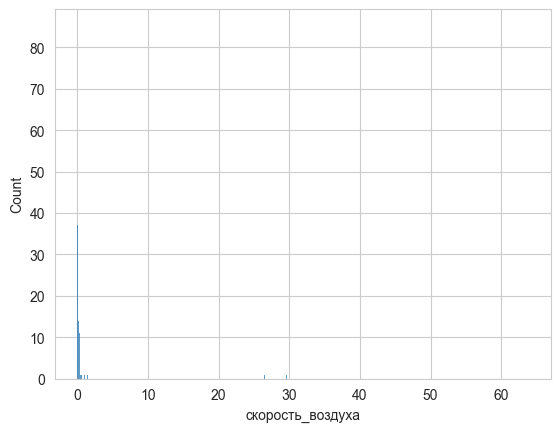

In [34]:
sns.histplot(df["скорость_воздуха"])

In [35]:
df["скорость_воздуха"].describe()

count    484.000000
mean       0.760558
std        4.921106
min        0.000000
25%        0.060000
50%        0.100000
75%        0.140000
max       63.830000
Name: скорость_воздуха, dtype: float64

Порядок величины: меньше 1 м/c, что характерно для скорости воздуха внутри помещения

63 м/c - вау, то есть 226.8 км/ч внутри помещения. Похоже у кого-то ураган... (или выброс)

<Axes: xlabel='скорость_воздуха', ylabel='Count'>

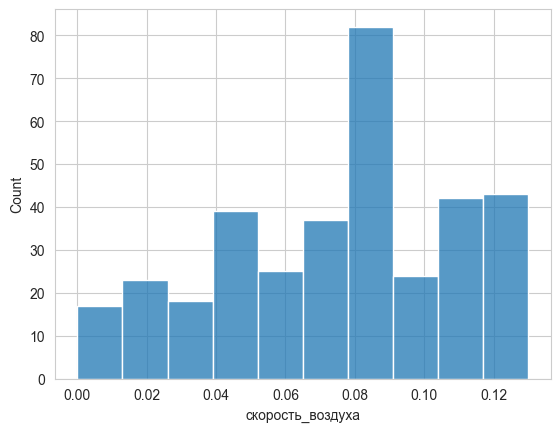

In [36]:
sns.histplot(df.loc[df["скорость_воздуха"] < np.percentile(df["скорость_воздуха"], 75), "скорость_воздуха"])

<Axes: ylabel='скорость_воздуха'>

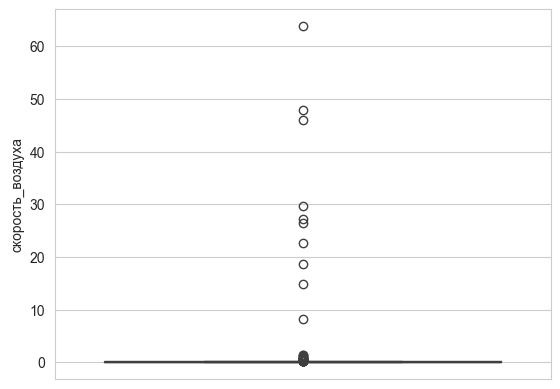

In [37]:
sns.boxplot(df["скорость_воздуха"])

Справка:

*   0,1 - 0,3 м/с - нормальная скорость воздуха в офисе
*   < 0,5 м/с - нормально для цеха



In [38]:
mask = df["скорость_воздуха"] > 0.5
df.loc[mask, "скорость_воздуха"].sort_values()

299     0.53
358     0.54
412     0.56
399     0.56
457     0.57
420     0.60
367     0.65
328     0.77
382     0.82
476     1.00
296     1.23
291     1.42
425     1.43
70      8.20
65     14.85
10     18.65
59     22.68
53     26.49
3      27.16
31     29.61
26     46.00
28     47.97
4      63.83
Name: скорость_воздуха, dtype: float64

Так, значения до 8 м выглядят приемлимо, а те что больше - совсем нет. Проверим открыты ли окна или двери

In [39]:
res_df = df.loc[mask, ["год", "время_года", "город",  "окно", "двери", "скорость_воздуха"]].sort_values(by="скорость_воздуха")
res_df.tail(5)

год время_года  город  окно  двери  скорость_воздуха
3   2011.0       Лето  Техас   NaN    NaN             27.16
31  2011.0       Лето  Техас   NaN    NaN             29.61
26  2011.0       Лето  Техас   NaN    NaN             46.00
28  2011.0       Лето  Техас   NaN    NaN             47.97
4   2011.0       Лето  Техас   NaN    NaN             63.83

Перевод в км/ч

In [40]:
res_df["скорость_воздуха"] *= 3.6
res_df.tail(5)

год время_года  город  окно  двери  скорость_воздуха
3   2011.0       Лето  Техас   NaN    NaN            97.776
31  2011.0       Лето  Техас   NaN    NaN           106.596
26  2011.0       Лето  Техас   NaN    NaN           165.600
28  2011.0       Лето  Техас   NaN    NaN           172.692
4   2011.0       Лето  Техас   NaN    NaN           229.788

Фактчек: [погода в Техасе в 2011](https://www.weather.gov/ama/2011_weather_review)


**June**

The only four tornadoes that were reported in the Panhandles this year occurred on June 11 and mainly affected the eastern half of the Oklahoma Panhandle and the northeastern Texas Panhandle.  Three EF-0 tornadoes occurred near Follett and Darrouzett, TX and Boyd, OK.  **An EF-1 tornado occurred near Tyron**, OK.  In addition to the tornadoes, **large hail and damaging winds** were also reported.  Another severe weather event occurred on June 28 and resulted in several reports of wind damage across Beaver County.  In addition to the severe weather, wildfires also continued to be a problem.

**July**

**The most impressive statistic is that July ended up being the warmest of any month ever on record (since 1892) at Amarillo!**  The good news is that the winds finally began to subside, which allowed the threat for wildfires to diminish greatly.  Hit and miss showers and thunderstorms provided some relief from the heat, but almost all areas still saw well below normal precipitation.  Any thunderstorms that formed were often accompanied by very strong wind gusts.  On July 22, a collapsing thunderstorm produced an **81-mph wind** gust at Amarillo.
* 81-mph - 130 км/ч

**August**

Largely due to a tap of monsoonal moisture across New Mexico, prospects for showers and thunderstorms increased across the area.  On August 9, severe thunderstorms impacted much of the central Texas Panhandle and the eastern Oklahoma Panhandle.  120-mph straight line winds caused damage to hog farms near Beaver, OK while 90-mph winds caused damage near Pampa, TX.

* 120-mph - 193 км/ч

Вывод:

-> значение 229 км/ч - по данным выброс, но может быть объясним сбоем датчиков

-> значения в Техасе за 2011 аномальны, что по историческим данным объяснимо

-> если будем строить что-то связанное с ветром, то будем использовать данные, где ветер до 8 м/с

### Проверяем окна и двери

In [41]:
fixed_df = df
fixed_df["окно"] = fixed_df["окно"].fillna("NaN")
fixed_df["двери"] = fixed_df["двери"].fillna("NaN")
grouped_dw = df[["окно", "двери"]].value_counts().reset_index()
grouped_dw

окно двери  count
0  NaN   NaN    201
1  0.0   0.0    121
2  0.0   NaN     72
3  1.0   NaN     54
4  0.0   1.0     17
5  1.0   1.0     10
6  1.0   0.0      5
7  NaN   0.0      2
8  NaN   1.0      2

В окнах и дверях много пропусков, которые не получится восстановить просто так, с головы. Будем это учитывать в дальнейшем

Оценка клиента

<Axes: title={'center': 'Количество оценок'}, xlabel='оценка_комфорта', ylabel='Count'>

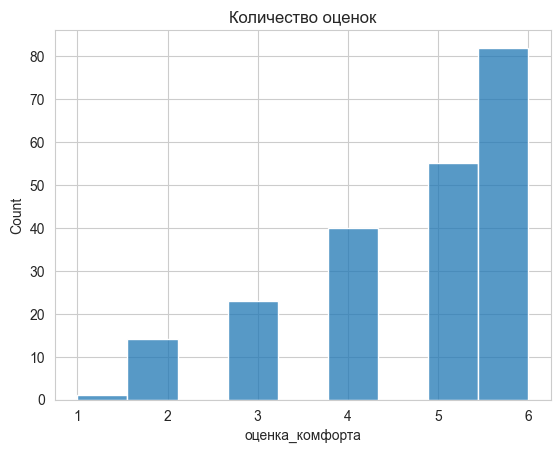

In [42]:
plt.title("Количество оценок")
sns.histplot(df["оценка_комфорта"])

В 2ух блоках ниже: проверка, где есть пропуски (группировка - страна + город + год)

In [43]:
mask = df["оценка_комфорта"].isin([float(i) for i in range(1, 7)])
gr_df = df.loc[mask, ["страна", "год", "город"]]
gr_df.value_counts()

страна  год     город    
США     2011.0  Техас        72
Индия   2012.0  Ахмедабад    38
                Дели         35
                Шимла        32
                Бангалор     26
                Ченнай       12
Name: count, dtype: int64

In [44]:
df[["страна", "год", "город"]].value_counts()

страна     год     город     
Австралия  2010.0  Сидней        198
США        2011.0  Техас          72
Индия      2012.0  Ченнай         51
                   Ахмедабад      38
                   Дели           35
                   Хайдарабад     32
                   Шимла          32
                   Бангалор       26
Name: count, dtype: int64

Нецелые оценки:


*   2011: Техас
*   2012: Ахмедабад, Дели, Шимла, Бангалор и частично Ченнай


Округлим дробную оценку, а отсутствие оценки обозначим временно, как 0!

<Axes: xlabel='оценка_комфорта', ylabel='Count'>

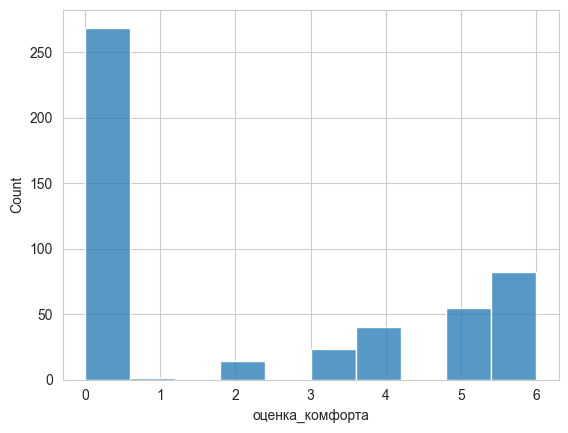

In [45]:
df["оценка_комфорта"] = np.round(df["оценка_комфорта"], 0)
df["оценка_комфорта"] = df["оценка_комфорта"].fillna(0.0)
df["оценка_комфорта"] = df["оценка_комфорта"].astype(int)
sns.histplot(df["оценка_комфорта"])

### Проверка столбца утепления

In [46]:
df["утепление"].value_counts().reset_index().head()

утепление  count
0       0.46     64
1       0.57     37
2       0.61     33
3       0.68     26
4       0.41     18

Утепление (как-то связано с одеждой, предварительно округлим до 1 знака). Варианты:
1. год + страна + климат + пол (группы выходят мелкими)
2. год + город
3. год + климат

In [47]:
# np.round(df["утепление"], 1).value_counts()
t_df = df[["утепление", "климат", "страна", "год", "пол"]].value_counts().reset_index()
t_df.describe()

утепление          год       count
count  166.000000   166.000000  166.000000
mean     0.786325  2011.493976    2.481928
std      0.348215     0.872106    5.178888
min      0.360000  2010.000000    1.000000
25%      0.570000  2010.500000    1.000000
50%      0.690000  2012.000000    1.000000
75%      0.867500  2012.000000    2.000000
max      2.080000  2012.000000   61.000000

In [48]:
# np.round(df["утепление"], 1).value_counts()
t_df = df
t_df["утепление"] = np.round(t_df["утепление"], 1)
t_df = df[["город", "год", "утепление"]].value_counts().reset_index()
t_df.describe()

год  утепление      count
count    57.000000  57.000000  57.000000
mean   2011.719298   0.885965   8.491228
std       0.647919   0.371021  16.816364
min    2010.000000   0.400000   1.000000
25%    2012.000000   0.600000   1.000000
50%    2012.000000   0.800000   3.000000
75%    2012.000000   1.000000   7.000000
max    2012.000000   2.100000  83.000000

In [49]:
df[["климат", "год", "утепление"]].value_counts().reset_index().head(5)

климат     год  утепление  count
0  Cубтропический океанический  2010.0        0.4     83
1  Cубтропический океанический  2010.0        0.5     82
2  Cубтропический океанический  2011.0        0.6     59
3        Жаркий полузасушливый  2012.0        0.7     37
4  Тропическая влажная саванна  2012.0        0.7     34

Пока остановимся на мысли, что утепление в одежде легче предсказать по городу и году

### Проверка пропусков в способах_охлаждения + корректности эксплуатации

Способ охлаждения:

	- Кондиционирование = может быть разных типов, окна закрыты.


In [50]:
df.loc[df["способ_охлаждения"] == "Кондиционирование", "окно"].unique()

array(['NaN', 0.0], dtype=object)

Так как окна обязательно закрыты, заменяем пропуски на 0

In [51]:
# 1
df.loc[df["способ_охлаждения"] == "Кондиционирование", "окно"] = 0

Способ охлаждения:

	- NA = не применимо, например исследование холодной зимой, когда включено отопление.


Nan здесь нет

In [52]:
df.loc[df["способ_охлаждения"].isna(), "время_года"]

Series([], Name: время_года, dtype: object)

Способ охлаждения:

	- Кондиционирование = может быть разных типов, окна закрыты.

In [53]:
mask = (df["способ_охлаждения"] == "Смешанный") & (df["режим_при_смешанном_типе_охлаждения"] == "Кондиционирование")
df.loc[mask, "окно"].unique()

array(['NaN', 1.0, 0.0], dtype=object)

Кто-то открыл окна! Ай-яй-яй. Не радует, но тоже определенный сценарий использования оборудования

In [54]:
df.loc[mask & (df["окно"] == 1)].head(5)

год время_года                       климат   город     страна  \
74  2010.0       Лето  Cубтропический океанический  Сидней  Австралия   
76  2010.0       Лето  Cубтропический океанический  Сидней  Австралия   
81  2010.0       Лето  Cубтропический океанический  Сидней  Австралия   
85  2010.0       Лето  Cубтропический океанический  Сидней  Австралия   
92  2010.0       Лето  Cубтропический океанический  Сидней  Австралия   

   способ_охлаждения режим_при_смешанном_типе_охлаждения  \
74         Смешанный                   Кондиционирование   
76         Смешанный                   Кондиционирование   
81         Смешанный                   Кондиционирование   
85         Смешанный                   Кондиционирование   
92         Смешанный                   Кондиционирование   

           способ_обогрева  возраст      пол  ...  скорость_воздуха  рост вес  \
74  Механическое отопление     55.0  Мужской  ...              0.14   NaN NaN   
76  Механическое отопление     35.0  Мужской  ...              0.12   NaN NaN   
81  Механическое отопление     55.0  Женский  ...              0.08   NaN NaN   
85  Механическое отопление     45.0  Мужской  ...              0.08   NaN NaN   
92  Механическое отопление     55.0  Женский  ...              0.12   NaN NaN   

    занавески вентилятор  окно  двери  отопление  \
74        NaN        NaN   1.0    NaN        NaN   
76        NaN        NaN   1.0    1.0        NaN   
81        NaN        NaN   1.0    NaN        NaN   
85        NaN        NaN   1.0    NaN        NaN   
92        NaN        NaN   1.0    NaN        NaN   

    среднемесячная_температура_на_улице  количество_рекламаций  
74                                 22.0                      0  
76                                 22.0                      0  
81                                220.0                      0  
85                                 22.0                      0  
92                                 22.0                      0  

[5 rows x 30 columns]

13% товарищей не по назначению использовали оборудование

In [55]:
ans = len(df.loc[mask & (df["окно"] == 1)]) / len(df[mask])
np.round(ans, 2)

np.float64(0.13)

Проверим их отзывы

In [56]:
df["оценка_комфорта"] = df["оценка_комфорта"].fillna(0)
df["оценка_комфорта"] = np.round(df["оценка_комфорта"], 0).astype(np.int64)
df.loc[mask & (df["окно"] == 1), "оценка_комфорта"].describe()

count    30.000000
mean      0.433333
std       1.250747
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       5.000000
Name: оценка_комфорта, dtype: float64

<Axes: xlabel='оценка_комфорта', ylabel='Count'>

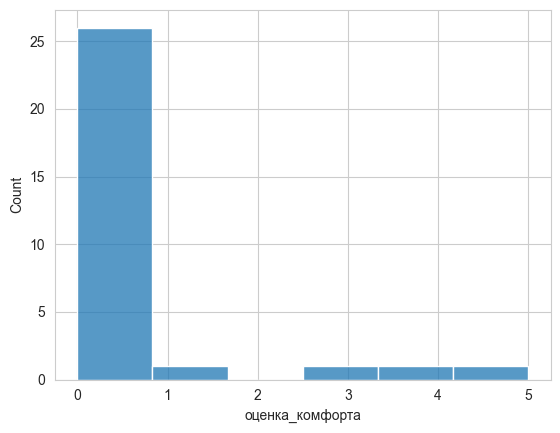

In [57]:
sns.histplot(df.loc[mask & (df["окно"] == 1), "оценка_комфорта"])

Получается они проставили мало оценок, да и учитывая ситуацию неясно принимать во внимание их мнение или нет

In [58]:
#2
df.loc[mask, "окно"] = df.loc[mask, "окно"].fillna(0)

In [59]:
df.loc[(df["способ_охлаждения"] == "Смешанный") & (df["режим_при_смешанном_типе_охлаждения"] == "Вентиляция"), "окно"].value_counts()

окно
0.0    46
1.0    29
NaN    25
Name: count, dtype: int64

### Проверка среднемесячной температуры

In [60]:
df["среднемесячная_температура_на_улице"].describe()

count    484.000000
mean      27.389669
std       19.469562
min        8.500000
25%       22.000000
50%       22.000000
75%       30.800000
max      328.000000
Name: среднемесячная_температура_на_улице, dtype: float64

Фактчек. Среднемесячная температура

1. Техас около 30 летом - норма, но это штат, а не конкретное место, поэтому значения могут отличатся. Тем не менее 38 градусов многовато. [график на сайте](https://pogoda.365c.ru/usa/texas-city/m/june)

2. Индия - большая страна, поэтому наблюдения от 3 до 47 - норма. Стоит учитывать сезон [ссылка](https://pogoda.365c.ru/india)

3. И последнее

* Австралия 9 - 37 градусов [ссылка](https://pogoda.365c.ru/australia);

* Сидней: около 19 [ссылка](https://pogoda.365c.ru/australia/sydney/m/june)

Вывод: значения больше 31 в Техасе меняем на 31, то, что больше 40 переводим в Цельсия.

In [61]:
df["среднемесячная_температура_на_улице"].sort_values(ascending=False).head(20)

11     328.0
81     220.0
30      91.0
20      91.0
68      91.0
28      91.0
34      89.0
39      89.0
44      84.0
67      84.0
14      84.0
1       84.0
381     38.1
376     38.1
370     38.1
316     38.1
428     38.1
369     38.1
478     38.1
367     38.1
Name: среднемесячная_температура_на_улице, dtype: float64

### Дубли

In [62]:
df[df.duplicated()]

год время_года                 климат       город страна  \
482  2012.0       Зима  Жаркий полузасушливый  Хайдарабад  Индия   
483  2012.0       Зима  Жаркий полузасушливый  Хайдарабад  Индия   

    способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
482         Смешанный                   Кондиционирование             NaN   
483         Смешанный                   Кондиционирование             NaN   

     возраст      пол  ...  скорость_воздуха  рост   вес  занавески  \
482      NaN  Женский  ...              0.02   NaN  76.0        NaN   
483      NaN  Женский  ...              0.02   NaN  76.0        NaN   

    вентилятор  окно  двери  отопление  среднемесячная_температура_на_улице  \
482        NaN   0.0    0.0        NaN                                 21.6   
483        NaN   0.0    0.0        NaN                                 21.6   

     количество_рекламаций  
482                      0  
483                      0  

[2 rows x 30 columns]

2 одинаковые строки - возможно случайно отправили форму 2 раза

при удалении теряем 0.0021 часть данных, что некритично


!!! Неявные дубли: уже поменяли опечатки (custom_correct), так что все в порядке

### Быстрый анализ

In [63]:
# df.where(df["среднемесячная_температура_на_улице"] > 45).dropna(axis=0, how='all')
df.where(df["страна"] == "Индия").dropna(axis=0, how='all')["утепление"].describe()

count    214.000000
mean       0.800000
std        0.290054
min        0.500000
25%        0.625000
50%        0.700000
75%        0.800000
max        2.100000
Name: утепление, dtype: float64

In [64]:
df.groupby(["страна"])["утепление"].describe()

count      mean       std  min    25%  50%  75%  max
страна                                                         
Австралия  198.0  0.481313  0.089580  0.4  0.400  0.5  0.5  0.9
Индия      214.0  0.800000  0.290054  0.5  0.625  0.7  0.8  2.1
США         72.0  0.593056  0.051256  0.5  0.600  0.6  0.6  0.8

In [65]:
for val in df.groupby(["страна", "время_года"])["утепление"]:
    print(val[0], sorted(val[1]), val[1].describe())

('Австралия', 'Лето') [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.

In [66]:
df.groupby(["страна", "пол"]).count()

год  время_года  климат  город  способ_охлаждения  \
страна    пол                                                          
Австралия Женский   89          89      89     89                 89   
          Мужской  109         109     109    109                109   
Индия     Женский   69          69      69     69                 69   
          Мужской  145         145     145    145                145   

                   режим_при_смешанном_типе_охлаждения  способ_обогрева  \
страна    пол                                                             
Австралия Женский                                   89               89   
          Мужской                                  109              109   
Индия     Женский                                   44                8   
          Мужской                                   95               16   

                   возраст  ощущение_температуры  ощущение_температуры_(bool)  \
страна    пол                                                                   
Австралия Женский       89                    89                           89   
          Мужской      109                   109                          109   
Индия     Женский       44                    69                           69   
          Мужской       99                   145                          145   

                   ...  скорость_воздуха  рост  вес  занавески  вентилятор  \
страна    пол      ...                                                       
Австралия Женский  ...                89     0    0          0           0   
          Мужской  ...               109     0    0          0           0   
Индия     Женский  ...                69    44   69          0          28   
          Мужской  ...               145    99  145          0          46   

                   окно  двери  отопление  \
страна    пол                               
Австралия Женский    89     89          0   
          Мужской   109    109          0   
Индия     Женский    69     69         26   
          Мужской   145    145         53   

                   среднемесячная_температура_на_улице  количество_рекламаций  
страна    пол                                                                  
Австралия Женский                                   89                     89  
          Мужской                                  109                    109  
Индия     Женский                                   69                     69  
          Мужской                                  145                    145  

[4 rows x 28 columns]

### Преобразования датасета (точка входа)

Так как для построения графиков были выполнены неявные преобразования - еще раз подгрузим датасет

In [67]:
df = pd.read_csv("data_1.csv", delimiter=";")

pep8 + исправление опечаток

In [68]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
custom_correct()

Категориальные данные

In [69]:
fill_nan_category(["занавески", "вентилятор", "окно", "двери", "отопление",
                   "ощущение_температуры_(bool)", "ощущение_движения_воздуха_(bool)"])

Округление

In [70]:
df["оценка_комфорта"] = df["оценка_комфорта"].round()
df["утепление"] = df["утепление"].round(2)
df["ощущение_температуры"] = df["ощущение_температуры"].round()

Приведение к целому

In [71]:
dtype_to_int(["год", "занавески", "вентилятор", "окно", "двери", "отопление",
              "ощущение_температуры_(bool)", "ощущение_движения_воздуха_(bool)"])

Удаляем дубли

In [72]:
df.drop_duplicates(inplace=True)

Заполнение по спец. условиям

In [73]:
fill_outliers_hard("скорость_воздуха", high=3)
fill_outliers_hard("температура_воздуха_в_помещении", low=10, high=50)
fill_outliers_hard("рост", low=125)

Заполнение групповой медианой:
*   вес - можем взять по полу
*   возраст - пропущено < 20% в столбце, можем взять медиану по полу (из-за социальных причин может отличатся между группами)
*  скорость воздуха - после очистки выбросов можем взять медиану
*  температура воздуха на улице - пропущено больше 80% процентов, думаю можем оставить этот столбец без внимания и не генерировать неподтвержденные данные
*  среднемесячная температура - чиним через температурные шкалы, а потом историческими данными



In [74]:
fill_nan_group_median("вес", ["пол"])
fill_nan_group_median("возраст", ["пол"])
fill_nan_group_median("скорость_воздуха", [])
# fill_nan_group_median("температура_воздуха_на_улице", ["страна", "время_года"])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [75]:
pivot_temp = 40
df.loc[
    df["среднемесячная_температура_на_улице"]
    > pivot_temp,
    "среднемесячная_температура_на_улице"
] = df.loc[
    df["среднемесячная_температура_на_улице"]
    > pivot_temp,
    "среднемесячная_температура_на_улице"
].apply(from_far_to_cel)


In [76]:
df["среднемесячная_температура_на_улице"].sort_values()

392      8.5
371      8.5
375      8.5
395      8.5
319      8.5
       ...  
367     38.1
369     38.1
323     38.1
81     104.4
11     164.4
Name: среднемесячная_температура_на_улице, Length: 482, dtype: float64

In [77]:
df.loc[df["среднемесячная_температура_на_улице"] > 38, "среднемесячная_температура_на_улице"] = 17
df.loc[df["среднемесячная_температура_на_улице"] > 38, "среднемесячная_температура_на_улице"] = 31

In [78]:
df["среднемесячная_температура_на_улице"].describe()

count    482.000000
mean      24.468880
std        5.606436
min        8.500000
25%       22.000000
50%       22.000000
75%       29.900000
max       32.800000
Name: среднемесячная_температура_на_улице, dtype: float64

### Обзор полученного датасета (без графиков)

In [79]:
# Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          482 non-null    int64  
 1   время_года                                   482 non-null    object 
 2   климат                                       482 non-null    object 
 3   город                                        482 non-null    object 
 4   страна                                       482 non-null    object 
 5   способ_охлаждения                            482 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          335 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      482 non-null    float64
 9   пол                                          410 non-null    object 
 10  ощущени

год     возраст  ощущение_температуры  \
count   482.000000  482.000000            482.000000   
mean   2011.029046   40.829876              0.217842   
std       0.922792   10.192946              1.090620   
min    2010.000000   22.000000             -3.000000   
25%    2010.000000   35.000000              0.000000   
50%    2011.000000   42.000000              0.000000   
75%    2012.000000   45.000000              1.000000   
max    2012.000000   65.000000              3.000000   

       ощущение_температуры_(bool)  ощущение_движения_воздуха_(bool)  \
count                   482.000000                        482.000000   
mean                      0.576763                          0.207469   
std                       0.817760                          0.607050   
min                      -1.000000                         -1.000000   
25%                       1.000000                          0.000000   
50%                       1.000000                          0.000000   
75%                       1.000000                          1.000000   
max                       1.000000                          1.000000   

       оценка_комфорта   утепление  температура_воздуха_в_помещении  \
count       215.000000  482.000000                       472.000000   
mean          4.767442    0.634149                        25.024153   
std           1.268549    0.253538                         2.791078   
min           1.000000    0.360000                        16.200000   
25%           4.000000    0.460000                        23.800000   
50%           5.000000    0.590000                        24.600000   
75%           6.000000    0.700000                        25.700000   
max           6.000000    2.080000                        37.400000   

       температура_воздуха_на_улице          rh  скорость_воздуха        рост  \
count                     72.000000  482.000000        482.000000  141.000000   
mean                      24.104167   53.019295          0.131805  166.665957   
std                        0.604546   13.044019          0.152109    9.647404   
min                       22.800000   23.800000          0.000000  134.600000   
25%                       23.800000   42.850000          0.070000  160.000000   
50%                       24.100000   53.850000          0.090000  165.100000   
75%                       24.400000   62.375000          0.140000  172.700000   
max                       25.900000   85.100000          1.430000  190.500000   

              вес   занавески  вентилятор        окно       двери   отопление  \
count  482.000000  482.000000  482.000000  482.000000  482.000000  482.000000   
mean    65.163900    0.004149    0.016598   -0.288382   -0.201245    0.093361   
std      7.673977    0.386873    0.550689    0.701817    0.530718    0.394343   
min     42.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     65.000000    0.000000    0.000000   -1.000000   -1.000000    0.000000   
50%     65.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%     65.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max    110.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       среднемесячная_температура_на_улице  количество_рекламаций  
count                           482.000000             482.000000  
mean                             24.468880               0.105809  
std                               5.606436               0.441138  
min                               8.500000               0.000000  
25%                              22.000000               0.000000  
50%                              22.000000               0.000000  
75%                              29.900000               0.000000  
max                              32.800000               3.000000

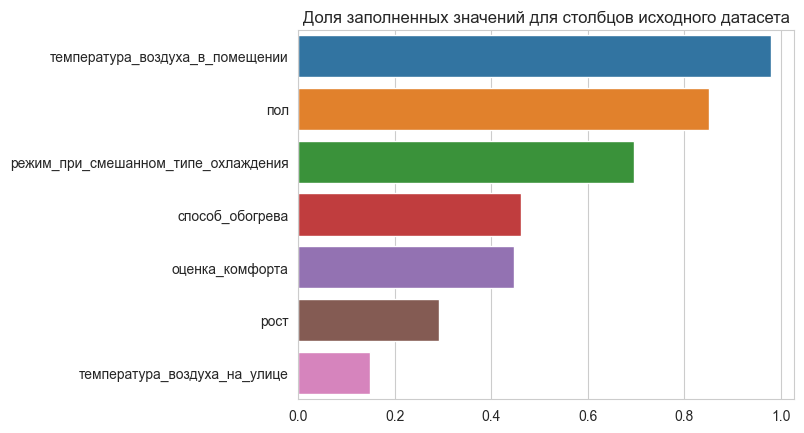

In [80]:
show_nans_bar(df)

### Сохранение итогового датасета
Завершение 1 этапа и перехо ко 2 этапу работы + доп. выводы

In [81]:
df.sort_values(["страна", "город", "год", "время_года", "способ_охлаждения", "режим_при_смешанном_типе_охлаждения", "пол", "оценка_комфорта"], inplace=True)
df.to_csv('data_2.csv', index=False, sep=';', encoding='utf-8')


1) Сильный ветер
https://en.wikipedia.org/wiki/List_of_tornadoes_in_the_2011_Super_Outbreak
https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%B7%D0%BE%D0%BD_%D0%B0%D1%82%D0%BB%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D1%83%D1%80%D0%B0%D0%B3%D0%B0%D0%BD%D0%BE%D0%B2
Везде где ветер в помещении выше 3 м/с это лето Техас 2011 год. В том году правда был ураган,
но судя по всему это явно выброс или просто пасхалка)

2) "температура_воздуха_в_помещении" > 40 (80-90)
Опять лето Техаса 2011, т.к. темп на улице примерно 25, то это выброс)

3) "среднемесячная_температура_на_улице" > 40 (80-90)
Не удивитесь лето Техаса 2011, т.к. темп на улице примерно 25, то это снова выброс)

4) Только в Индии есть времена года (не только лето) и только в Индии больше одного города

5) Города соответствуют странам (в городе только один тип климата)

6) Люди не имеют пола только... угадайте где в ТЕХАСЕ, там у всех 100% nan
Можно завести новый Техасский пол для этого случая)

7) Нету возраста только у людей из Индии конкретно (Хайдарабад, Ченнай)

8) Не желают расскрывать вес жители США и Австралии все 100%. Медиана похоже отпадает, либо признак теряет ценность.

9) С ростом к ним частично Индия подсоединяется, там больше пропусков

10) Утеплённость в среднем 0.46, 0.59, 0.80 по странам (США, Австралия, Индия)

11) По странам строк США=72 Австралия=198 Индия=214

12) способ_охлаждения => В США только Кондиционирование, в Австалии только Смешанный

13) **Посмотрел ещё раз датасет:
Аномально, что температура на улице 22-26 градусов всегда, а в офисе от 16 до 37. Словно должно быть ровно наоборот.
А среднемесячная от 8 до 38, хотя она средняя - разброс должен быть не такой большой как в моменте не улице.
Теперь кажется что сначала на улице и среднемесячную перепутали. А потом и офис с улицей перепутали.
Т.к. в офисе малый разброс, среднемесячная средний разброс, и улица максимальный разброс должен быть.
Но это очень сильно больно плохо жёстко странно невыносимо если они правда колонки местами у всех напутали.**

P.S. По пункту 13
- в офисе климатическая установка - соответсвенно разброс температур допустим
- среднемесячная температура: есть приличный размах, но измерения для разных стран и иногда разныхх сезонов (например, для Шимлы 8 градусов норма)
- мы не логируем каждый день, поэтому 22 - 26 допустимо

В общем, без паники: данные можно объяснить


### **Выводы по блоку 1**


---



1. В датасете много пропусков в росте, температуре_воздуха_на_улице - возможно, эти столбцы придется отбросить (не учитывать в модели / не ставить акцент в гипотезах)

2. Данные по Техасу содержат много выбросов (по скорости ветра + неправильные единицы измерения у среднемесячной температуры) - датчикам необходимо доп. тех обслуживание

3. Есть пропуски в оценке_комфорта. Пока основной массив гипотез будет строится вокруг них. Тем не менее заполнены значения в ощущении температуры bool (ответ клиента на вопрос доволен он температурой или нет), соответственно, можем ориентироватся на этот столбец в том числе. [Доволен температурой != доволен оборудованием](https://scanmarket.ru/tasks/customer-satisfaction), но заполненным столбцом не пренебрегаем и смотрим в гипотезах.

4. Утепление выглядит, как специфическое отношение или их сумма. Это характеристика одежды, которая меняется по городу и году.

5. Есть признаки неправильной эксплуатации оборудования - стоит оценить критичность и при необходимости добавить напоминание / доп. маркировку на упаковку.

## Шаг 2. Проведение расчётов и исследований

### Загружаем новый датасет

In [82]:
fn = "data_2.csv"
df = pd.read_csv(fn, delimiter=';')
df.head(3)

год время_года                       климат   город     страна  \
0  2010       Лето  Cубтропический океанический  Сидней  Австралия   
1  2010       Лето  Cубтропический океанический  Сидней  Австралия   
2  2010       Лето  Cубтропический океанический  Сидней  Австралия   

  способ_охлаждения режим_при_смешанном_типе_охлаждения  \
0         Смешанный                          Вентиляция   
1         Смешанный                          Вентиляция   
2         Смешанный                          Вентиляция   

          способ_обогрева  возраст      пол  ...  скорость_воздуха  рост  \
0  Механическое отопление     55.0  Женский  ...              0.05   NaN   
1  Механическое отопление     55.0  Женский  ...              0.08   NaN   
2  Механическое отопление     45.0  Женский  ...              0.08   NaN   

    вес  занавески вентилятор  окно  двери  отопление  \
0  65.0          0          0    -1     -1          0   
1  65.0          0          0     0      0          0   
2  65.0          0          0    -1     -1          0   

   среднемесячная_температура_на_улице  количество_рекламаций  
0                                 22.0                      0  
1                                 22.0                      0  
2                                 22.0                      0  

[3 rows x 30 columns]

### Столбец с процентом удовлетворенных температурой (страна, пол)

In [83]:
# предпочтительное_изменение_температуры
df["температура_удовлетворительная_%"] = (df.groupby(["страна", "пол"], sort=False, dropna=False)["предпочтительное_изменение_температуры"].transform(
                                          lambda series: round(series.where(series == "Без изменений").count() / len(series) * 100, 1)))

for key, val in df.groupby(["страна", "пол"], sort=False, dropna=False)["предпочтительное_изменение_температуры"]:
    print(key, val.value_counts())

('Австралия', 'Женский') предпочтительное_изменение_температуры
Без изменений    50
Холоднее         29
Теплее           10
Name: count, dtype: int64
('Австралия', 'Мужской') предпочтительное_изменение_температуры
Без изменений    85
Холоднее         23
Теплее            1
Name: count, dtype: int64
('Индия', 'Женский') предпочтительное_изменение_температуры
Без изменений    34
Холоднее         19
Теплее           14
Name: count, dtype: int64
('Индия', 'Мужской') предпочтительное_изменение_температуры
Без изменений    83
Холоднее         40
Теплее           22
Name: count, dtype: int64
('США', nan) предпочтительное_изменение_температуры
Без изменений    36
Холоднее         23
Теплее           13
Name: count, dtype: int64


Становится понятным, что настроения людей совпадают. Вероятно, что пол не влияет

### Создание кат столбца по кол-ву рекламаций

In [84]:
def claim(x):
    if x <= 1:
        return 'мало'
    elif x == 2:
        return 'средне'
    else:
        return 'много'

In [85]:
df['количество_рекламаций_кат'] = df['количество_рекламаций'].apply(claim)

### Средний возраст по полу и стране + возраст_кат

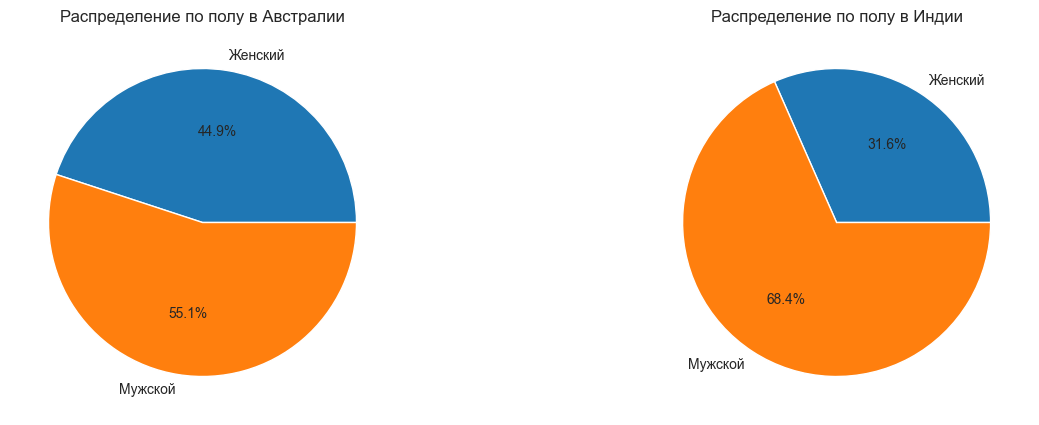

In [86]:
grouped_data = df.groupby(['страна', 'пол']).size()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].pie(grouped_data['Австралия'],
           labels=grouped_data['Австралия'].index, autopct='%1.1f%%')
axs[0].set_title('Распределение по полу в Австралии')


axs[1].pie(grouped_data['Индия'],
           labels=grouped_data['Индия'].index, autopct='%1.1f%%')
axs[1].set_title('Распределение по полу в Индии')


plt.show()

Итак, больше собрано данных про мужчин и в Индии, и в Австралии

In [87]:
df.groupby(['страна', 'пол'])['возраст'].mean()

страна     пол    
Австралия  Женский    46.348315
           Мужской    42.614679
Индия      Женский    38.447761
           Мужской    39.496552
Name: возраст, dtype: float64

In [88]:
def age_cat(x):
    if x <= 44:
        return 'молодой возраст'
    elif 45 <= x <= 59:
        return 'средний возраст'
    else:
        return 'пожилой возраст'

df['возраст_кат'] = df['возраст'].apply(age_cat)

In [89]:
df["возраст_кат"].value_counts()

возраст_кат
молодой возраст    282
средний возраст    188
пожилой возраст     12
Name: count, dtype: int64

### Рассчитать ср.комф температуру по возрастным группам

In [90]:
df.groupby(['возраст_кат', 'предпочтительное_изменение_температуры'])['температура_воздуха_в_помещении'].mean()

возраст_кат      предпочтительное_изменение_температуры
молодой возраст  Без изменений                             24.849359
                 Теплее                                    26.393939
                 Холоднее                                  25.708333
пожилой возраст  Без изменений                             25.437500
                 Теплее                                    25.150000
                 Холоднее                                  24.450000
средний возраст  Без изменений                             24.276860
                 Теплее                                    26.718182
                 Холоднее                                  24.463636
Name: температура_воздуха_в_помещении, dtype: float64

Такая тенденция, что нет определенного порога, после которого все довольны. Те, кто хотят тепла находятся в условиях с высшей температурой по сравнению с остальными группами.

С пожеланиями по холоду все выглядит логичней: температура выше "без изменений" => клиенты хотят охлаждения.

То есть более предсказуемые сегменты (если смотреть по этой таблице) именно "без изменений" и "холоднее". Актуально для среднего и молодого возраста. Для пожилых мало наблюдений

In [91]:
res = df.groupby(['возраст_кат', 'предпочтительное_изменение_температуры'])['температура_воздуха_в_помещении'].mean().reset_index()
res[res['предпочтительное_изменение_температуры'] == 'Без изменений']

возраст_кат предпочтительное_изменение_температуры  \
0  молодой возраст                          Без изменений   
3  пожилой возраст                          Без изменений   
6  средний возраст                          Без изменений   

   температура_воздуха_в_помещении  
0                        24.849359  
3                        25.437500  
6                        24.276860

* По пожилым мало данных
* У молодых больше температура, чем у зрелых.
* Молодых больше (примерно, на 100 строк), а разница со зрелыми в пару сотых
Скорее всего предпочтения сходятся, а разница "шум"

### Рассчитать медианное знач. темп и влажности для каждого типа охлаждения

In [92]:
df.groupby('способ_охлаждения')[['температура_воздуха_в_помещении', 'rh']].median()

температура_воздуха_в_помещении     rh
способ_охлаждения                                        
Вентиляция                                    25.3  46.30
Кондиционирование                             24.3  42.45
Смешанный                                     24.6  56.50

Смешанный тип берут все сиднейцы (город у океана), поэтому высокая влажность.

Вентиляция - шире обхваты и по rh усредненные значения

Кондиционирование - Индия и США, могли попась и не приморские территории, поэтому влажность сглажена

По температуре: у кондиционеров ниже

### Сводная таблица

Составить сводную таблицу, в которой данные будут сгруппированы по стране, полу, возрастной группе и подсчитаны средняя температура воздуха в помещении, на улице и средняя относительная влажность для каждой из этих групп

In [93]:
df_pivot_table = df.pivot_table(index=['пол', "возраст_кат", "страна"],
                                values=['температура_воздуха_в_помещении', "температура_воздуха_на_улице", "rh"],
                                )
df_pivot_table.round(2)

rh  температура_воздуха_в_помещении
пол     возраст_кат     страна                                           
Женский молодой возраст Австралия  61.37                            23.84
                        Индия      49.89                            26.67
        пожилой возраст Австралия  44.55                            24.90
        средний возраст Австралия  61.27                            24.11
                        Индия      49.94                            24.23
Мужской молодой возраст Австралия  61.67                            24.15
                        Индия      49.54                            25.98
        пожилой возраст Австралия  64.37                            24.73
                        Индия      78.80                            29.30
        средний возраст Австралия  61.68                            24.04
                        Индия      52.76                            26.19

Значения скорее определяются страной. Интересные эффекты проявляются там, где меньше наблюдений (у пожилых в Индии в rh).

Самостоятельно найти информацию по стандартной комфортной относительной влажности в помещениях (в нашем случае - офисы). Создать новый категориальный столбец, в котором будет показано, удовлетворяет ли зафиксированная относительная влажность стандарту или нет. Категории назначить самостоятельно.
- Источник: действующий [таблицы 1- 3 ГОСТ 30494-2011](https://evrogenstroy.ru/wp-content/uploads/2020/05/%D0%93%D0%9E%D0%A1%D0%A2-30494-2011-1.pdf) определяет параметры микроклимата для жилых, образовательных, административных и бытовых помещений, введенный вместо ГОСТ 30494-96.
- Для офисных помещений оптимальным уровнем относительной влажности считается диапазон от 40% до 60%.

In [94]:
def define_rh_category(rh_value):
    if 40 <= rh_value <= 60:
        return "норма"
    if rh_value < 40:
        return "менее_40"
    return "более_60"

df["rh_кат"] = df["rh"].apply(define_rh_category)

In [95]:
rh_cat_dict = dict()

for group in df["rh_кат"].unique():
    cnt = len(df[df["rh_кат"] == group])
    total_cnt = len(df["rh_кат"])
    rh_cat_dict[group] = float(np.round(cnt / total_cnt, 2))

rh_cat_dict

{'норма': 0.5, 'более_60': 0.31, 'менее_40': 0.19}

([<matplotlib.patches.Wedge at 0x294601bd0>,
 [Text(-0.007169673143928477, 1.0999766342004766, 'норма'),
  Text(-0.6088896376422002, -0.9161077497608839, 'более_60'),
  Text(0.912119744742097, -0.6148476000210231, 'менее_40')],
 [Text(-0.0039107308057791685, 0.5999872550184417, '50.2%'),
  Text(-0.33212162053210914, -0.4996951362332094, '30.9%'),
  Text(0.4975198607684165, -0.3353714181932853, '18.9%')])

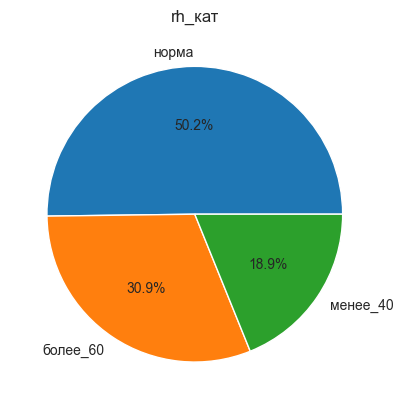

In [96]:
plt.title("rh_кат")
plt.pie(df["rh_кат"].value_counts(), labels=list(df["rh_кат"].unique()), autopct='%1.1f%%')

Большинство в норме. Дальше сегмент более_60 - есть территории рядом с водными объектами

In [97]:
df.loc[df["rh_кат"] == "менее_40", "город"].unique()

array(['Сидней', 'Ахмедабад', 'Дели', 'Хайдарабад', 'Ченнай', 'Шимла',
       'Техас'], dtype=object)

Менее_40 зафиксированы в разных городах, поэтому свести все к сбою отдельных датчиков (из-за чс, как ураганная погода в Техасе) не уместно

In [98]:
l_df = df.loc[df["rh_кат"] == "менее_40"].groupby(by=["способ_охлаждения"]).count().reset_index()
l_df = l_df.rename(columns={"год": "count"})
l_df[["способ_охлаждения", "count"]]

способ_охлаждения  count
0         Вентиляция     11
1  Кондиционирование     47
2          Смешанный     33

In [99]:
low_rh_df = df.loc[(df["rh_кат"] == "менее_40") & (df["способ_охлаждения"] == "Вентиляция")]
float(np.round(len(low_rh_df) / len(df[df["способ_охлаждения"] == "Вентиляция"]), 2))

0.33

20% от данных по вентиляции с сухим воздухом.

Сухой воздух ощущается, как более холодный ([частный вопрос на ОГЭ по физике](https://phys-oge.sdamgia.ru/problem?id=12436)), поэтому выбор вентиляции объясним.

In [100]:
df.loc[(df["rh_кат"] == "менее_40") & (df["способ_охлаждения"] == "Кондиционирование"), "страна"].unique()

array(['Индия', 'США'], dtype=object)

Может сухость из-за типа помещения (склад, например)

### Обзор полученного датасета (без графиков)

In [101]:
# Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          482 non-null    int64  
 1   время_года                                   482 non-null    object 
 2   климат                                       482 non-null    object 
 3   город                                        482 non-null    object 
 4   страна                                       482 non-null    object 
 5   способ_охлаждения                            482 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          335 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      482 non-null    float64
 9   пол                                          410 non-null    object 
 10  ощ

год     возраст  ощущение_температуры  \
count   482.000000  482.000000            482.000000   
mean   2011.029046   40.829876              0.217842   
std       0.922792   10.192946              1.090620   
min    2010.000000   22.000000             -3.000000   
25%    2010.000000   35.000000              0.000000   
50%    2011.000000   42.000000              0.000000   
75%    2012.000000   45.000000              1.000000   
max    2012.000000   65.000000              3.000000   

       ощущение_температуры_(bool)  ощущение_движения_воздуха_(bool)  \
count                   482.000000                        482.000000   
mean                      0.576763                          0.207469   
std                       0.817760                          0.607050   
min                      -1.000000                         -1.000000   
25%                       1.000000                          0.000000   
50%                       1.000000                          0.000000   
75%                       1.000000                          1.000000   
max                       1.000000                          1.000000   

       оценка_комфорта   утепление  температура_воздуха_в_помещении  \
count       215.000000  482.000000                       472.000000   
mean          4.767442    0.634149                        25.024153   
std           1.268549    0.253538                         2.791078   
min           1.000000    0.360000                        16.200000   
25%           4.000000    0.460000                        23.800000   
50%           5.000000    0.590000                        24.600000   
75%           6.000000    0.700000                        25.700000   
max           6.000000    2.080000                        37.400000   

       температура_воздуха_на_улице          rh  ...        рост         вес  \
count                     72.000000  482.000000  ...  141.000000  482.000000   
mean                      24.104167   53.019295  ...  166.665957   65.163900   
std                        0.604546   13.044019  ...    9.647404    7.673977   
min                       22.800000   23.800000  ...  134.600000   42.000000   
25%                       23.800000   42.850000  ...  160.000000   65.000000   
50%                       24.100000   53.850000  ...  165.100000   65.000000   
75%                       24.400000   62.375000  ...  172.700000   65.000000   
max                       25.900000   85.100000  ...  190.500000  110.000000   

        занавески  вентилятор        окно       двери   отопление  \
count  482.000000  482.000000  482.000000  482.000000  482.000000   
mean     0.004149    0.016598   -0.288382   -0.201245    0.093361   
std      0.386873    0.550689    0.701817    0.530718    0.394343   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%      0.000000    0.000000   -1.000000   -1.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       среднемесячная_температура_на_улице  количество_рекламаций  \
count                           482.000000             482.000000   
mean                             24.468880               0.105809   
std                               5.606436               0.441138   
min                               8.500000               0.000000   
25%                              22.000000               0.000000   
50%                              22.000000               0.000000   
75%                              29.900000               0.000000   
max                              32.800000               3.000000   

       температура_удовлетворительная_%  
count                        482.000000  
mean                          59.740041  
std                           10.266735  
min                           50.000000  
25%                           50.700000  
50% 

### Корреляции

In [102]:
# correlation_table.to_csv("unluck.csv", index=False)
fn = "data_3.csv"
df.to_csv(fn, sep=";", index=False, encoding="utf-8")

In [103]:
# функция подсчета корреляций
def matrix_correlation(df):
    res = []
    for key in df.select_dtypes(include = ('int', 'float')).columns:
        for el in df.select_dtypes(include = ('int', 'float')):
            factor1 = df[key]
            factor2 = df[el]
            if shapiro(factor1)[1] >= 0.05 and shapiro(factor2)[1] >= 0.05:
                correlation = factor1.corr(factor2, method='pearson')
                # if correlation > 0.5:
                res.append([key, el, float(correlation)])
            else:
                correlation = factor1.corr(factor2, method='spearman')
                # if correlation > 0.5:
                res.append([key, el, float(correlation)])
    return res

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


<Axes: xlabel='1', ylabel='0'>

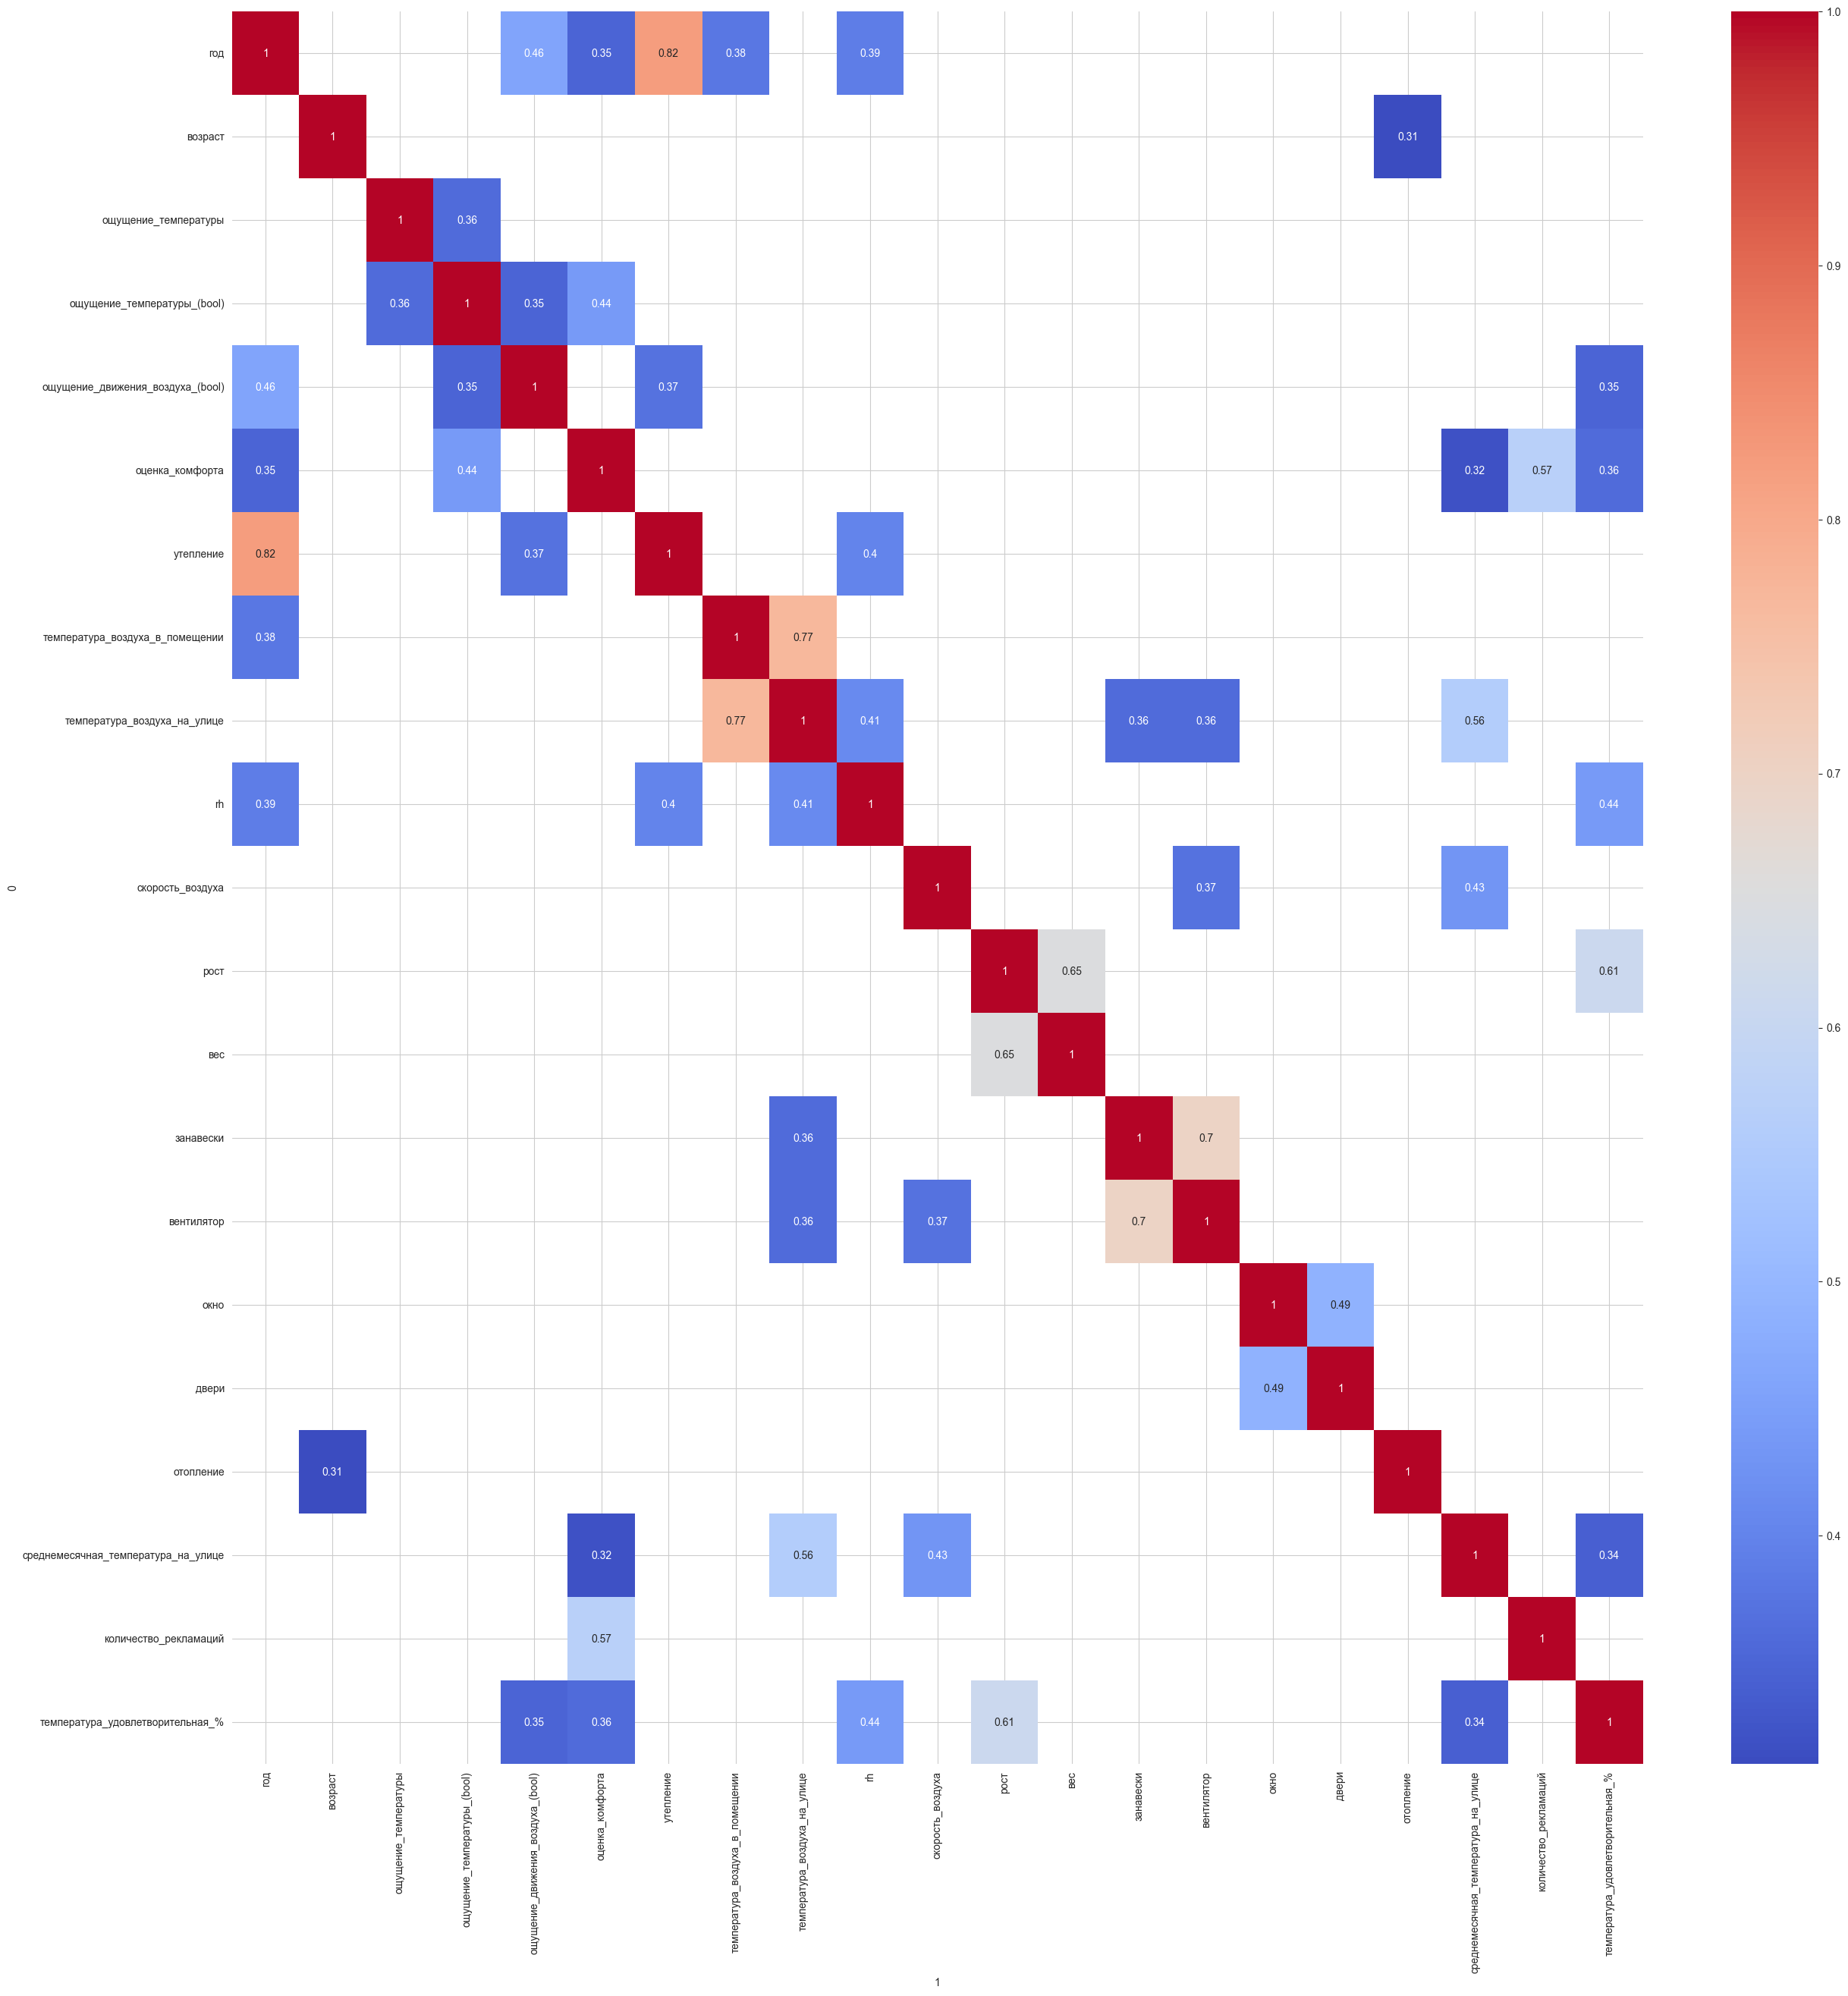

In [104]:
correlation = matrix_correlation(df)
correlation_table = pd.pivot_table(pd.DataFrame(correlation), values=2, index=0, columns=1, sort=False)
filtered_correlation_table = correlation_table[abs(correlation_table) >= 0.3]

plt.figure(figsize=(30, 30))
sns.heatmap(filtered_correlation_table.abs().round(2), annot=True, cmap='coolwarm', fmt='g')


Анализ корреляций между параметрами
* Заметную корреляцию между кол-вом рекламаций и оценкой комфорта можно объяснить следующим образом: чем ниже оценка комфорта, тем больше рекламаций, сотрудникам не нравится находиться в некомфортном помещении -> они об этом сообщат, чтобы были приняты определенные меры
* Заметную корреляцию между скоростью воздуха и среднемесячной температурой можно объяснить так: чем больше температура на улице, тем сильнее включают вентиляцию -> скорость воздуха в помещении увеличивается
* Почему-то высокая корреляция между занавесками и вентилятором


### Выводы по блоку 2

1. Ориентируемся на предпочтения без_изменений и холоднее (они более предсказуемы)
2. Обращаем внимание на климат

## Шаг 3. Гипотезы

### Проверка данных

In [105]:
fn = "data_3.csv"
# fn = 'data_3.csv'
df = pd.read_csv(fn, delimiter=";")
df.head(5)

год время_года                       климат   город     страна  \
0  2010       Лето  Cубтропический океанический  Сидней  Австралия   
1  2010       Лето  Cубтропический океанический  Сидней  Австралия   
2  2010       Лето  Cубтропический океанический  Сидней  Австралия   
3  2010       Лето  Cубтропический океанический  Сидней  Австралия   
4  2010       Лето  Cубтропический океанический  Сидней  Австралия   

  способ_охлаждения режим_при_смешанном_типе_охлаждения  \
0         Смешанный                          Вентиляция   
1         Смешанный                          Вентиляция   
2         Смешанный                          Вентиляция   
3         Смешанный                          Вентиляция   
4         Смешанный                          Вентиляция   

          способ_обогрева  возраст      пол  ...  вентилятор  окно двери  \
0  Механическое отопление     55.0  Женский  ...           0    -1    -1   
1  Механическое отопление     55.0  Женский  ...           0     0     0   
2  Механическое отопление     45.0  Женский  ...           0    -1    -1   
3  Механическое отопление     45.0  Женский  ...           0     0     0   
4  Механическое отопление     55.0  Женский  ...           0    -1    -1   

   отопление среднемесячная_температура_на_улице  количество_рекламаций  \
0          0                                22.0                      0   
1          0                                22.0                      0   
2          0                                22.0                      0   
3          0                                22.0                      0   
4          0                                22.0                      0   

   температура_удовлетворительная_%  количество_рекламаций_кат  \
0                              56.2                       мало   
1                              56.2                       мало   
2                              56.2                       мало   
3                              56.2                       мало   
4                              56.2                       мало   

       возраст_кат    rh_кат  
0  средний возраст     норма  
1  средний возраст     норма  
2  средний возраст     норма  
3  средний возраст     норма  
4  средний возраст  более_60  

[5 rows x 34 columns]

In [106]:
df.columns

Index(['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
       'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст',
       'пол', 'ощущение_температуры', 'ощущение_температуры_(bool)',
       'предпочтительное_изменение_температуры',
       'ощущение_движения_воздуха_(bool)',
       'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес',
       'занавески', 'вентилятор', 'окно', 'двери', 'отопление',
       'среднемесячная_температура_на_улице', 'количество_рекламаций',
       'температура_удовлетворительная_%', 'количество_рекламаций_кат',
       'возраст_кат', 'rh_кат'],
      dtype='object')

### Статистические функции для корреляций

In [107]:
def is_normal_distribution(column, pvalue=0.05):
    result = shapiro(column)
    if result.pvalue >= pvalue:
        return True
    return False

In [108]:
# Оценка по шкале Чеддока
def chadd(coef):
    coef = np.round(coef, 1) / 100
    if coef < 0.1:
        return "очень слабая"
    elif coef <= 0.3:
        return "слабая"
    elif coef <= 0.5:
        return "умеренная"
    elif coef <= 0.7:
        return "заметная"
    elif coef <= 0.9:
        return "высокая"
    return "весьма высокая"

In [109]:
is_normal_distribution(column=df["возраст"])

False

In [212]:
def corr_for_two_numeric(column_1, column_2, after_zero=3):
    if is_normal_distribution(column_1) and is_normal_distribution(column_2):
        result = pearsonr(column_1, column_2)
        method = "pearsonr"
    else:
        result = spearmanr(column_1, column_2)
        method = "spearmanr"
    corr_coef = float(np.round(result.statistic, after_zero))
    pval = float(np.round(result.pvalue, after_zero))
    return f'corr = {corr_coef}, p_value = {pval}, method = {method}'

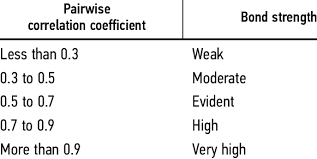

In [213]:
corr_for_two_numeric(df["возраст"], df["количество_рекламаций"])

'corr = -0.179, p_value = 0.0, method = spearmanr'

In [210]:
def corr_for_two_nominal(column_1, column_2, after_zero=3):
    current_table = pd.crosstab(column_1, column_2)
    chi_2 = chi2_contingency(current_table)
    corr = float(np.round(chi_2.statistic, after_zero))
    pval = float(np.round(chi_2.pvalue, after_zero))
    return f'corr = {corr}, p_value = {pval}'


In [113]:
corr_for_two_nominal(df["возраст_кат"], df["rh_кат"])

(19.901, 0.001)

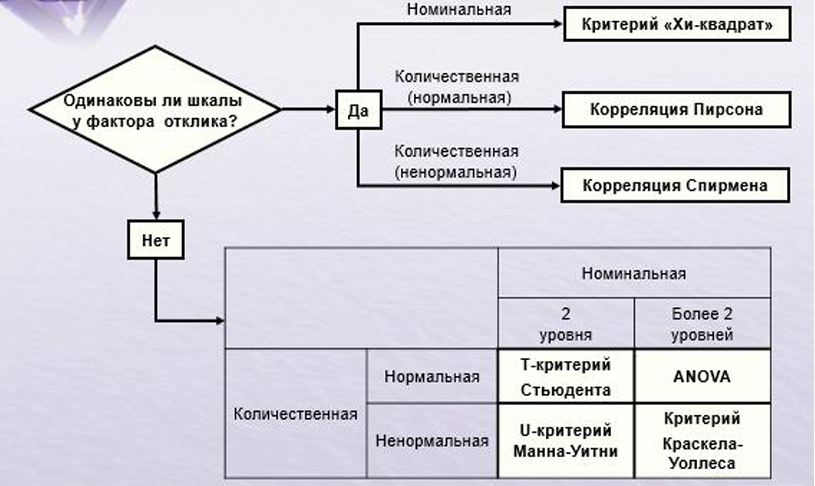

In [214]:
def corr_for_numeric_and_nominal(column_numeric, column_nominal, dataframe=df, after_zero=3):

    result = None
    method = None

    all_nom_vals = list(dataframe[column_nominal].unique())
    res_cols = list(map(lambda x: dataframe.loc[dataframe[column_nominal] == x, column_numeric], all_nom_vals))

    more_than_2_nominal_vals = len(all_nom_vals) > 2
    normal_distr = is_normal_distribution(dataframe[column_numeric])

    if normal_distr:
        if more_than_2_nominal_vals:
            method = "ANOVA"
            result = f_oneway(*res_cols, nan_policy='omit')
        else:
            method = "T-критерий Стьдента"
            result = ttest_ind(*res_cols, nan_policy='omit')
    else:
        if more_than_2_nominal_vals:
            method = "Краскел-Уоллес"
            result = kruskal(*res_cols, nan_policy='omit')
        else:
            method = "U-критерий Манна-Уитни"
            result = mannwhitneyu(*res_cols, nan_policy='omit')

    corr = float(np.round(result.statistic, after_zero))
    pvalue = float(np.round(result.pvalue, after_zero))
    return f'corr = {corr}, p_value = {pvalue}, method = {method}'


In [115]:
corr_for_numeric_and_nominal("количество_рекламаций", "rh_кат")

(11.214, 0.004, 'Краскел-Уоллес')

In [116]:
def print_res(out, pval=0.05):
    if out[1] > pval:
        return "! p-value", out
    return out

### Оценка_комфорта - как мы ее поняли

Оценка_комфорта - **номинальная шкала**.


Факторы:

1. Люди склонны к [крайним оценкам(More_positive_or_More_Extreme_A_Meta-Analysis_of_Mode_Differences_in_Response_Choice)](https://www.researchgate.net/publication/261945497_More_positive_or_More_Extreme_A_Meta-Analysis_of_Mode_Differences_in_Response_Choice)
2. Эффект социальной желательности
3. Последовательность выбора (люди часто берут первый / последний пункт)

Пример: человек доволен продуктом и выбирает между 5 и 6 значение. Учитывая краевой эффект, ответчику легче отметить 6. Теперь, 3 и 4 (все в той же 6-балльной шкале), респондент хочет выразить нейтралитет - ему придется подумать, какую сторону выбрать, возможно, подольше. В двух этих ситуациях опрашиваемый думает между оценками с разницой в балл, но усилия, которые ему требуется для принятия решения не вполне равноценные (т.е. "расстояние" между числами равно математически, но в бытовом смысле - нет). Вывод: берем оценку комфорта, как номинальную шкалу.

Для шкалы от 1-6:
1. Нет четкого нейтрального положения (четное количество ответов)
2. Больше вариантов - сложней выбрать, вероятно, что получим больше случайных или спонтанных ответов
3. Шкала на 6-значений не самая популярная, поэтому сложней судить о логике респондентов при выставлении оценки.

Мы не знаем точную формулировку вопроса и как была проградуирована шкала + соблюдены ли принципы грамотного сбора мнений (рекомендации, как улучшить онлайн опросники и как правильно составить здесь [здесь](https://www.quirks.com/articles/10-ways-to-improve-your-online-surveys))

Дополнительно про категории опрашиваемых и шкалы брали информацию:

[The effect of rating scale format on response styles:
The number of response categories and response
category labels
](https://wps-feb.ugent.be/Papers/wp_10_636.pdf)

### Проверка гипотез из файла

#### Фиксирую p-value

In [117]:
pvalue = 0.05

#### Очищаю датафрейм от Nan и 0-значений в столбце 'оценка_комфорта'

In [118]:
df.оценка_комфорта.unique() # оценок, равных 0, нет

array([nan,  4.,  5.,  6.,  2.,  3.,  1.])

In [119]:
mask = (df['оценка_комфорта'].notna())
filtered_df = df[mask]
filtered_df['оценка_комфорта'].unique()

array([4., 5., 6., 2., 3., 1.])

#### Небольшая информация об отфильтрованном фрейме

In [201]:
filtered_df.describe()

год     возраст  ощущение_температуры  \
count   215.000000  215.000000            215.000000   
mean   2011.665116   37.265116             -0.027907   
std       0.473051   10.780713              1.067429   
min    2011.000000   22.000000             -2.000000   
25%    2011.000000   25.000000             -1.000000   
50%    2012.000000   35.000000              0.000000   
75%    2012.000000   45.000000              0.000000   
max    2012.000000   65.000000              3.000000   

       ощущение_температуры_(bool)  ощущение_движения_воздуха_(bool)  \
count                   215.000000                             215.0   
mean                      0.609302                               0.0   
std                       0.794789                               0.0   
min                      -1.000000                               0.0   
25%                       1.000000                               0.0   
50%                       1.000000                               0.0   
75%                       1.000000                               0.0   
max                       1.000000                               0.0   

       оценка_комфорта   утепление  температура_воздуха_в_помещении  \
count       215.000000  215.000000                       205.000000   
mean          4.767442    0.760558                        25.139512   
std           1.268549    0.302277                         3.631743   
min           1.000000    0.460000                        16.200000   
25%           4.000000    0.570000                        23.700000   
50%           5.000000    0.660000                        24.600000   
75%           6.000000    0.780000                        26.000000   
max           6.000000    2.080000                        37.400000   

       температура_воздуха_на_улице          rh  ...        рост         вес  \
count                     72.000000  215.000000  ...  141.000000  215.000000   
mean                      24.104167   47.879535  ...  166.665957   65.958140   
std                        0.604546   14.020154  ...    9.647404    9.887362   
min                       22.800000   23.800000  ...  134.600000   42.000000   
25%                       23.800000   37.950000  ...  160.000000   60.000000   
50%                       24.100000   44.300000  ...  165.100000   65.000000   
75%                       24.400000   54.750000  ...  172.700000   70.000000   
max                       25.900000   85.100000  ...  190.500000  110.000000   

        занавески  вентилятор        окно  двери   отопление  \
count  215.000000  215.000000  215.000000  215.0  215.000000   
mean     0.009302    0.037209   -0.232558    0.0    0.209302   
std      0.579967    0.825138    0.612838    0.0    0.570216   
min     -1.000000   -1.000000   -1.000000    0.0   -1.000000   
25%      0.000000   -1.000000   -1.000000    0.0    0.000000   
50%      0.000000    0.000000    0.000000    0.0    0.000000   
75%      0.000000    1.000000    0.000000    0.0    1.000000   
max      1.000000    1.000000    1.000000    0.0    1.000000   

       среднемесячная_температура_на_улице  количество_рекламаций  \
count                           215.000000             215.000000   
mean                             26.161860               0.209302   
std                               7.239736               0.578353   
min                               8.500000               0.000000   
25%                              19.900000               0.000000   
50%                              29.500000               0.000000   
75%                              30.900000               0.000000   
max                              32.800000               3.000000   

       температура_удовлетворительная_%  
count                        215.000000  
mean                          53.458605  
std                            3.473465  
min                           50.000000  
25%                           50.000000  
50%                           50.700000  
75%    

In [202]:
filtered_df.shape

(215, 35)

#### Влияет ли способ охлаждения на оценку комфорта?

* H0: Способ охлаждения не влияет на оценку комфорта
* H1: Способ охлаждения влияет на оценку комфорта

Вывод о том, что оценка_комфорта_кат ЗАВИСИТ от способа охлаждения в 23 из 100 случаев будет являться ОШИБОЧНЫМ (а это очень много). На такие выводы могла повлиять нехватка оценок при определенных способах охлаждения, например, в вентиляции

Вывод: недостаточно оснований отвергнуть H0

Было принято решение распределить оценки по категориям для более наглядной визуализации. Выяснено следующее: при подсчете с оценкой_комфорта_кат p-уровень ниже

In [215]:
def conditioning_assessment(x):
    if 1 <= x <= 2: 
        return 'низкая оценка' 
    elif 3 <= x <= 4: 
        return 'средняя оценка' 
    else: 
        return 'высокая оценка'

filtered_df['оценка_комфорта_кат'] = filtered_df['оценка_комфорта'].apply(conditioning_assessment)

In [216]:
corr_for_two_nominal(filtered_df['способ_охлаждения'], filtered_df['оценка_комфорта_кат'])

'corr = 5.594, p_value = 0.232'

In [217]:
corr_for_two_nominal(filtered_df['способ_охлаждения'], filtered_df['оценка_комфорта'])

'corr = 11.183, p_value = 0.343'

In [218]:
pd.crosstab(filtered_df['способ_охлаждения'], filtered_df['оценка_комфорта'])

оценка_комфорта    1.0  2.0  3.0  4.0  5.0  6.0
способ_охлаждения                              
Вентиляция           0    3    1    4    7   18
Кондиционирование    0    8   15   25   30   36
Смешанный            1    3    7   11   18   28

In [219]:
pd.crosstab(filtered_df['способ_охлаждения'], filtered_df['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
способ_охлаждения                                                 
Вентиляция                       25              3               5
Кондиционирование                66              8              40
Смешанный                        46              4              18

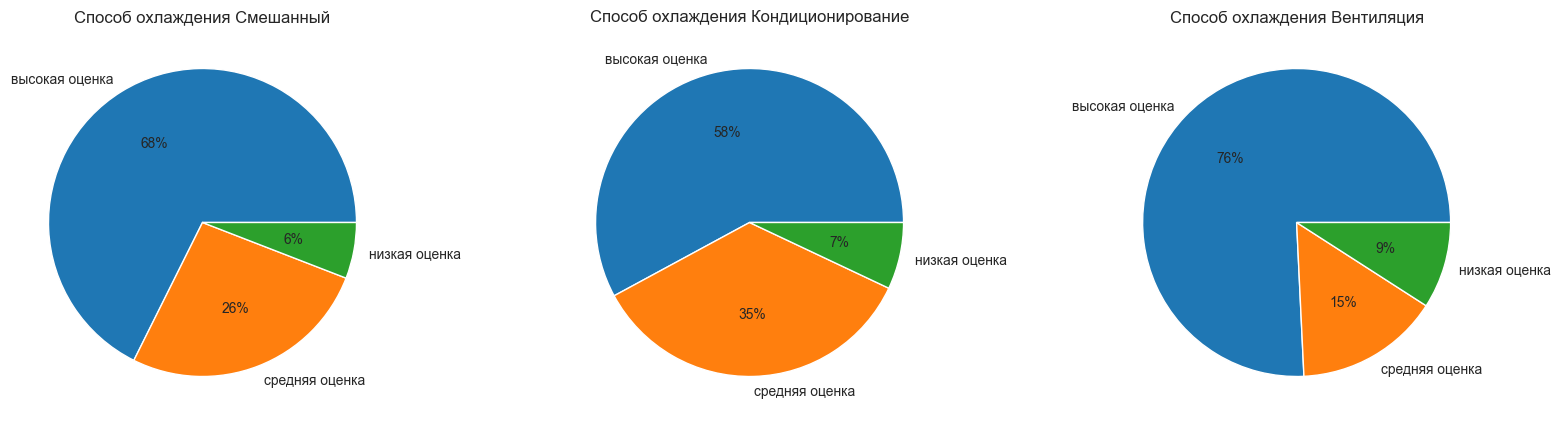

In [220]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
labels_mixed = filtered_df.loc[filtered_df['способ_охлаждения'] == 'Смешанный']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['способ_охлаждения'] == 'Смешанный']['оценка_комфорта_кат'].value_counts(), labels=labels_mixed, autopct='%.0f%%')
axes[0].set_title('Способ охлаждения Смешанный')

labels_condition = filtered_df.loc[filtered_df['способ_охлаждения'] == 'Кондиционирование']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['способ_охлаждения'] == 'Кондиционирование']['оценка_комфорта_кат'].value_counts(), labels=labels_condition, autopct='%.0f%%')
axes[1].set_title('Способ охлаждения Кондиционирование')

labels_ventilation = filtered_df.loc[filtered_df['способ_охлаждения'] == 'Вентиляция']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[2].pie(filtered_df.loc[filtered_df['способ_охлаждения'] == 'Вентиляция']['оценка_комфорта_кат'].value_counts(), labels=labels_ventilation, autopct='%.0f%%')
axes[2].set_title('Способ охлаждения Вентиляция')

plt.show()

#### Влияет ли пол на оценку комфорта?

* H0: Пол не влияет на оценку комфорта
* H1: Пол влияет на оценку комфорта

Визуальный анализ показывает, что различия есть, но они НЕ значимые (p-уровень == 0.32)
Вывод о том, что оценка_комфорта ЗАВИСИТ от пола в 32 из 100 случаев будет являться ОШИБОЧНЫМ (а это очень много)

Вывод: недостаточно оснований отвергнуть H0

In [ ]:
corr_for_two_nominal(filtered_df['пол'], filtered_df['оценка_комфорта'])

'corr = 5.829, p_value = 0.323'

p-уровень уменьшается, если взять оценку_комфорта как высокая, низкая и средняя

In [ ]:
corr_for_two_nominal(filtered_df['пол'], filtered_df['оценка_комфорта_кат'])

'corr = 4.57, p_value = 0.102'

In [ ]:
pd.crosstab(filtered_df['пол'], filtered_df['оценка_комфорта'])

оценка_комфорта  1  2  3  4   5   6
пол                                
Женский          0  1  5  8  13  17
Мужской          1  5  6  9  25  53

In [ ]:
pd.crosstab(filtered_df['пол'], filtered_df['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
пол                                                               
Женский                          30              1              13
Мужской                          78              6              15

Вывод по графику: мужчины более часто ставят высокую оценку. Однако важно обратить внимание на выборку – в ней больше мужчин, поэтому судить о том, что мужчины чаще ставят высокую оценку ошибочно 

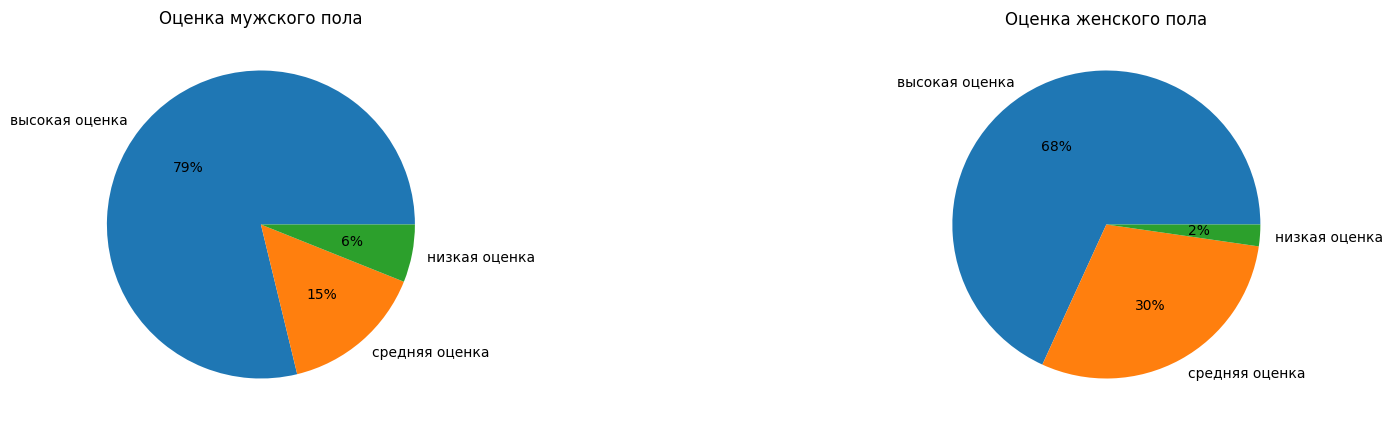

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
labels_male = filtered_df.loc[filtered_df['пол'] == 'Мужской']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['пол'] == 'Мужской']['оценка_комфорта_кат'].value_counts(), labels=labels_male, autopct='%.0f%%')
axes[0].set_title('Оценка мужского пола')

labels_female = filtered_df.loc[filtered_df['пол'] == 'Женский']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['пол'] == 'Женский']['оценка_комфорта_кат'].value_counts(), labels=labels_female, autopct='%.0f%%')
axes[1].set_title('Оценка женского пола')

plt.show()

#### Влияет ли возрастная группа на оценку комфорта?

* H0: Возрастная группа не влияет на оценку комфорта
* H1: Возрастная группа влияет на оценку комфорта

Проверяя данную гипотезу было выяснено следующее: на p-уровень оказывает сильное влияние единственная оценка от респондента пожилого возраста. Убирать данную строчку – спорный вопрос, ведь в таком случае мы будто подгоняем выводы по гипотезе, исходя из наших ожиданий

Вывод: недостаточно оснований отвергнуть H0 

In [ ]:
corr_for_two_nominal(filtered_df['возраст_кат'],filtered_df['оценка_комфорта_кат'])

'corr = 9.074, p_value = 0.059'

In [ ]:
pd.crosstab(filtered_df['возраст_кат'],filtered_df['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
возраст_кат                                                       
молодой возраст                  84              8              51
пожилой возраст                   1              0               0
средний возраст                  52              7              12

In [ ]:
test = filtered_df[filtered_df['возраст_кат'] != 'пожилой возраст']
corr_for_two_nominal(test['возраст_кат'],test['оценка_комфорта_кат'])

'corr = 8.474, p_value = 0.014'

Вывод по графику без оценки пожилого респондента: людей среднего возраста чаще устраивает уровень комфорта в офисе, поэтому они ставят более высокие оценки. Молодые в сравнении с респондентами среднего возраста чаще нейтрально(средне) оценивают уровень кофорта

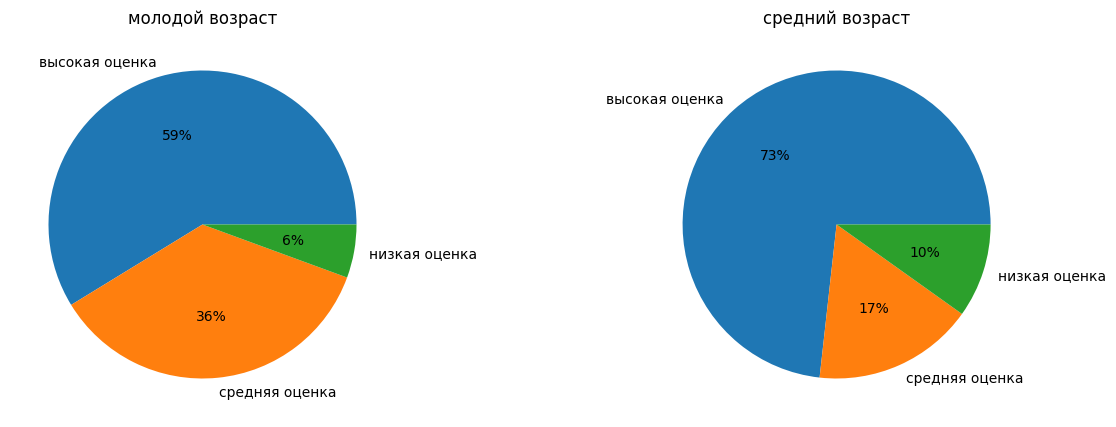

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
labels_young = filtered_df.loc[filtered_df['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_young, autopct='%.0f%%')
axes[0].set_title('молодой возраст')

labels_middle = filtered_df.loc[filtered_df['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_middle, autopct='%.0f%%')
axes[1].set_title('средний возраст')

plt.show()

#### А меняются ли оценки возрастных групп от способа охлаждения?

Опираясь на crosstab, анализ графиков и посчитанный p-value для обоих случаев, можно сделать вывод, что при смешанном типе охлаждения ситуация, в зависимости от режим_при_смешанном_типе_охлаждения тоже неизменная – оценка возрастных групп не зависит от типа охлаждения при смешанном типе охлаждения. Также нужно брать во внимание тот факт, что оценок мало: 32 при смешанный_тип_охлаждения == Вентиляция и 36 при смешанный_тип_охлаждения == Кондиционирование

##### режим_при_смешанном_типе_охлаждения == Вентиляция

In [ ]:
mask_mixed_cooling = (filtered_df['способ_охлаждения'] == 'Смешанный')
mixed_cooling_df = filtered_df[mask]
final_mixed = mixed_cooling_df[mixed_cooling_df['режим_при_смешанном_типе_охлаждения'] == 'Вентиляция']
final_mixed.sample()

/var/folders/cb/_rmqkw4n69198f5zm4qglrqr0000gn/T/ipykernel_2580/3886229464.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mixed_cooling_df = filtered_df[mask]


год время_года                            климат город страна  \
286  2012       Лето  Влажный субтропический муссонный  Дели  Индия   

    способ_охлаждения режим_при_смешанном_типе_охлаждения  \
286         Смешанный                          Вентиляция   

            способ_обогрева  возраст      пол  ...  окно  двери отопление  \
286  Механическое отопление     25.0  Женский  ...    -1      0        -1   

     среднемесячная_температура_на_улице количество_рекламаций  \
286                                 30.9                     0   

     температура_удовлетворительная_%  количество_рекламаций_кат  \
286                              50.7                       мало   

         возраст_кат  rh_кат  оценка_комфорта_кат  
286  молодой возраст   норма       средняя оценка  

[1 rows x 35 columns]

In [ ]:
pd.crosstab(final_mixed['возраст_кат'], final_mixed['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
возраст_кат                                                       
молодой возраст                  10              1               2
средний возраст                  15              1               3

In [ ]:
corr_for_two_nominal(final_mixed['возраст_кат'], final_mixed['оценка_комфорта_кат'])

'corr = 0.078, p_value = 0.962'

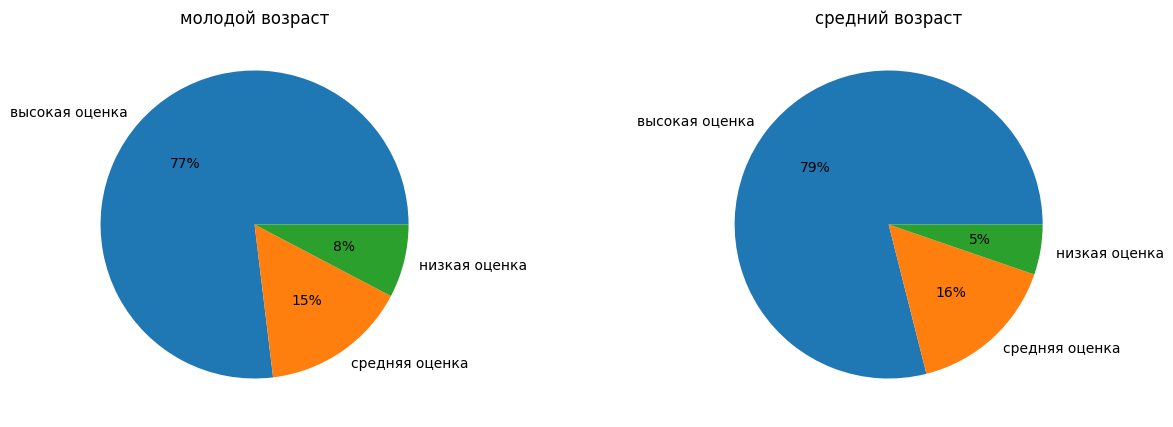

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
labels_young = final_mixed.loc[final_mixed['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(final_mixed.loc[final_mixed['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_young, autopct='%.0f%%')
axes[0].set_title('молодой возраст')

labels_middle = final_mixed.loc[final_mixed['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(final_mixed.loc[final_mixed['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_middle, autopct='%.0f%%')
axes[1].set_title('средний возраст')

plt.show()

##### режим_при_смешанном_типе_охлаждения == Кондиционирование

In [ ]:
mask_mixed_cooling = (filtered_df['способ_охлаждения'] == 'Смешанный')
mixed_cooling_df = filtered_df[mask]
final_mixed = mixed_cooling_df[mixed_cooling_df['режим_при_смешанном_типе_охлаждения'] == 'Кондиционирование']
final_mixed.sample()

/var/folders/cb/_rmqkw4n69198f5zm4qglrqr0000gn/T/ipykernel_2580/41349762.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mixed_cooling_df = filtered_df[mask]


год время_года                 климат      город страна  \
209  2012       Зима  Жаркий полузасушливый  Ахмедабад  Индия   

    способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
209         Смешанный                   Кондиционирование             NaN   

     возраст      пол  ...  окно  двери отопление  \
209     25.0  Мужской  ...    -1      0         1   

     среднемесячная_температура_на_улице количество_рекламаций  \
209                                 21.3                     0   

     температура_удовлетворительная_%  количество_рекламаций_кат  \
209                              57.2                       мало   

         возраст_кат  rh_кат  оценка_комфорта_кат  
209  молодой возраст   норма       высокая оценка  

[1 rows x 35 columns]

In [ ]:
pd.crosstab(final_mixed['возраст_кат'], final_mixed['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
возраст_кат                                                       
молодой возраст                  11              0               7
средний возраст                  10              2               6

In [ ]:
corr_for_two_nominal(final_mixed['возраст_кат'], final_mixed['оценка_комфорта_кат'])

'corr = 2.125, p_value = 0.346'

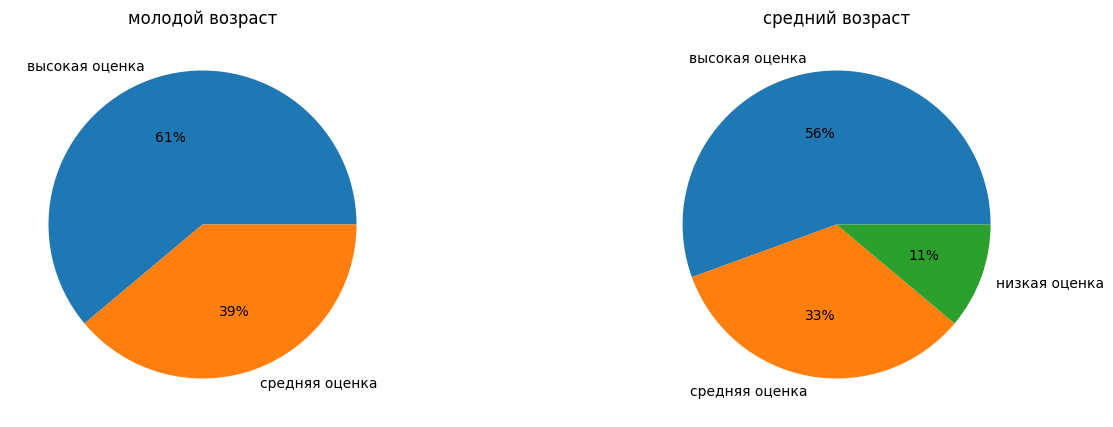

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
labels_young = final_mixed.loc[final_mixed['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(final_mixed.loc[final_mixed['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_young, autopct='%.0f%%')
axes[0].set_title('молодой возраст')

labels_middle = final_mixed.loc[final_mixed['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(final_mixed.loc[final_mixed['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_middle, autopct='%.0f%%')
axes[1].set_title('средний возраст')

plt.show()

##### Кондиционирование

In [ ]:
filtered_df[filtered_df['способ_охлаждения'] == 'Кондиционирование'].sample()

год время_года                       климат  город страна  \
416  2011       Лето  Cубтропический океанический  Техас    США   

     способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
416  Кондиционирование                                 NaN             NaN   

     возраст  пол  ...  окно  двери отопление  \
416     50.0  NaN  ...     0      0         0   

     среднемесячная_температура_на_улице количество_рекламаций  \
416                                 32.8                     1   

     температура_удовлетворительная_%  количество_рекламаций_кат  \
416                              50.0                       мало   

         возраст_кат  rh_кат  оценка_комфорта_кат  
416  средний возраст   норма        низкая оценка  

[1 rows x 35 columns]

In [ ]:
conditioning_df = filtered_df[filtered_df['способ_охлаждения'] == 'Кондиционирование']
pd.crosstab(conditioning_df['возраст_кат'], conditioning_df['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
возраст_кат                                                       
молодой возраст                  55              7              37
средний возраст                  11              1               3

In [ ]:
corr_for_two_nominal(conditioning_df['возраст_кат'], conditioning_df['оценка_комфорта_кат'])

'corr = 1.835, p_value = 0.4'

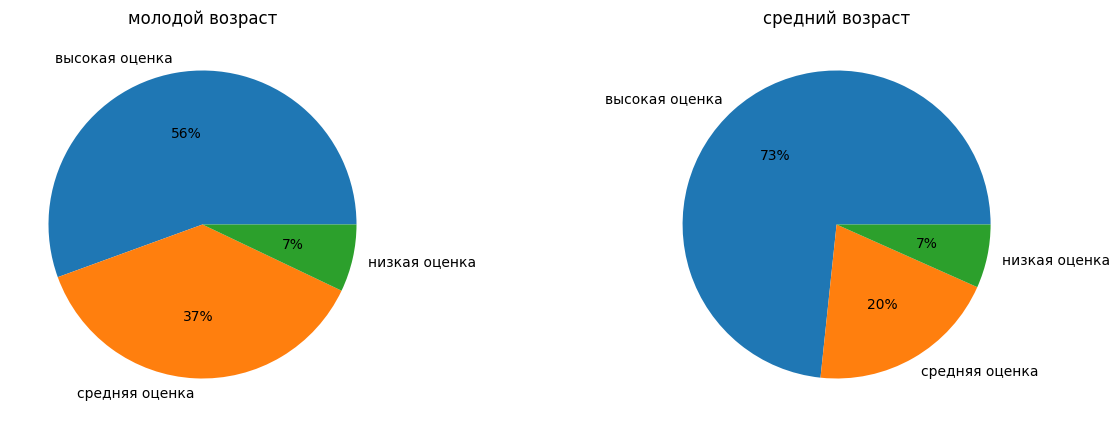

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
labels_young = conditioning_df.loc[conditioning_df['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(conditioning_df.loc[conditioning_df['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_young, autopct='%.0f%%')
axes[0].set_title('молодой возраст')

labels_middle = conditioning_df.loc[conditioning_df['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(conditioning_df.loc[conditioning_df['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_middle, autopct='%.0f%%')
axes[1].set_title('средний возраст')

plt.show()

##### Вентиляция

In [ ]:
filtered_df[filtered_df['способ_охлаждения'] == 'Вентиляция'].sample()

год время_года                       климат     город страна  \
248  2012       Лето  Тропическая влажная саванна  Бангалор  Индия   

    способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
248        Вентиляция                                 NaN             NaN   

     возраст      пол  ...  окно  двери отопление  \
248     45.0  Женский  ...    -1      0         0   

     среднемесячная_температура_на_улице количество_рекламаций  \
248                                 30.8                     0   

     температура_удовлетворительная_%  количество_рекламаций_кат  \
248                              50.7                       мало   

         возраст_кат    rh_кат  оценка_комфорта_кат  
248  средний возраст  более_60       высокая оценка  

[1 rows x 35 columns]

In [ ]:
conditioning_df = filtered_df[filtered_df['способ_охлаждения'] == 'Вентиляция']

In [ ]:
pd.crosstab(conditioning_df['возраст_кат'], conditioning_df['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
возраст_кат                                                       
молодой возраст                   8              0               5
пожилой возраст                   1              0               0
средний возраст                  16              3               0

In [ ]:
corr_for_two_nominal(conditioning_df['возраст_кат'], conditioning_df['оценка_комфорта_кат'])

'corr = 10.507, p_value = 0.033'

Вывод: графики показывают, что в зависимости от возраста оценки комфорта при вентиляционном охлаждении отличаются. Однако мы имеем очень маленькую выборку – всего 33 оценки

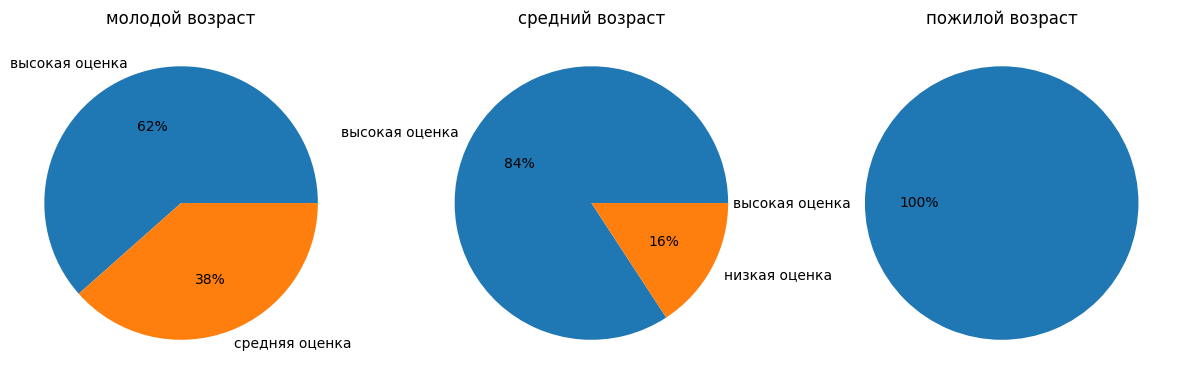

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
labels_young = conditioning_df.loc[conditioning_df['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(conditioning_df.loc[conditioning_df['возраст_кат'] == 'молодой возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_young, autopct='%.0f%%')
axes[0].set_title('молодой возраст')

labels_middle = conditioning_df.loc[conditioning_df['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(conditioning_df.loc[conditioning_df['возраст_кат'] == 'средний возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_middle, autopct='%.0f%%')
axes[1].set_title('средний возраст')

labels_old = conditioning_df.loc[conditioning_df['возраст_кат'] == 'пожилой возраст']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[2].pie(conditioning_df.loc[conditioning_df['возраст_кат'] == 'пожилой возраст']['оценка_комфорта_кат'].value_counts(), labels=labels_old, autopct='%.0f%%')
axes[2].set_title('пожилой возраст')


plt.show()

#### Есть ли взаимосвязь между количеством рекламаций и оценкой комфорта?

* H0: Оценка комфорта не влияет на кол-во рекламаций
* H1: Оценка комфорта влияет на кол-во рекламаций

Проведя аналитический и графический анализ гипотезы, можно сделать вывод, что статистически значимая связь между столбцами 'количество_рекламаций' и 'оценка_комфорта' есть. Принимаем H1 


In [ ]:
corr_for_numeric_and_nominal('количество_рекламаций', 'оценка_комфорта', after_zero=100)

'corr = 301.0897509949532, p_value = 4.778182325470142e-62, method = Краскел-Уоллес'

Анализ числового столбца 'количество_рекламаций' и номинального 'оценка_комфорта' дал очень маленький p-уровень.
Для подтверждения H1 попробуем использовать категориальную переменную количество_рекламаций_кат


In [ ]:
corr_for_two_nominal(filtered_df['количество_рекламаций_кат'], filtered_df['оценка_комфорта'], after_zero=10)

'corr = 30.676587097, p_value = 0.0006633837'

Можно сделать вывод о том, что p-уровень мал, а это значит, что есть статистически значимая связь между столбцами 'количество_рекламаций_кат' и 'оценка_комфорта'. Однако, нужно брать во внимание тот факт, что среднего и большого кол-ва рекламаций намного меньше, чем малого количества рекламаций

Вывод по графику: в большинстве своем, при малом количестве рекламаций оценка комфорта выше среднего

<Axes: xlabel='количество_рекламаций_кат', ylabel='оценка_комфорта'>

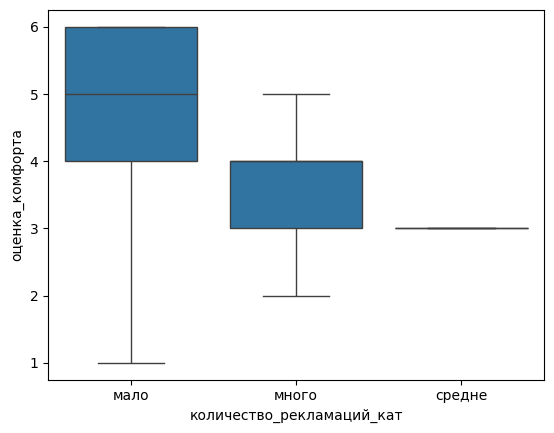

In [ ]:
sns.boxplot(x='количество_рекламаций_кат', y='оценка_комфорта', data=filtered_df)

<Axes: xlabel='оценка_комфорта_кат', ylabel='количество_рекламаций'>

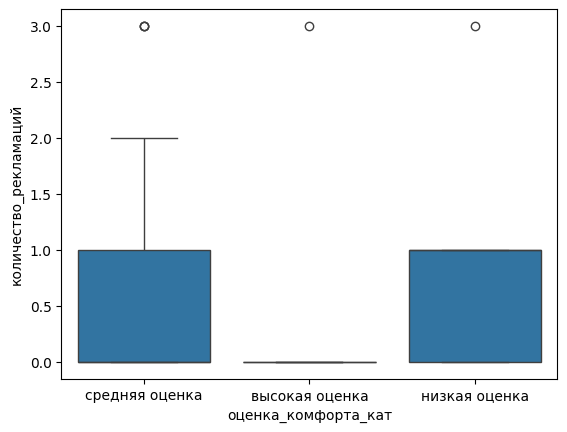

In [ ]:
sns.boxplot(x='оценка_комфорта_кат', y='количество_рекламаций', data=filtered_df)

В начале анализа гипотез был введен новый категориальны столбец 'оценка_комфорта_кат'. Проведем анализ между двумя категориальными столбцами 'количество_рекламаций_кат' и 'оценка_комфорта_кат' 

In [ ]:
corr_for_two_nominal(filtered_df['количество_рекламаций_кат'], filtered_df['оценка_комфорта_кат'])

'corr = 11.923, p_value = 0.018'

In [ ]:
pd.crosstab(filtered_df['количество_рекламаций_кат'], filtered_df['оценка_комфорта_кат'])

оценка_комфорта_кат        высокая оценка  низкая оценка  средняя оценка
количество_рекламаций_кат                                               
мало                                  136             14              57
много                                   1              1               3
средне                                  0              0               3

Такой результат на круговых диаграммах мы могли получить из-за того, что данных по малому количеству рекламаций очень много, в сравнении с другими 

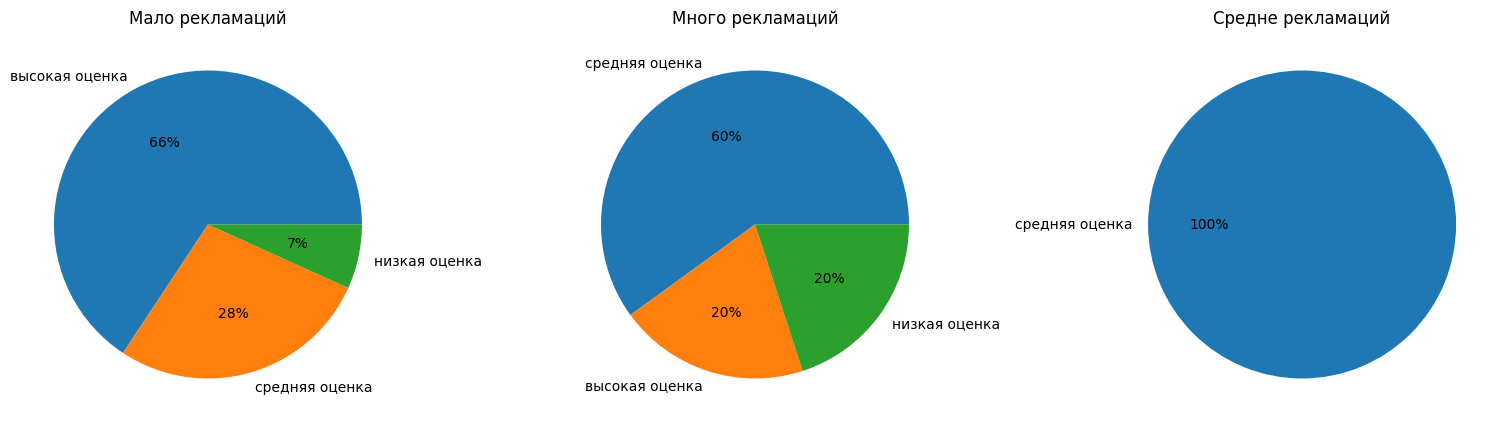

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
labels_low = filtered_df.loc[filtered_df['количество_рекламаций_кат'] == 'мало']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['количество_рекламаций_кат'] == 'мало']['оценка_комфорта_кат'].value_counts(), labels=labels_low, autopct='%.0f%%')
axes[0].set_title('Мало рекламаций')

labels_high = filtered_df.loc[filtered_df['количество_рекламаций_кат'] == 'много']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['количество_рекламаций_кат'] == 'много']['оценка_комфорта_кат'].value_counts(), labels=labels_high, autopct='%.0f%%')
axes[1].set_title('Много рекламаций')

labels_mid = filtered_df.loc[filtered_df['количество_рекламаций_кат'] == 'средне']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[2].pie(filtered_df.loc[filtered_df['количество_рекламаций_кат'] == 'средне']['оценка_комфорта_кат'].value_counts(),labels=labels_mid, autopct='%.0f%%')
axes[2].set_title('Средне рекламаций')

plt.show()

#### Проверить гипотезу о том, что средняя оценка комфорта отличается в зависимости от страны


* H0: Оценка комфорта(сред) не отличается в зависимости от страны
* H1: Оценка комфорта(сред) отличается в зависимости от страны


Проведя аналитический и графический анализ гипотезы, можно сделать вывод, что статистически значимая связь между столбцами 'оценка_комфорта' и 'страна' есть. Принимаем H1

Для анализа средней оценки комфорта хорошо подходит 'оценка_комфорта_кат' которая отражает, на какую в среднем оценку жители оценивают работу оборудования

Оценка комфорта кат – номинальная шкала. Страна – номинальная шкала -> исследуем связь двух номинальных столбцов

In [ ]:
corr_for_two_nominal(filtered_df['оценка_комфорта_кат'], filtered_df['страна'], after_zero=100)

'corr = 25.76212874266402, p_value = 2.545803167430494e-06'

In [ ]:
pd.crosstab(filtered_df['оценка_комфорта_кат'], filtered_df['страна'])

страна               Индия  США
оценка_комфорта_кат            
высокая оценка         108   29
низкая оценка            7    8
средняя оценка          28   35

Вывод: Жители Индии намного чаще ставят высокие оценки

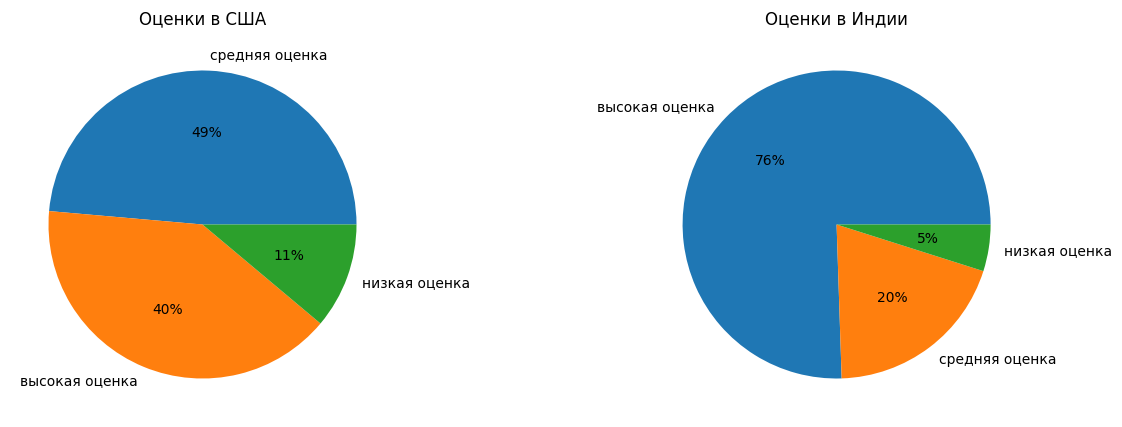

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
labelsUSA = filtered_df.loc[filtered_df['страна'] == 'США']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['страна'] == 'США']['оценка_комфорта_кат'].value_counts(),labels=labelsUSA, autopct='%.0f%%')
axes[0].set_title('Оценки в США')

labelsINDIA = filtered_df.loc[filtered_df['страна'] == 'Индия']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['страна'] == 'Индия']['оценка_комфорта_кат'].value_counts(), labels=labelsINDIA, autopct='%.0f%%')
axes[1].set_title('Оценки в Индии')

plt.show()

(array([ 8.,  0., 12.,  0.,  0., 23.,  0., 17.,  0., 12.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

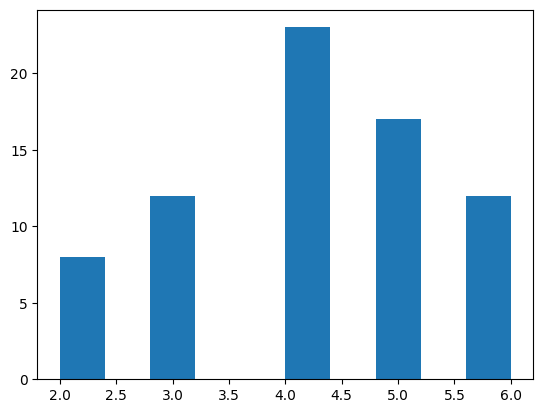

In [ ]:
plt.hist(filtered_df[filtered_df['страна'] == 'США']['оценка_комфорта'])

(array([ 1.,  0.,  6.,  0., 11.,  0., 17.,  0., 38., 70.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

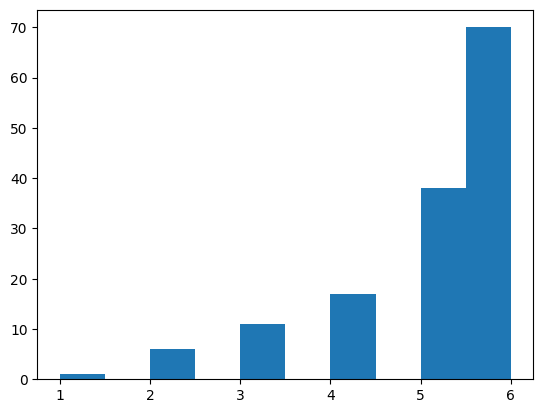

In [ ]:
plt.hist(filtered_df[filtered_df['страна'] == 'Индия']['оценка_комфорта'])

### Дополнительные гипотезы

Проверить гипотезу о том, что средняя оценка комфорта отличается в зависимости от страны

В файле такая формулировка, предлагаю поменять на медиану, принмая во внимание тип шкалы.

Проверить корреляции:
1. 'rh_кат' и "оценка_комфорта"
механизм: люди с влажностью в помещении отличной от нормы чувствуют себя неуютно - на основании этого ставят негативные оценки
2. Влияет ли время года на оценку комфорта?
3. Влияет ли ощущение температуры на оценку комфорта


Влияет ли предпочтительное изменение температуры на оценку комфорта? 

#### Влияет ли 'rh_кат' на оценку комфорта?

H0: 'rh_ кат' и 'оценка_комфорта' не связаны
H1: 'rh_ кат' и 'оценка_комфорта' связаны

pvalue > 0.05 - вероятность случайности найденной зависимости > 5%. 

Значит отвергаем Н1 и принимаем Н0 - А и Б не влияют друг на друга


rh-кат - номинальная шкала, оценка комфорта – номинальная шкала -> исследуем связь двух номинальных столбцов  

In [ ]:
corr_for_two_nominal(filtered_df['оценка_комфорта'], filtered_df['rh_кат'])

'corr = 14.749, p_value = 0.141'

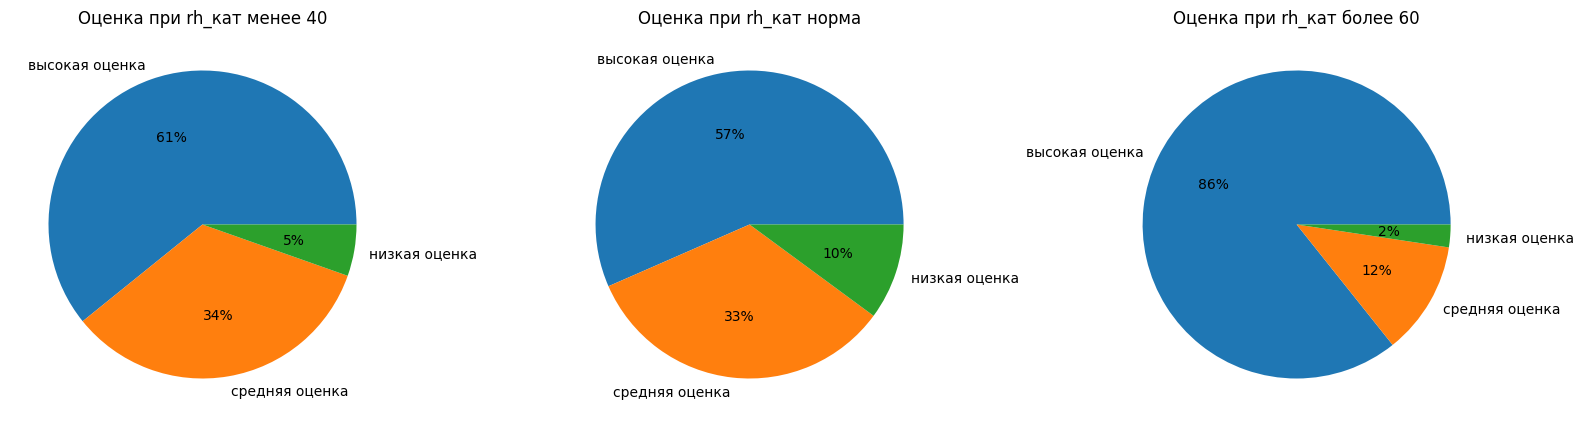

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
labelsRH40 = filtered_df.loc[filtered_df['rh_кат'] == 'менее_40']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['rh_кат'] == 'менее_40']['оценка_комфорта_кат'].value_counts(), labels=labelsRH40, autopct='%.0f%%')
axes[0].set_title('Оценка при rh_кат менее 40')

labelsRH_NORM = filtered_df.loc[filtered_df['rh_кат'] == 'норма']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['rh_кат'] == 'норма']['оценка_комфорта_кат'].value_counts(), labels=labelsRH_NORM, autopct='%.0f%%')
axes[1].set_title('Оценка при rh_кат норма')

labelsRH60 = filtered_df.loc[filtered_df['rh_кат'] == 'более_60']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[2].pie(filtered_df.loc[filtered_df['rh_кат'] == 'более_60']['оценка_комфорта_кат'].value_counts(), labels=labelsRH60, autopct='%.0f%%')
axes[2].set_title('Оценка при rh_кат более 60')

plt.show()

#### Влияет ли время года на оценку комфорта?

H0: Время года не влияет на оценку комфорта (данные не связаны)

H1: Время года влияет на оценку комфорта (данные связаны)


In [ ]:
corr_for_two_nominal(filtered_df['время_года'], filtered_df['оценка_комфорта_кат'])

'corr = 8.994, p_value = 0.011'

In [ ]:
pd.crosstab(filtered_df['время_года'], filtered_df['оценка_комфорта_кат'])

оценка_комфорта_кат  высокая оценка  низкая оценка  средняя оценка
время_года                                                        
Зима                             43              0              12
Лето                             94             15              51

Графики показывают, что время года влияет на оценку комфорта, однако нужно обратить внимание на p-value и выборку: данных по лету намного больше

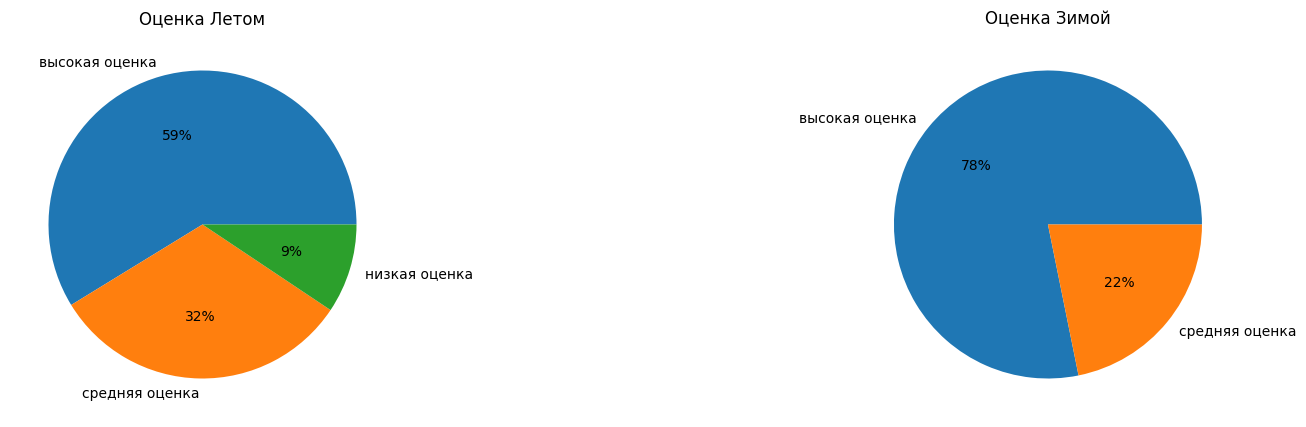

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
labels_summer = filtered_df.loc[filtered_df['время_года'] == 'Лето']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['время_года'] == 'Лето']['оценка_комфорта_кат'].value_counts(), labels=labels_summer, autopct='%.0f%%')
axes[0].set_title('Оценка Летом')

labels_winter = filtered_df.loc[filtered_df['время_года'] == 'Зима']['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['время_года'] == 'Зима']['оценка_комфорта_кат'].value_counts(), labels=labels_winter, autopct='%.0f%%')
axes[1].set_title('Оценка Зимой')


plt.show()

#### Влияет ли ощущение температуры на оценку комфорта

H0: ощущение температуры не влияет на оценку комфорта 

H1: ощущение температуры влияет на оценку комфорта

p-value < 0.05 – можно сделать вывод о том, что связь между данными достаточно сильная -> отвергаем H0

In [ ]:
corr_for_two_nominal(filtered_df['ощущение_температуры_(bool)'], filtered_df['оценка_комфорта_кат'], after_zero=100)

'corr = 57.81677648627206, p_value = 2.787703018231136e-13'

In [ ]:
pd.crosstab(filtered_df['ощущение_температуры_(bool)'], filtered_df['оценка_комфорта_кат'])

оценка_комфорта_кат          высокая оценка  низкая оценка  средняя оценка
ощущение_температуры_(bool)                                               
-1                                       11             13              18
 1                                      126              2              45

Графики подтверждают гипотезу о том, что ощущение температуры влияет на оценку комфорта, однако важно обратить внимание на то, что данных с оценкой -1 намного меньше

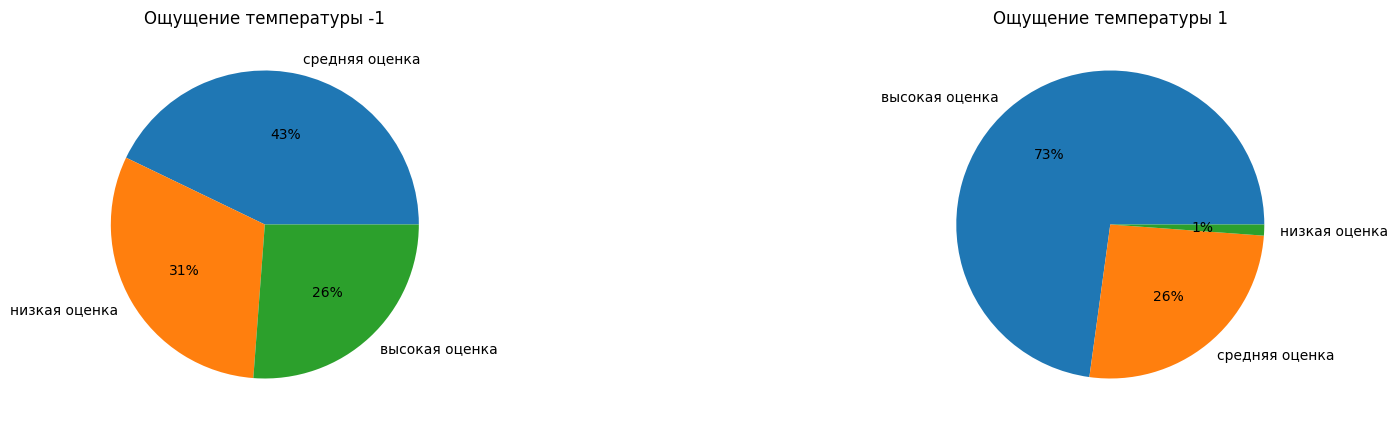

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
labels_minus1 = filtered_df.loc[filtered_df['ощущение_температуры_(bool)'] == -1]['оценка_комфорта_кат'].value_counts().index.tolist()
axes[0].pie(filtered_df.loc[filtered_df['ощущение_температуры_(bool)'] == -1]['оценка_комфорта_кат'].value_counts(), labels=labels_minus1, autopct='%.0f%%')
axes[0].set_title('Ощущение температуры -1')

labels_1 = filtered_df.loc[filtered_df['ощущение_температуры_(bool)'] == 1]['оценка_комфорта_кат'].value_counts().index.tolist()
axes[1].pie(filtered_df.loc[filtered_df['ощущение_температуры_(bool)'] == 1]['оценка_комфорта_кат'].value_counts(), labels=labels_1, autopct='%.0f%%')
axes[1].set_title('Ощущение температуры 1')


plt.show()

### Дополнительно про оценку комфорта

In [148]:
print("оценка_комфорта")
for cur_col in nominal_columns:
    corr_coef, pv = corr_for_two_nominal(df["оценка_комфорта"], df[cur_col])
    flag = "-"
    if pv > 0.05:
        flag = "?"
    verdict = chadd(corr_coef)
    print(f" {flag} {cur_col}: {verdict} (corr={corr_coef}, pvalue={pv})")
# для типа численная - номинальная не можем оценить силу связи

оценка_комфорта
 ? время_года: очень слабая (corr=9.058, pvalue=0.107)
 - климат: умеренная (corr=44.156, pvalue=0.001)
 - город: умеренная (corr=45.012, pvalue=0.008)
 - страна: умеренная (corr=31.231, pvalue=0.0)
 ? способ_охлаждения: слабая (corr=11.183, pvalue=0.343)
 ? режим_при_смешанном_типе_охлаждения: очень слабая (corr=6.289, pvalue=0.279)
 ? способ_обогрева: очень слабая (corr=0.0, pvalue=1.0)
 ? пол: очень слабая (corr=5.829, pvalue=0.323)
 - ощущение_температуры_(bool): заметная (corr=66.967, pvalue=0.0)
 - предпочтительное_изменение_температуры: заметная (corr=64.001, pvalue=0.0)
 - предпочтительное_изменение_движения_воздуха: заметная (corr=58.489, pvalue=0.0)
 - окно: слабая (corr=21.537, pvalue=0.018)
 ? двери: очень слабая (corr=0.0, pvalue=1.0)
 - отопление: слабая (corr=19.562, pvalue=0.034)


## Шаг 4. Линейная регрессия

### Проверка данных

In [149]:
df = pd.read_csv('data_3.csv', delimiter=';')
print(list(df.columns))
df.head(3)

['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения', 'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст', 'пол', 'ощущение_температуры', 'ощущение_температуры_(bool)', 'предпочтительное_изменение_температуры', 'ощущение_движения_воздуха_(bool)', 'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта', 'утепление', 'температура_воздуха_в_помещении', 'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес', 'занавески', 'вентилятор', 'окно', 'двери', 'отопление', 'среднемесячная_температура_на_улице', 'количество_рекламаций', 'температура_удовлетворительная_%', 'количество_рекламаций_кат', 'возраст_кат', 'rh_кат']


год время_года                       климат   город     страна  \
0  2010       Лето  Cубтропический океанический  Сидней  Австралия   
1  2010       Лето  Cубтропический океанический  Сидней  Австралия   
2  2010       Лето  Cубтропический океанический  Сидней  Австралия   

  способ_охлаждения режим_при_смешанном_типе_охлаждения  \
0         Смешанный                          Вентиляция   
1         Смешанный                          Вентиляция   
2         Смешанный                          Вентиляция   

          способ_обогрева  возраст      пол  ...  вентилятор  окно двери  \
0  Механическое отопление     55.0  Женский  ...           0    -1    -1   
1  Механическое отопление     55.0  Женский  ...           0     0     0   
2  Механическое отопление     45.0  Женский  ...           0    -1    -1   

   отопление среднемесячная_температура_на_улице  количество_рекламаций  \
0          0                                22.0                      0   
1          0                                22.0                      0   
2          0                                22.0                      0   

   температура_удовлетворительная_%  количество_рекламаций_кат  \
0                              56.2                       мало   
1                              56.2                       мало   
2                              56.2                       мало   

       возраст_кат  rh_кат  
0  средний возраст   норма  
1  средний возраст   норма  
2  средний возраст   норма  

[3 rows x 34 columns]

### Выбрать нужные колонки

Категории:
* Предсказываем: *температура_воздуха_в_помещении*
* Колличественные значения: значения, которые предположительно (с некоторыми пробами и ошибками) положительно влияют на моделируемое значение
* Категориальные значения: значения, для категоризации, которые положительно влияют на моделируемое значение
* Не используется: значения содержащие слишком много NaN, или не влияющие на моделирование

In [150]:
cols_df_original = list(df.columns)

# Output => 'температура_воздуха_в_помещении'
col_pred = ['температура_воздуха_в_помещении']

# Using (OHE categorial)
cols_input_ohe = []
cols_input_cat = [
    'год', 'время_года', 'климат', 'город',
    'rh_кат', 'способ_охлаждения', 'способ_обогрева',
]

# Using
cols_input_val = [
    'rh', 'окно', 'двери', 'отопление', 'занавески', 'вентилятор',
    'среднемесячная_температура_на_улице',
]

# Not using
_ = [
    # Не влияет на температуру
    'пол',
    'вес',
    'рост',
    'возраст',
    'возраст_кат',
    'утепление',
    'ощущение_температуры_(bool)',
    'ощущение_движения_воздуха_(bool)',
    'температура_удовлетворительная_%',
    'ощущение_температуры',
    'предпочтительное_изменение_температуры',
    'предпочтительное_изменение_движения_воздуха',

    # Не имеет смысла
    'количество_рекламаций',
    'количество_рекламаций_кат',

    # Ничего не меняет
    'страна',  # Есть город
    'скорость_воздуха',  # Не коррелирует с температурой (воздух в офисе)
    'режим_при_смешанном_типе_охлаждения',  # Уже присутствует

    # Nan
    'оценка_комфорта',
]

### Подготовка датасета

In [151]:
filter1 = ~df['режим_при_смешанном_типе_охлаждения'].isna()
filter2 = df['способ_охлаждения'].str.contains('Смешанный')
idx = df[ filter1 & filter2 ].index
df.loc[idx, 'способ_охлаждения'] = df.loc[idx, 'режим_при_смешанном_типе_охлаждения']

df['способ_обогрева'] = df['способ_обогрева'].fillna('NaN')

print(df['способ_охлаждения'].unique(), df['способ_обогрева'].unique())

['Вентиляция' 'Кондиционирование'] ['Механическое отопление' 'NaN']


In [152]:
df_all = df.copy()
df_train, df_test = train_test_split(df_all, test_size=0.2, random_state=123)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

ohe_for_col = dict((col_cat, LabelBinarizer().fit(df_train[col_cat].astype(str)))
                   for col_cat in cols_input_cat)
# print(ohe_for_col)


def df_to_sub_data(in_df: pd.DataFrame, dropna=True) -> pd.DataFrame:
    global cols_input_ohe
    data_result = None

    for col_cat in cols_input_cat:
        transformed = ohe_for_col[col_cat].transform(in_df[col_cat].astype(str))
        ohe_df = pd.DataFrame(transformed).add_suffix(f"_{col_cat}")
        if data_result is not None:
            data_result = pd.concat([data_result, ohe_df], axis=1)
        else:
            data_result = ohe_df
    cols_input_ohe = list(data_result.columns)

    result = pd.concat([in_df[col_pred], in_df[cols_input_val], data_result], axis=1)
    if dropna:
        result.dropna(axis=0, how='any', inplace=True)
    return result


data_train, data_test = df_to_sub_data(df_train), df_to_sub_data(df_test)
data_all = pd.concat([data_train, data_test], axis=0)

X_cols, y_col = cols_input_val + cols_input_ohe, col_pred

# display(data_all)
# display(df_all)
data_all

температура_воздуха_в_помещении    rh  окно  двери  отопление  занавески  \
0                              24.6  64.6     0      0          1          0   
1                              28.8  40.0    -1     -1          0          0   
2                              26.3  49.0    -1     -1          0          0   
3                              28.1  46.0    -1      1          0          0   
4                              24.7  42.2     0      0          0          1   
..                              ...   ...   ...    ...        ...        ...   
92                             22.6  66.8     0      0          0          0   
93                             23.1  57.6     0      0          1          0   
94                             24.4  69.0     0      0          0          0   
95                             21.9  55.0    -1     -1          0          0   
96                             22.1  35.1    -1      0          0          0   

    вентилятор  среднемесячная_температура_на_улице  0_год  1_год  ...  \
0            1                                 30.8      0      0  ...   
1            0                                 17.0      0      0  ...   
2            0                                 30.8      0      0  ...   
3            0                                 25.7      0      0  ...   
4            1                                 32.8      0      1  ...   
..         ...                                  ...    ...    ...  ...   
92           0                                 22.0      1      0  ...   
93           0                                 30.9      0      0  ...   
94           0                                 22.0      1      0  ...   
95           0                                 22.0      1      0  ...   
96           0                                  8.5      0      0  ...   

    3_город  4_город  5_город  6_город  7_город  0_rh_кат  1_rh_кат  2_rh_кат  \
0         0        0        0        0        0         1         0         0   
1         0        0        0        1        0         0         0         1   
2         0        0        0        1        0         0         0         1   
3         0        0        1        0        0         0         0         1   
4         0        1        0        0        0         0         0         1   
..      ...      ...      ...      ...      ...       ...       ...       ...   
92        1        0        0        0        0         1         0         0   
93        0        0        0        0        0         0         0         1   
94        1        0        0        0        0         1         0         0   
95        1        0        0        0        0         0         0         1   
96        0        0        0        0        1         0         1         0   

    0_способ_охлаждения  0_способ_обогрева  
0                     1                  0  
1                     1                  0  
2                     1                  0  
3                     1                  0  
4                     1                  0  
..                  ...                ...  
92                    1                  1  
93                    1                  0  
94                    1                  1  
95                    0                  1  
96                    1                  1  

[472 rows x 33 columns]

In [153]:
# Drop: температура_воздуха_в_помещении (10 nan) не помогут при обучении модели
data_all = data_all[data_all.columns]
display(data_all[data_all.isnull().any(axis=1)].head(1))

data_all.dropna(axis=0, how='any', inplace=True)
# data[col_pred] = data[col_pred].fillna(data[col_pred].median()

Empty DataFrame
Columns: [температура_воздуха_в_помещении, rh, окно, двери, отопление, занавески, вентилятор, среднемесячная_температура_на_улице, 0_год, 1_год, 2_год, 0_время_года, 1_время_года, 2_время_года, 3_время_года, 0_климат, 1_климат, 2_климат, 3_климат, 4_климат, 0_город, 1_город, 2_город, 3_город, 4_город, 5_город, 6_город, 7_город, 0_rh_кат, 1_rh_кат, 2_rh_кат, 0_способ_охлаждения, 0_способ_обогрева]
Index: []

[0 rows x 33 columns]

### Вычисления и метрики точности

In [154]:
# data_train, data_test = train_test_split(data_all, test_size=0.2, random_state=123)

linear_reg = LinearRegression()
linear_reg.fit(data_train[X_cols], data_train[y_col])

y_pred = linear_reg.predict(data_test[X_cols])
y_true = data_test[y_col]

# y_true = pd.DataFrame(y_true).reset_index(drop=True)
y_true = np.array(y_true)

print(f"""
R2  : {r2_score(y_true, y_pred):.2f}
MSE : {mean_squared_error(y_true, y_pred):.2f}
MAE : {mean_absolute_error(y_true, y_pred):.2f} C
MAPE: {mean_absolute_percentage_error(y_true, y_pred) * 100:.2f} %
""".strip())

# print(y_pred, y_true)
# print(pd.concat([pd.DataFrame(y_pred), y_true]))
# print(np.concatenate([y_pred, y_true], axis=1))
# print(sorted(data_train.index), sorted(data_test.index), sep='\n')

R2  : 0.51
MSE : 3.01
MAE : 1.35 C
MAPE: 5.55 %


Метрики:
* R2 = ~0.7 - Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает функциональную зависимость между переменными. Значение 0.7 говорит нам о довольно неплохой результат, модель уловила некую зависимость.
* MSE = ~3.5 - cреднеквадратичная ошибка. Квадрат разности реальных и предсказанных данных.
* MAE = ~1.4 С - средняя абсолютная ошибка, та ошибка на которую мы (в среднем) готовы пойти при применении модели для температуры в комнате
* MAPE = ~5 % - процентная ошибка от реальных данных. Важно учесть что в шкалах Цельсия, Кельвина, Фаренгейта будут разные значения, поэтому нужно воспринимать её осторожно.

Наиболее репрезентативная для человека оценка в данном случае это **MAE = 1.38** (градусов Цельсия)

In [155]:
for val, pred in zip(y_true, y_pred):
    val = val[0]
    pred = round(float(pred[0]), 3)
    print(val, pred)

23.8 23.803
24.6 25.115
22.9 24.217
24.3 27.197
21.8 24.523
24.0 24.763
24.6 24.079
31.4 29.424
24.3 24.022
22.4 24.215
28.0 29.5
21.8 20.466
25.7 24.948
23.2 25.272
27.6 32.563
26.1 21.589
25.7 23.557
30.4 27.948
21.1 24.036
25.3 23.742
25.2 22.241
26.0 23.514
25.7 24.73
24.3 23.859
25.2 24.597
26.7 27.87
22.9 24.117
24.6 25.136
23.7 24.633
25.0 22.215
24.7 24.277
21.1 23.642
24.1 24.436
29.2 27.389
25.8 28.0
24.2 23.861
24.7 24.113
28.7 27.966
25.3 23.358
21.3 23.941
25.3 24.209
23.8 24.421
19.4 21.739
26.7 22.623
25.0 24.844
20.6 21.985
24.0 23.103
24.3 24.614
25.3 23.288
26.6 24.99
27.5 27.042
33.7 30.468
25.4 24.481
23.6 24.319
24.3 24.12
25.1 25.163
25.5 24.795
24.4 24.291
24.4 24.101
24.4 23.362
25.3 23.841
26.1 27.916
27.9 26.342
25.1 28.068
25.3 22.645
24.2 23.875
26.5 27.276
25.4 24.525
25.7 28.049
24.6 23.635
22.6 23.422
23.6 23.793
29.3 27.834
24.7 24.127
25.7 24.969
24.4 24.494
25.5 24.298
22.1 24.449
24.3 24.12
22.0 20.853
28.1 27.06
23.2 23.451
16.2 20.945
23.7 24.213
25

### Сохранение и загрузка модели

In [156]:
# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(linear_reg,f)

In [157]:
# Load model
with open('model.pkl', 'rb') as f:
    linear_reg = pickle.load(f)

### Добавления предсказания

In [158]:
data_all = df_to_sub_data(df, dropna=False)
data_all["y_pred"] = linear_reg.predict(data_all[X_cols]).round(3)
df["пресказанная_температура_помещения"] = data_all["y_pred"]

### Сохранение итогового датасета (конец)

In [159]:
df.sort_values(["страна", "город", "год", "время_года", "способ_охлаждения", "режим_при_смешанном_типе_охлаждения", "пол", "оценка_комфорта"], inplace=True)
df.to_csv('data_4.csv', index=False, sep=';', encoding='utf-8')

### Выводы по блоку 4

Предсказания строятся на основании показаний датчиков (возможна автоматическая оценка).

Модель уловила корреляцию, но для коммерческого применения не готова - необходимы доп. данные

## Исследование по регионам

### Австралия

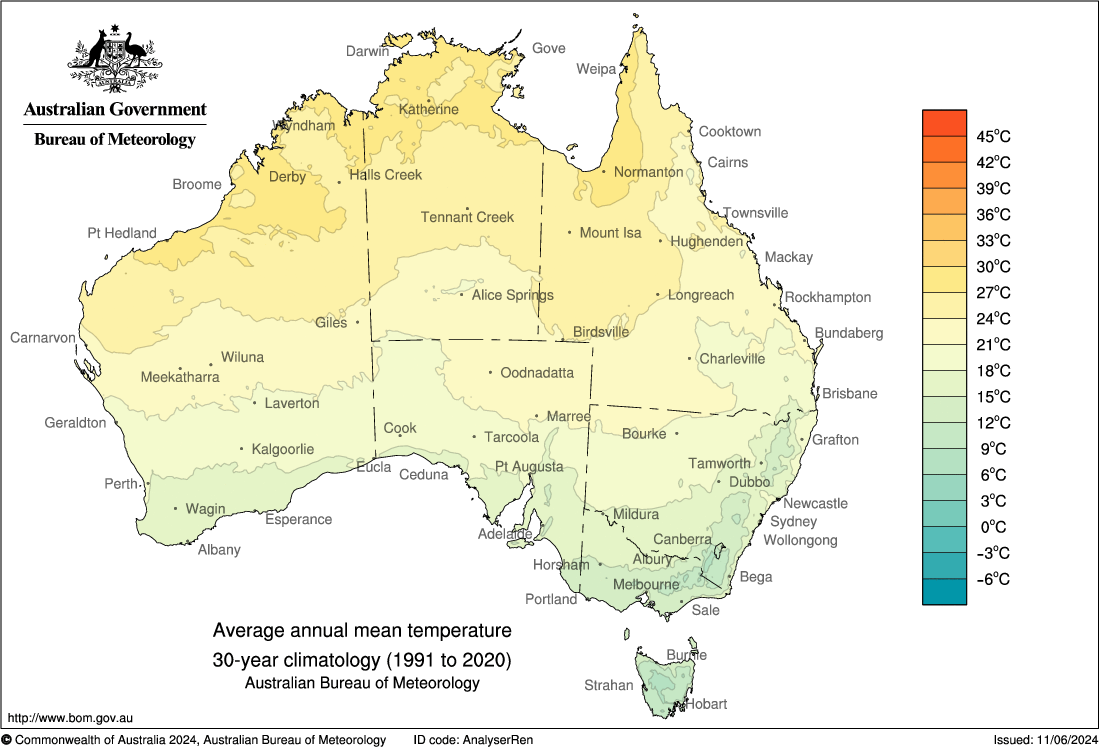

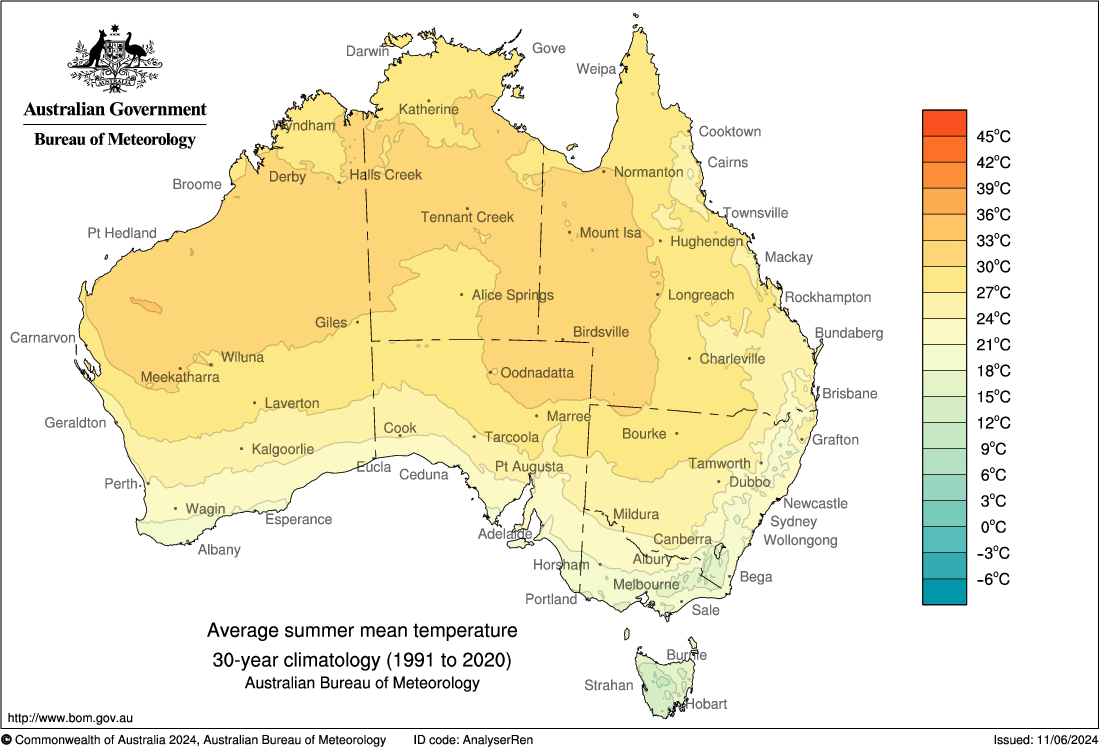


Смотрим по Сиднею. В самый жаркий сезон (лето), средняя температура около 21 - 24 градусов.


Рекомендации по эксплуатации: в помещении 22 - 26 градусов. Соответственно, кондиционер может пригодится летом.

Перейдем к вентиляции, ток воздуха в помещении способствует уменьшению влажности. Проанализируем влажность в Австралии [по гистограмме](https://travelask.ru/questions/787941-pogoda-v-avstralii-po-mesyatsam)

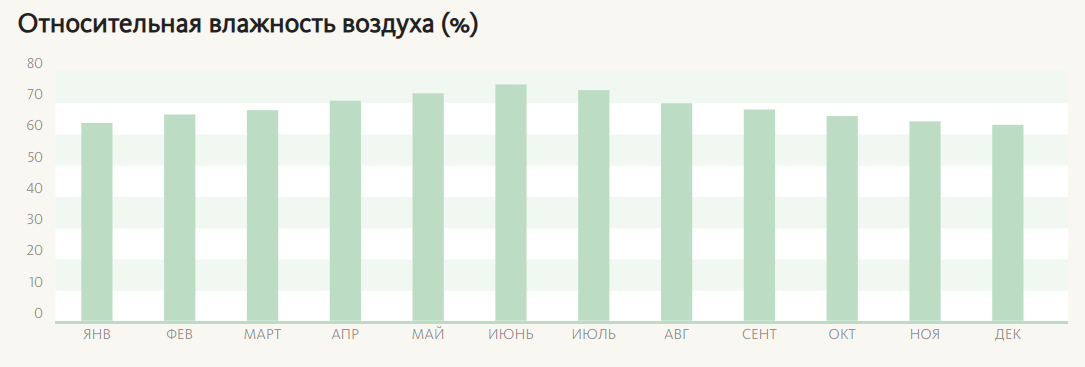

Относительная влажность держится около 60, т.е. на верхней границе нормы. Учитывая, что при несоблюдении условий может образоваться плесень - вентиляторы нужны круглый год.

Вытекает 2 варианта: продавать вентиляторы + кондиционеры или смешанный тип.

In [160]:
df = pd.read_csv("data_3.csv", delimiter=";")
df.head(3)

год время_года                       климат   город     страна  \
0  2010       Лето  Cубтропический океанический  Сидней  Австралия   
1  2010       Лето  Cубтропический океанический  Сидней  Австралия   
2  2010       Лето  Cубтропический океанический  Сидней  Австралия   

  способ_охлаждения режим_при_смешанном_типе_охлаждения  \
0         Смешанный                          Вентиляция   
1         Смешанный                          Вентиляция   
2         Смешанный                          Вентиляция   

          способ_обогрева  возраст      пол  ...  вентилятор  окно двери  \
0  Механическое отопление     55.0  Женский  ...           0    -1    -1   
1  Механическое отопление     55.0  Женский  ...           0     0     0   
2  Механическое отопление     45.0  Женский  ...           0    -1    -1   

   отопление среднемесячная_температура_на_улице  количество_рекламаций  \
0          0                                22.0                      0   
1          0                                22.0                      0   
2          0                                22.0                      0   

   температура_удовлетворительная_%  количество_рекламаций_кат  \
0                              56.2                       мало   
1                              56.2                       мало   
2                              56.2                       мало   

       возраст_кат  rh_кат  
0  средний возраст   норма  
1  средний возраст   норма  
2  средний возраст   норма  

[3 rows x 34 columns]

In [161]:
australia = df[df["страна"] == "Австралия"]
australia.head(3)

год время_года                       климат   город     страна  \
0  2010       Лето  Cубтропический океанический  Сидней  Австралия   
1  2010       Лето  Cубтропический океанический  Сидней  Австралия   
2  2010       Лето  Cубтропический океанический  Сидней  Австралия   

  способ_охлаждения режим_при_смешанном_типе_охлаждения  \
0         Смешанный                          Вентиляция   
1         Смешанный                          Вентиляция   
2         Смешанный                          Вентиляция   

          способ_обогрева  возраст      пол  ...  вентилятор  окно двери  \
0  Механическое отопление     55.0  Женский  ...           0    -1    -1   
1  Механическое отопление     55.0  Женский  ...           0     0     0   
2  Механическое отопление     45.0  Женский  ...           0    -1    -1   

   отопление среднемесячная_температура_на_улице  количество_рекламаций  \
0          0                                22.0                      0   
1          0                                22.0                      0   
2          0                                22.0                      0   

   температура_удовлетворительная_%  количество_рекламаций_кат  \
0                              56.2                       мало   
1                              56.2                       мало   
2                              56.2                       мало   

       возраст_кат  rh_кат  
0  средний возраст   норма  
1  средний возраст   норма  
2  средний возраст   норма  

[3 rows x 34 columns]

In [162]:
australia.columns

Index(['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
       'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст',
       'пол', 'ощущение_температуры', 'ощущение_температуры_(bool)',
       'предпочтительное_изменение_температуры',
       'ощущение_движения_воздуха_(bool)',
       'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес',
       'занавески', 'вентилятор', 'окно', 'двери', 'отопление',
       'среднемесячная_температура_на_улице', 'количество_рекламаций',
       'температура_удовлетворительная_%', 'количество_рекламаций_кат',
       'возраст_кат', 'rh_кат'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

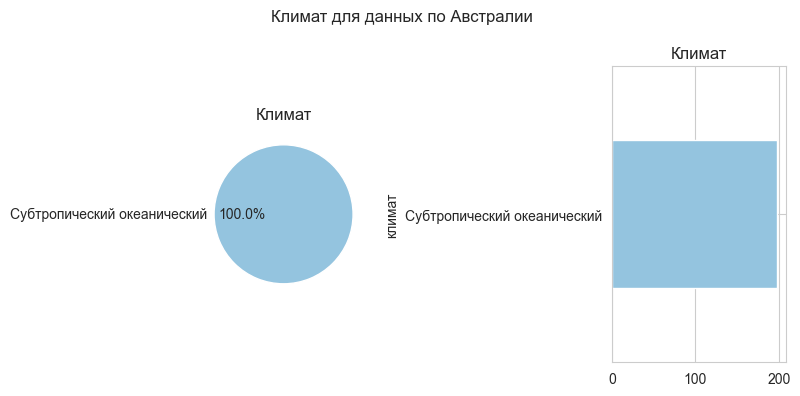

In [163]:
describe_nom_col("климат", australia, "Климат для данных по Австралии")

<Figure size 640x480 with 0 Axes>

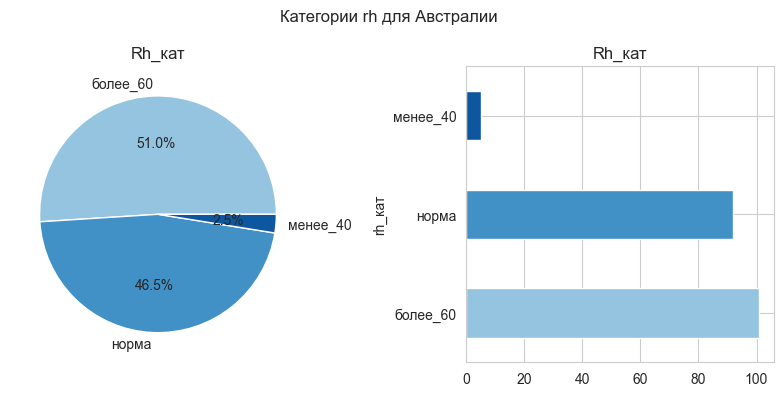

In [164]:
describe_nom_col("rh_кат", australia, "Категории rh для Австралии")

<Figure size 640x480 with 0 Axes>

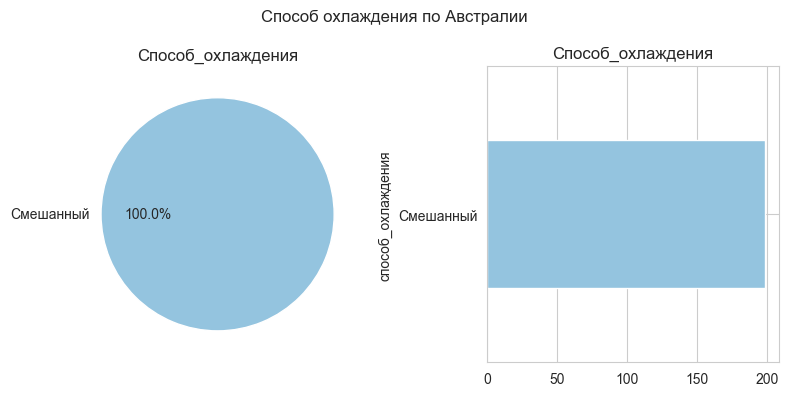

In [165]:
describe_nom_col("способ_охлаждения", australia, "Способ охлаждения по Австралии")

<Figure size 640x480 with 0 Axes>

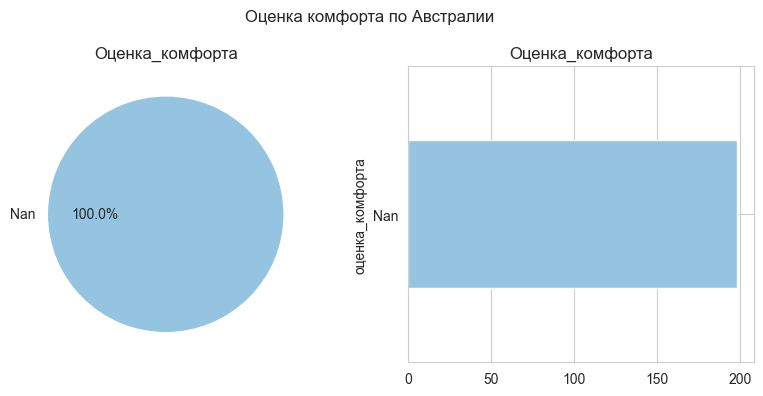

In [166]:
describe_nom_col("оценка_комфорта", australia, "Оценка комфорта по Австралии")

То есть данные только по смешанному. Хорошо, тогда посмотрим, что известно про режим при смешанном типе: вентиляцию и кондиционирование.

Поскольку про оценку комфорта информации нет - ориентируемся на другие столбцы:

для вентиляции - ощущение движения воздуха
для кондиционирования - ощущение температуры

<Figure size 640x480 with 0 Axes>

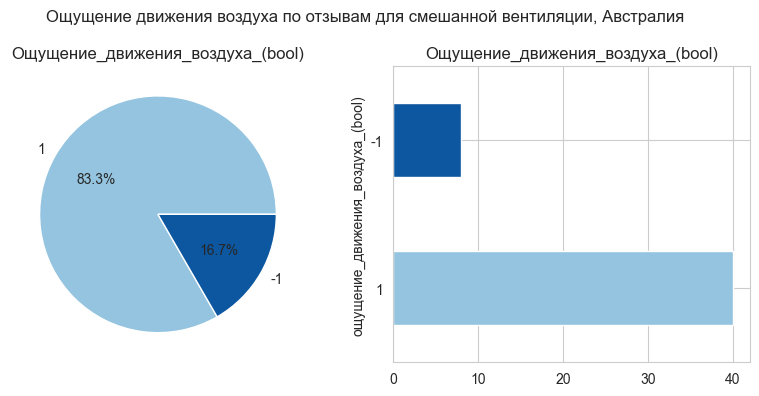

In [167]:
austr_cond = australia[australia["режим_при_смешанном_типе_охлаждения"] == "Кондиционирование"]
austr_vent = australia[australia["режим_при_смешанном_типе_охлаждения"] == "Вентиляция"]
describe_nom_col('ощущение_движения_воздуха_(bool)', austr_vent, "Ощущение движения воздуха по отзывам для смешанной вентиляции, Австралия")

<Figure size 640x480 with 0 Axes>

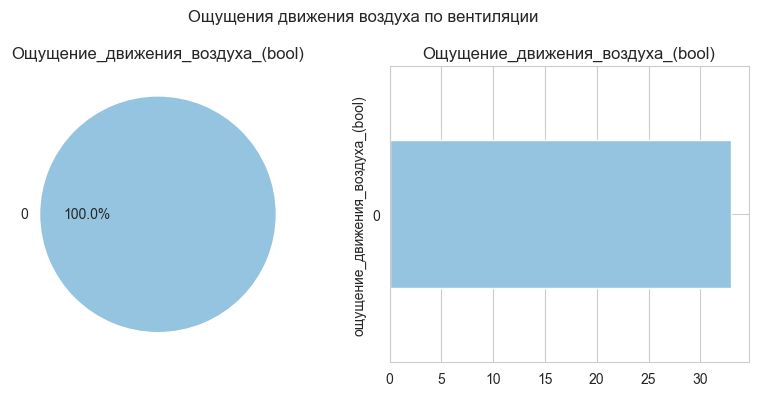

In [168]:
describe_nom_col('ощущение_движения_воздуха_(bool)', df[df["способ_охлаждения"] == "Вентиляция"], "Ощущения движения воздуха по вентиляции")

Следующая картина по вентиляции:
> больше 80% клиентов в Австралии при смешанном типе охлаждения и вентиляции довольны движеним воздуха

> по вентиляции есть 30 строк - про ощущения клиентов мы не знаем

 Впечатление: нужны доп. данные, пока оснований менять вентиляцию при смешанном типе на вентиляцию обычную нет

Способ охлаждения - кондиционирование - весь датасет

<Figure size 640x480 with 0 Axes>

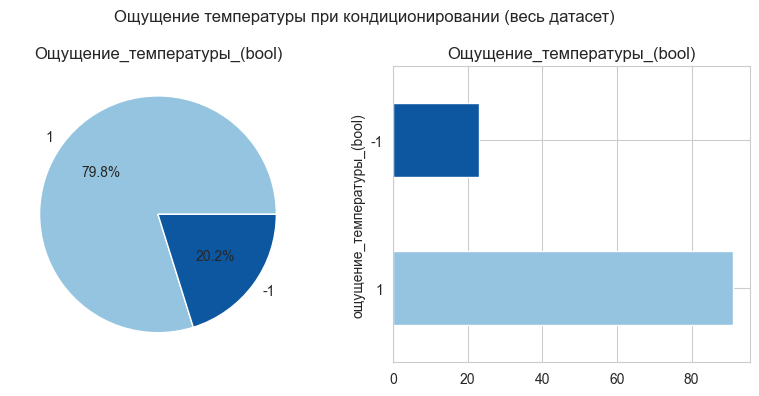

In [169]:
describe_nom_col('ощущение_температуры_(bool)', df[df["способ_охлаждения"] == "Кондиционирование"], "Ощущение температуры при кондиционировании (весь датасет)")

Режим при смешанном типе охлаждения - кондиционирование для Австралии

<Figure size 640x480 with 0 Axes>

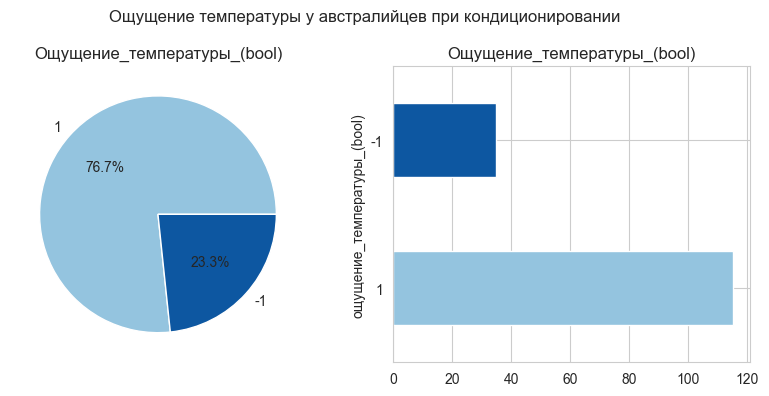

In [170]:
describe_nom_col('ощущение_температуры_(bool)', austr_cond, "Ощущение температуры у австралийцев при кондиционировании")

<Figure size 640x480 with 0 Axes>

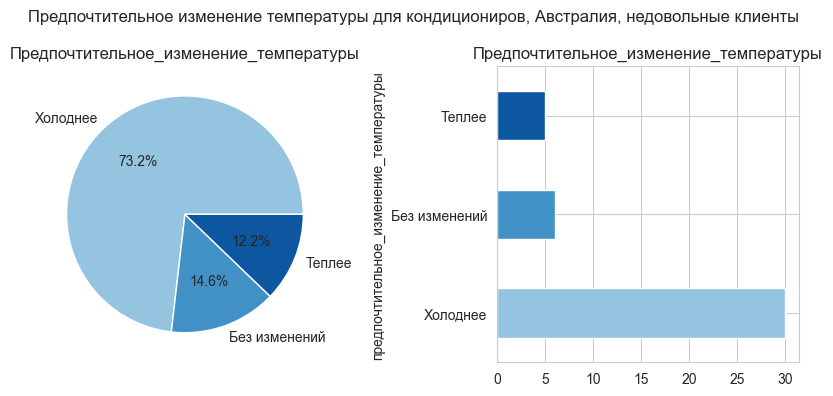

In [171]:
describe_nom_col("предпочтительное_изменение_температуры", austr_cond[austr_cond['ощущение_движения_воздуха_(bool)'] == -1], "Предпочтительное изменение температуры для кондициониров, Австралия, недовольные клиенты")

Смотрим отзывы недовольных Австралийцев

По кондиционированию разница незначительная. При смешанном типе довольных на 3% меньше, но уравновешивает то, что нужных строк больше и они собраны для конкретной страны.

**Вывод**
> Австралийцам подходит смешанный тип охлаждения. Переходить к другому по данным смысла не имеет. В идеале добавить совмещенный режим: и кондиционер, и вентилятор, чтобы расширить функционал.

### США

В Техасе высокие среднемесячные температуры (около 30 градусов), учитывая, что температура 19-21 градус считается комфортной по [СанПину](https://evrogenstroy.ru/wp-content/uploads/2020/05/%D0%93%D0%9E%D0%A1%D0%A2-30494-2011-1.pdf) - кондиционеры нужны.

Источники: https://pogoda.365c.ru/usa/texas-city/po_mesyacam

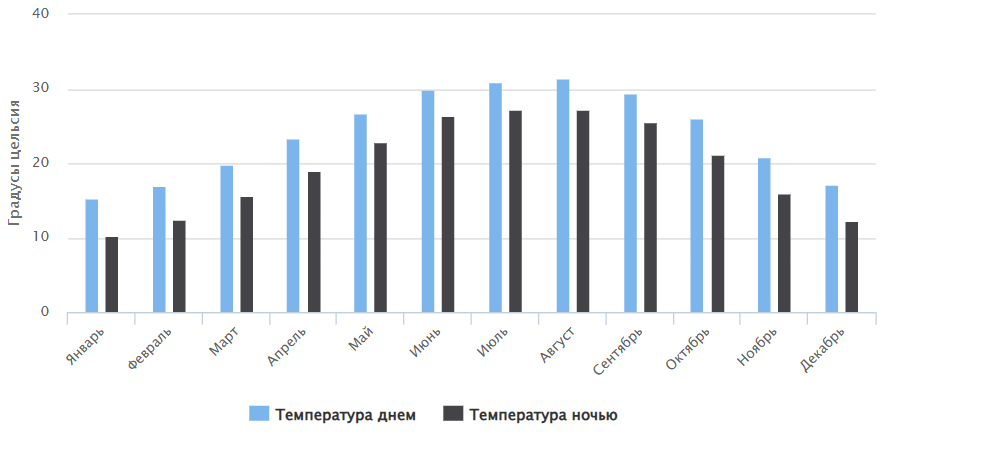

In [172]:
usa = df[df["страна"] == "США"]
usa.head(3)

год время_года                       климат  город страна  \
410  2011       Лето  Cубтропический океанический  Техас    США   
411  2011       Лето  Cубтропический океанический  Техас    США   
412  2011       Лето  Cубтропический океанический  Техас    США   

     способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
410  Кондиционирование                                 NaN             NaN   
411  Кондиционирование                                 NaN             NaN   
412  Кондиционирование                                 NaN             NaN   

     возраст  пол  ...  вентилятор  окно двери  отопление  \
410     27.0  NaN  ...           1     0     0          0   
411     31.0  NaN  ...           1     0     0          0   
412     34.0  NaN  ...           1     0     0          0   

    среднемесячная_температура_на_улице  количество_рекламаций  \
410                                28.9                      1   
411                                28.9                      1   
412                                32.8                      1   

     температура_удовлетворительная_%  количество_рекламаций_кат  \
410                              50.0                       мало   
411                              50.0                       мало   
412                              50.0                       мало   

         возраст_кат  rh_кат  
410  молодой возраст   норма  
411  молодой возраст   норма  
412  молодой возраст   норма  

[3 rows x 34 columns]

<Figure size 640x480 with 0 Axes>

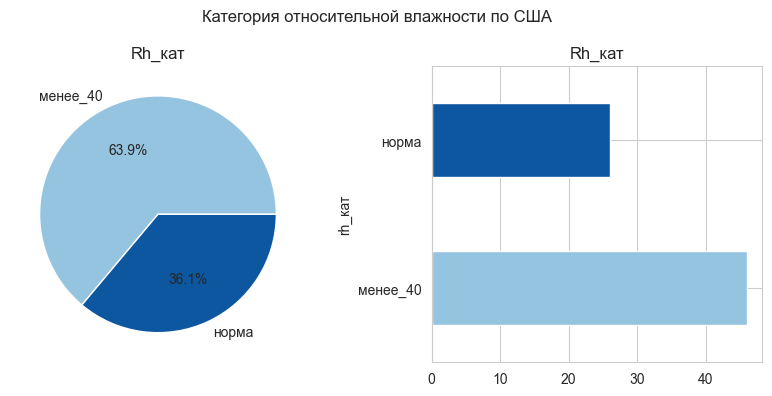

In [173]:
describe_nom_col("rh_кат", usa, "Категория относительной влажности по США")

<Figure size 640x480 with 0 Axes>

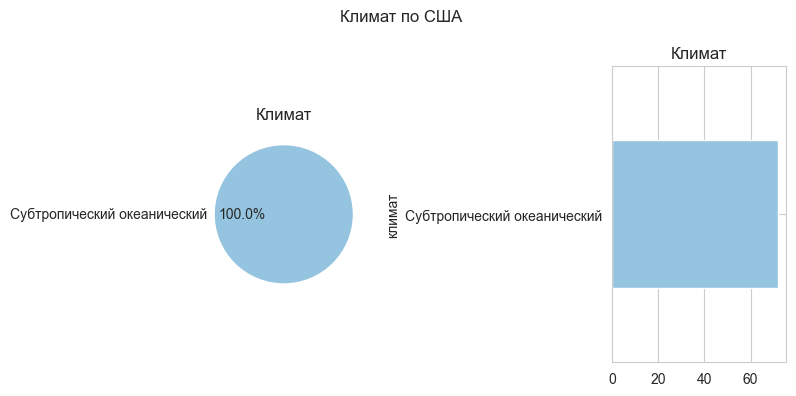

In [174]:
describe_nom_col("климат", usa, "Климат по США")

Техас известен своими уникальными климатическими условиями, характеризующимися теплым сухим воздухом в западных областях и влажной жаркой атмосферой на востоке. Восточная часть штата испытывает сильные летние дожди и повышенную влажность, в то время как западная область подвержена засухам и низкой относительной влажности.
[источник](https://ru.ruwiki.ru/wiki/%D0%9A%D0%BB%D0%B8%D0%BC%D0%B0%D1%82_%D0%A2%D0%B5%D1%85%D0%B0%D1%81%D0%B0)

Получается мы рассматриваем засушливый запад.

Мы можем повысить относительную влажность, если пары останутся в воздухе и он будет охлажден. И то - эффект будет незначительным

<Figure size 640x480 with 0 Axes>

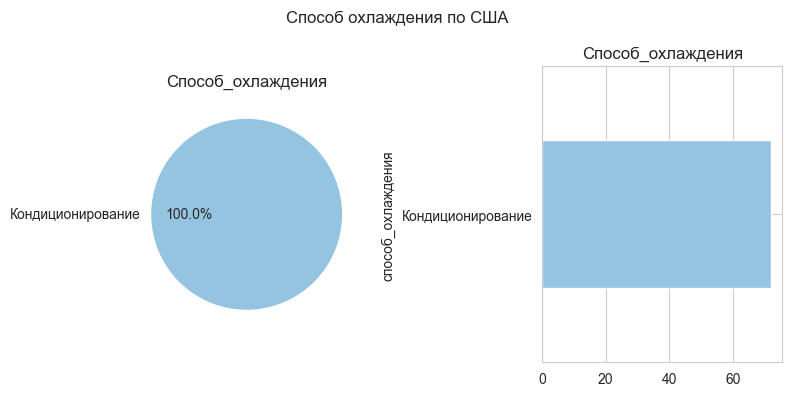

In [175]:
describe_nom_col("способ_охлаждения", usa, "Способ охлаждения по США")

Оцениваем только кондиционирование

<Figure size 640x480 with 0 Axes>

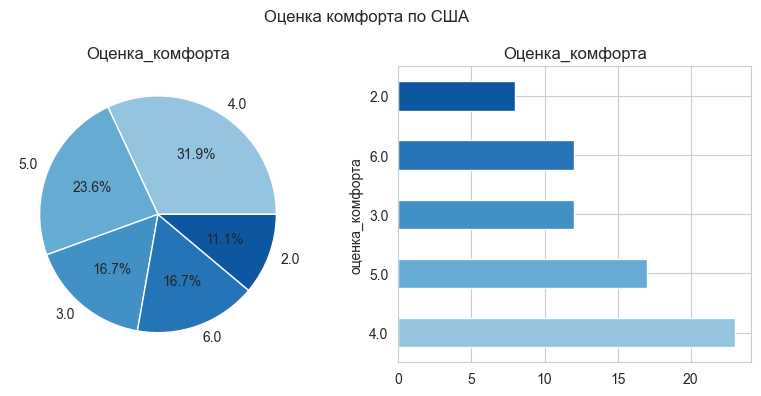

In [176]:
describe_nom_col("оценка_комфорта", usa, "Оценка комфорта по США")

Данные по оценке комфорта есть - укрупним категории

In [177]:
def rate_cat(rate):
    if rate >= 5:
        return "высокая"
    elif rate in [3.0, 4.0]:
        return "нейтральная"
    elif 1 <= rate <= 2:
        return "низкая"
    return "nan"


usa = usa.assign(оценка_кат=usa["оценка_комфорта"].apply(rate_cat))
usa.columns

Index(['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
       'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст',
       'пол', 'ощущение_температуры', 'ощущение_температуры_(bool)',
       'предпочтительное_изменение_температуры',
       'ощущение_движения_воздуха_(bool)',
       'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес',
       'занавески', 'вентилятор', 'окно', 'двери', 'отопление',
       'среднемесячная_температура_на_улице', 'количество_рекламаций',
       'температура_удовлетворительная_%', 'количество_рекламаций_кат',
       'возраст_кат', 'rh_кат', 'оценка_кат'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

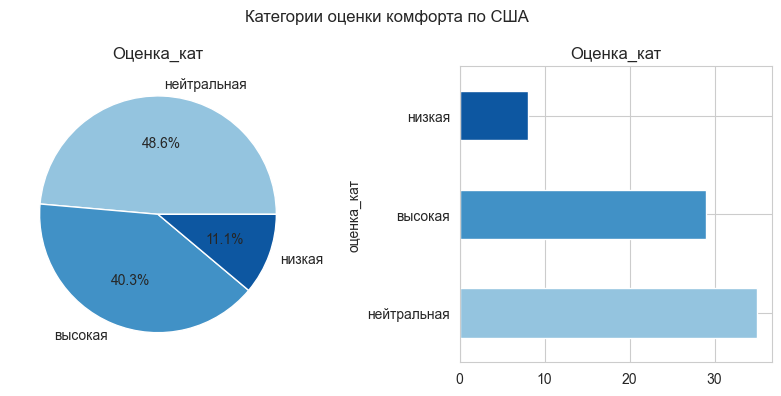

In [178]:
describe_nom_col("оценка_кат", usa, "Категории оценки комфорта по США")

Выходит, что большинство нейтрально => этих клиентов сложнее будет удержать, поэтому нужно разбираться.

<Figure size 640x480 with 0 Axes>

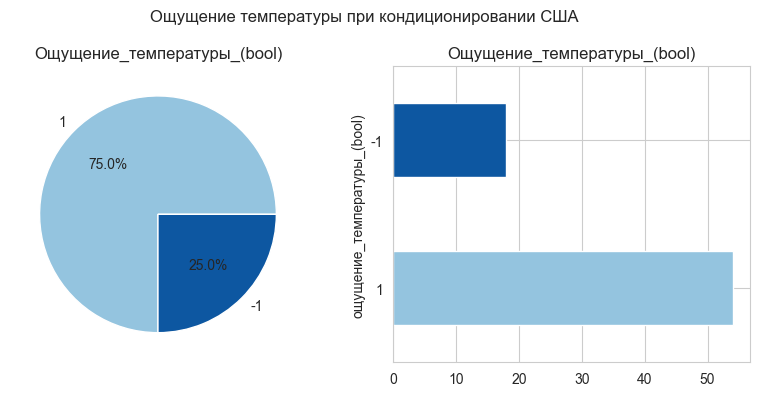

In [179]:
describe_nom_col("ощущение_температуры_(bool)", usa, "Ощущение температуры при кондиционировании США")

Большинство довольно температурой, но оценки низкие.

**Вывод**

> Техас - обширный штат. Данные, вероятно, с запада, где есть проблемы с сухостью воздуха. Клиенты довольны температурой, но установка сушит (или оставляет неизменным) воздух, что влияет на комфорт.

> Вариант 1: расширить продукцию и добавить увлажнение

> Вариант 2: распространять продукцию (смешанный тип охлаждения) на востоке Техаса

### Индия

1. Ахмедабад
* Расположен в западной части Индии, штат Гуджарат.
* Жаркий полузасушливый климат с ярко выраженными сезонами: сухой зимний (октябрь-март), горячий летний (апрель-май) и дождливый муссонный (июнь-сентябрь).
* Средние температуры варьируются от +20°C зимой до +40°C летом.
2. Бангалор
* Город расположен на юге Индии, штат Карнатака.
* Умеренно-тёплый климат благодаря высокогорью, средняя высота которого составляет около 900 метров над уровнем моря.
* Температуры колеблются от +15°C зимой до +30°C летом.

3. Дели
* Столичный регион северной Индии.
* Континентально-пустынный климат с четырьмя отчётливыми сезонами: весна, лето, осень и зима.
* Очень жаркое лето с максимальной температурой до +45°C, мягкие зимы с минимальной температурой около +5°C.
* Сухой воздух, интенсивная пыль и смог в зимнее время.
4. Хайдарабад
* Находится в южной центральной части Индии, столица штата Телангана.
* Субтропический муссонный климат с длинными жаркими месяцами и короткими мягкими зимами.
* Средняя температура колеблется от +15°C зимой до +40°C летом.
5. Ченнай
* Крупный портовый город на южном побережье Индии, штат Тамил Наду.
* Тропический климат с высокой влажностью круглогодично.
* Максимальная температура летом достигает +40°C, минимальная зимой — около +20°C.
6. Шимла
* Горный курортный город в Гималаях, штат Химачал-Прадеш.
* Высоко горный умеренный климат с чётко обозначёнными временами года.
* Лёгкая снежная зима (-2°C...+5°C), весеннее цветение (февраль-апрель), тёплое и мягкое лето (+15...+25°C), затяжная дождливая осень (с июля по сентябрь).



In [180]:
india = df[df["страна"] == "Индия"]
india.head(3)

год время_года                 климат      город страна  \
198  2012       Зима  Жаркий полузасушливый  Ахмедабад  Индия   
199  2012       Зима  Жаркий полузасушливый  Ахмедабад  Индия   
200  2012       Зима  Жаркий полузасушливый  Ахмедабад  Индия   

    способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
198        Вентиляция                                 NaN             NaN   
199        Вентиляция                                 NaN             NaN   
200        Вентиляция                                 NaN             NaN   

     возраст      пол  ...  вентилятор  окно двери  отопление  \
198     25.0  Женский  ...          -1    -1     0          0   
199     25.0  Мужской  ...          -1    -1     0          0   
200     45.0  Мужской  ...          -1    -1     0          0   

    среднемесячная_температура_на_улице  количество_рекламаций  \
198                                21.3                      0   
199                                21.3                      0   
200                                21.3                      0   

     температура_удовлетворительная_%  количество_рекламаций_кат  \
198                              50.7                       мало   
199                              57.2                       мало   
200                              57.2                       мало   

         возраст_кат    rh_кат  
198  молодой возраст  менее_40  
199  молодой возраст  менее_40  
200  средний возраст  менее_40  

[3 rows x 34 columns]

In [181]:
india["город"].unique()

array(['Ахмедабад', 'Бангалор', 'Дели', 'Хайдарабад', 'Ченнай', 'Шимла'],
      dtype=object)

In [182]:
india["климат"].value_counts()

климат
Тропическая влажная саванна         77
Жаркий полузасушливый               68
Влажный субтропический муссонный    35
Субтропическое высокогорье          32
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

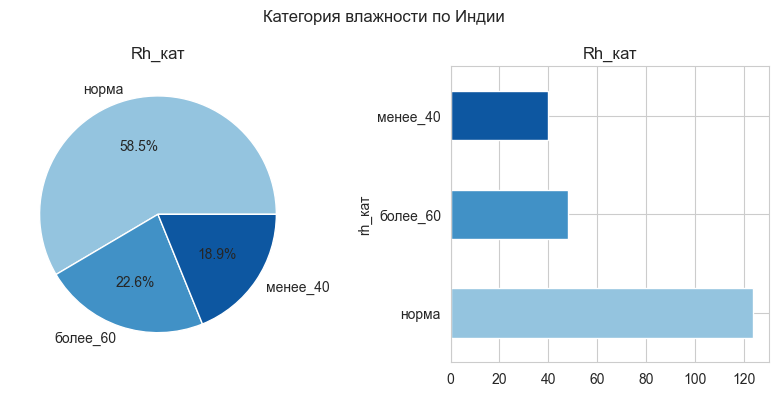

In [183]:
describe_nom_col("rh_кат", india, "Категория влажности по Индии")

#### Распределение городов по влажности

<Figure size 640x480 with 0 Axes>

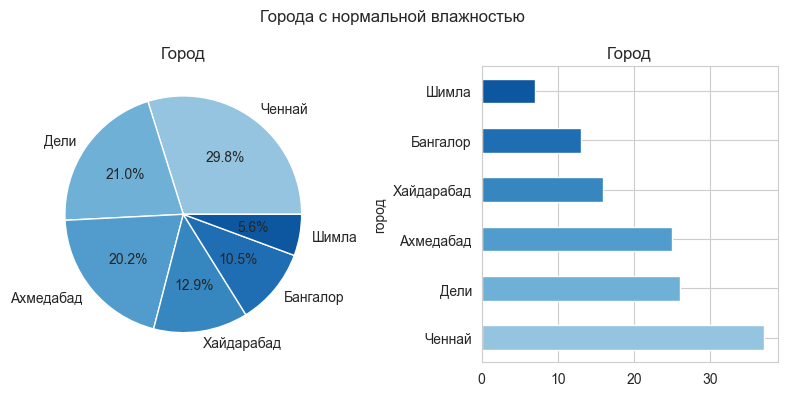

In [184]:
describe_nom_col("город", india[india["rh_кат"] == "норма"], "Города с нормальной влажностью")

<Figure size 640x480 with 0 Axes>

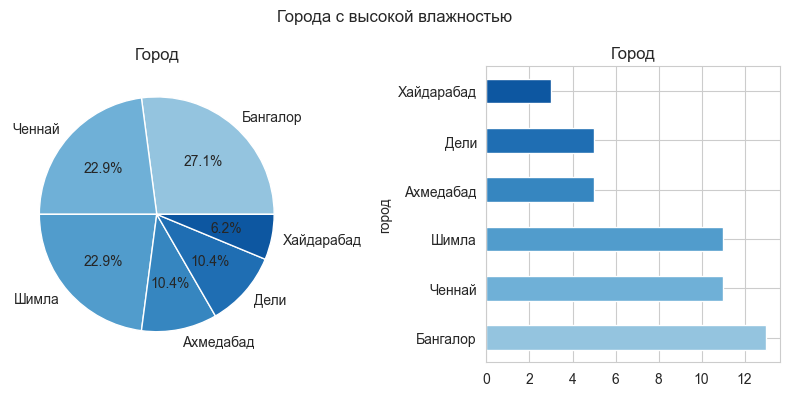

In [185]:
describe_nom_col("город", india[india["rh_кат"] == "более_60"], "Города с высокой влажностью")

<Figure size 640x480 with 0 Axes>

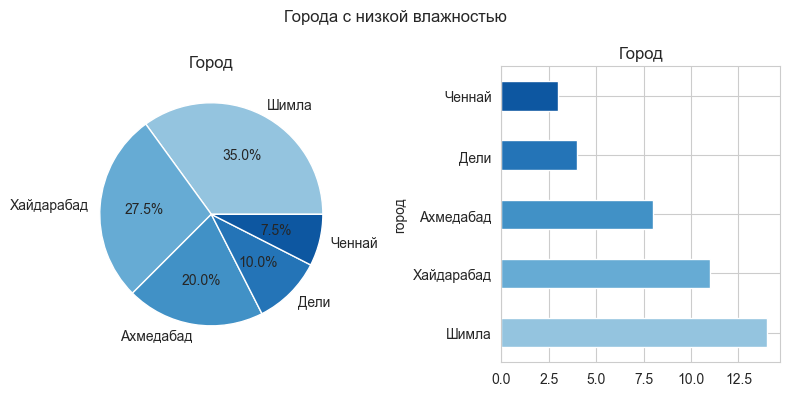

In [186]:
describe_nom_col("город", india[india["rh_кат"] == "менее_40"], "Города с низкой влажностью")

Очевидного распределения по влажности среди городов не наблюдаю

<Figure size 640x480 with 0 Axes>

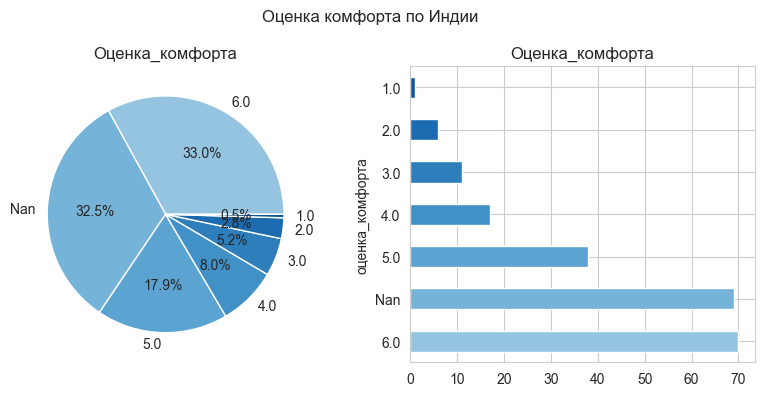

In [187]:
describe_nom_col("оценка_комфорта", india, "Оценка комфорта по Индии")

<Figure size 640x480 with 0 Axes>

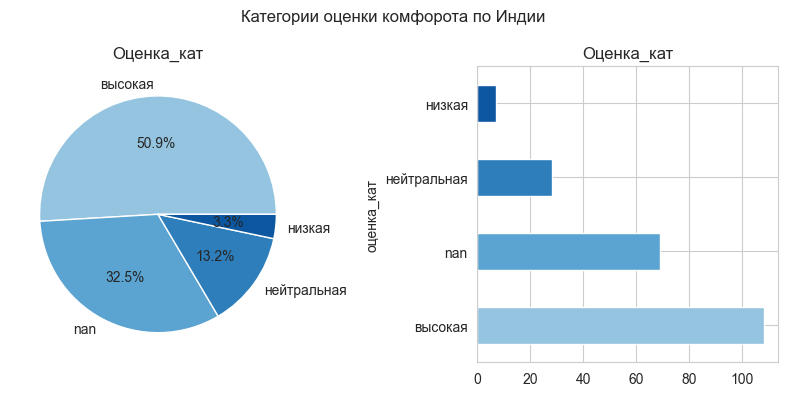

In [188]:
india = india.assign(оценка_кат=india["оценка_комфорта"].apply(rate_cat))
describe_nom_col("оценка_кат", india, "Категории оценки комфорота по Индии")

Большинство довольно, возможно, эти клиенты расположены к компании. Принимаем их мнения во внимание

#### Оценки комфорта в зависимости от установки

<Figure size 640x480 with 0 Axes>

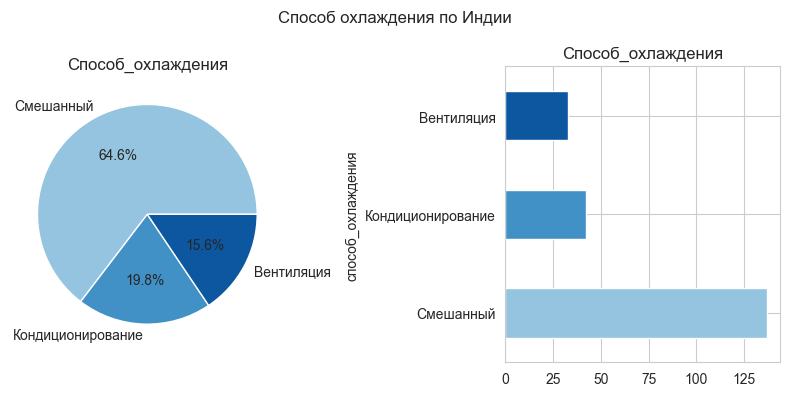

In [189]:
describe_nom_col("способ_охлаждения", india, "Способ охлаждения по Индии")

Основной способ охлаждения смешанный

<Figure size 640x480 with 0 Axes>

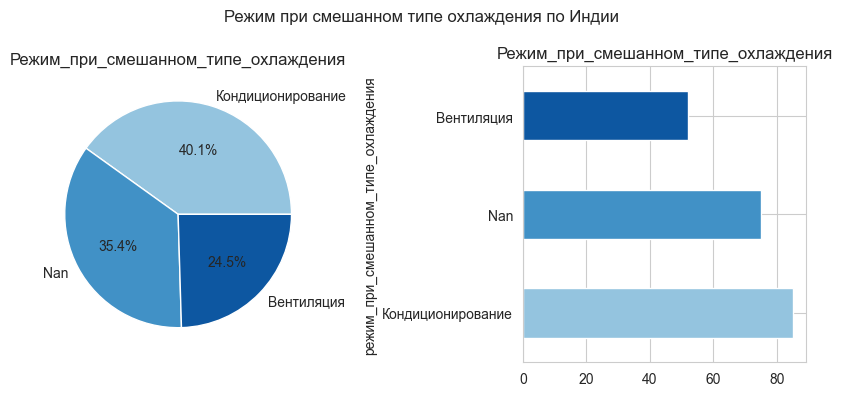

In [190]:
describe_nom_col('режим_при_смешанном_типе_охлаждения', india, "Режим при смешанном типе охлаждения по Индии")

<Figure size 640x480 with 0 Axes>

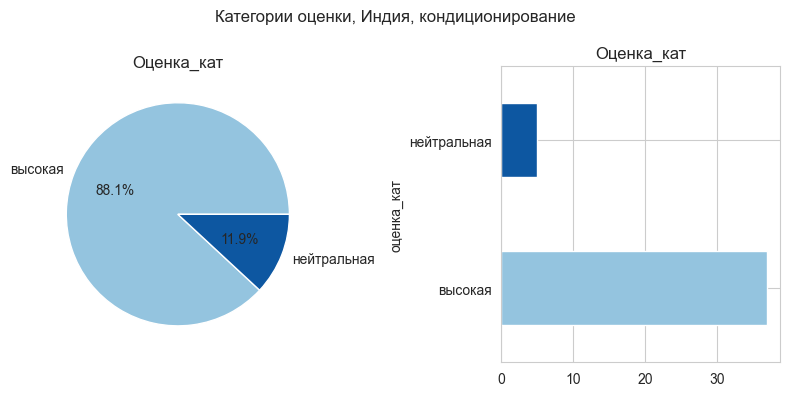

In [191]:
describe_nom_col("оценка_кат", india[india["способ_охлаждения"] == "Кондиционирование"], "Категории оценки, Индия, кондиционирование")

<Figure size 640x480 with 0 Axes>

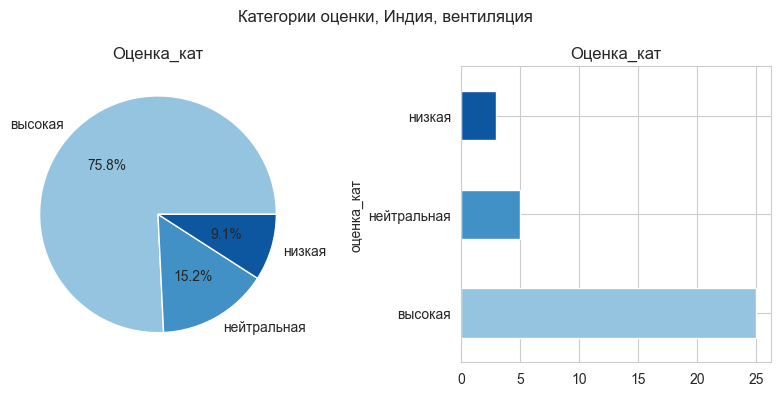

In [192]:
describe_nom_col("оценка_кат", india[india["способ_охлаждения"] == "Вентиляция"], "Категории оценки, Индия, вентиляция")

<Figure size 640x480 with 0 Axes>

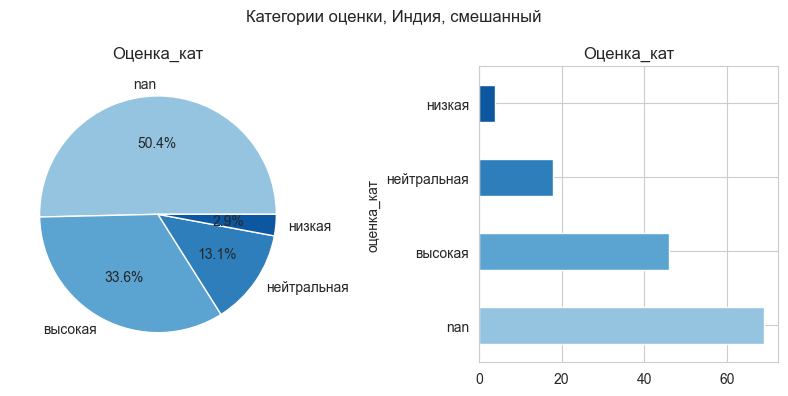

In [193]:
describe_nom_col("оценка_кат", india[india["способ_охлаждения"] == "Смешанный"], "Категории оценки, Индия, смешанный")

#### Оценки по городам

<Figure size 640x480 with 0 Axes>

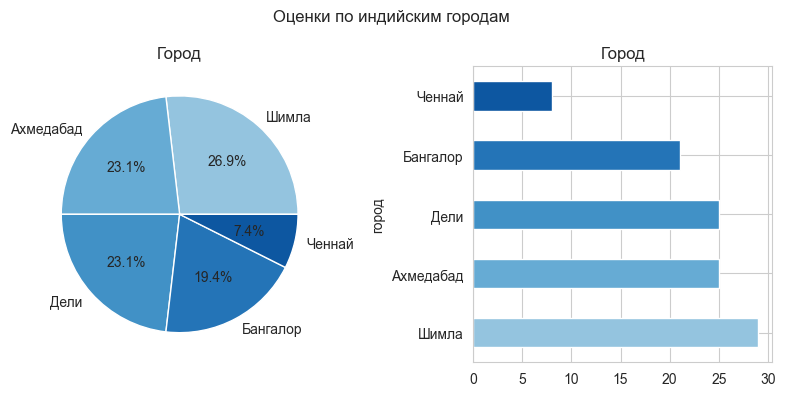

In [194]:
describe_nom_col("город", india[india["оценка_кат"] == "высокая"], "Оценки по индийским городам")

<Figure size 640x480 with 0 Axes>

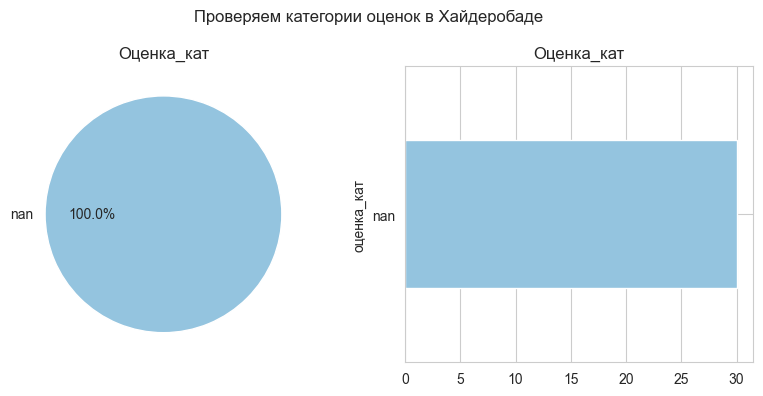

In [195]:
describe_nom_col("оценка_кат", india[india["город"] == "Хайдарабад"], "Проверяем категории оценок в Хайдеробаде")

#### Оценки по влажности

<Figure size 640x480 with 0 Axes>

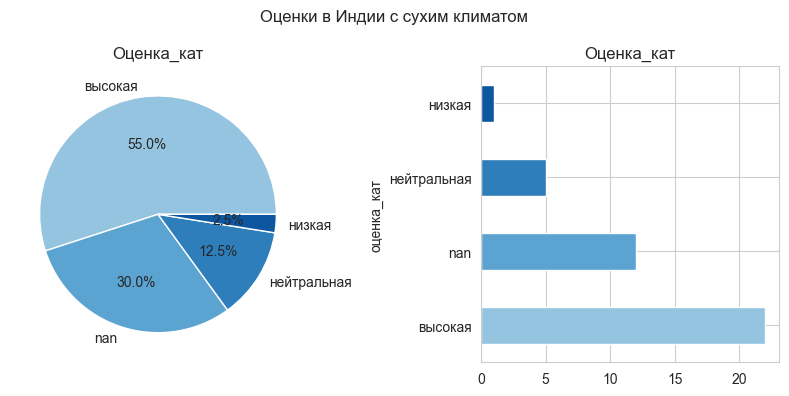

In [196]:
describe_nom_col("оценка_кат", india[india["rh_кат"] == "менее_40"], "Оценки в Индии с сухим климатом")

<Figure size 640x480 with 0 Axes>

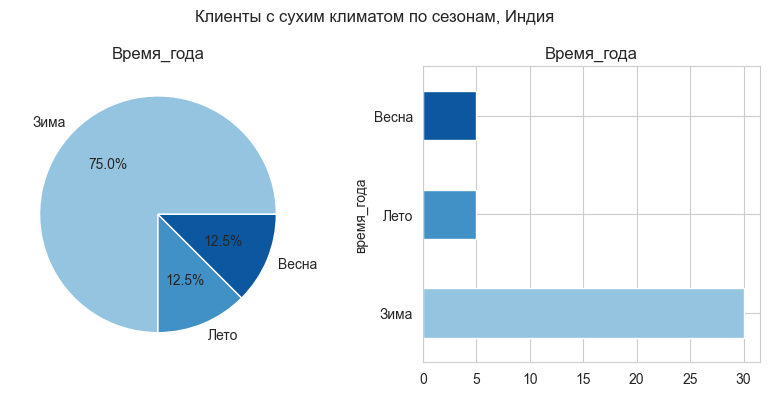

In [197]:
describe_nom_col("время_года", india[india["rh_кат"] == "менее_40"], "Клиенты с сухим климатом по сезонам, Индия")

<Figure size 640x480 with 0 Axes>

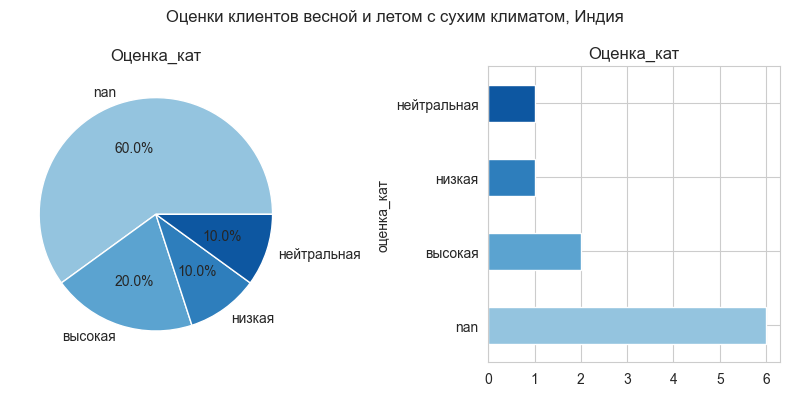

In [198]:
describe_nom_col("оценка_кат", india[(india["rh_кат"] == "менее_40") & (india["время_года"] != "Зима")], "Оценки клиентов весной и летом с сухим климатом, Индия")

<Figure size 640x480 with 0 Axes>

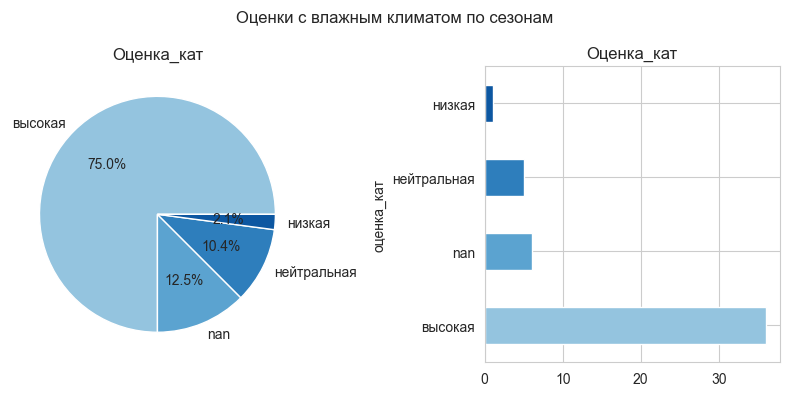

In [199]:
describe_nom_col("оценка_кат", india[(india["rh_кат"] == "более_60") ], "Оценки c влажным климатом по сезонам")

<Figure size 640x480 with 0 Axes>

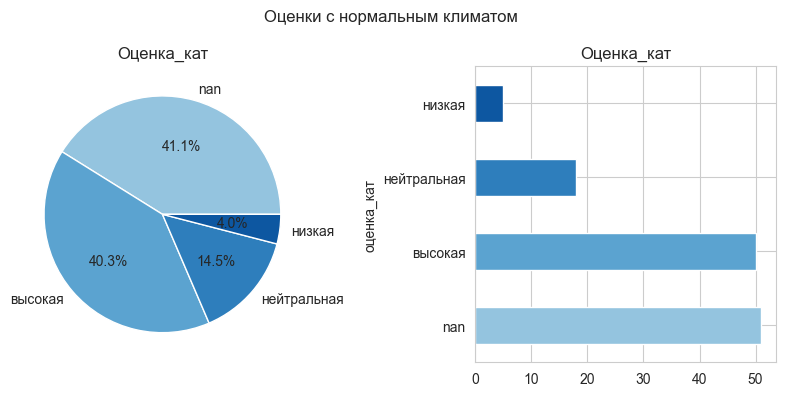

In [200]:
describe_nom_col("оценка_кат", india[(india["rh_кат"] == "норма") ], "Оценки c нормальным климатом")

Индийские клиенты показывают высокую лояльность. На момент 2012 года Индию можно было отнести к развивающимся странам, а США с Австралией - нет. Складывается впечатление, что клиенты из этой страны менее прихотливы - мы не знаем в каких условиях они работали до и сколько у них находится установка в принципе. Показатели хорошие, поэтому можно сбывать им продукцию, как есть. Для офисов стоит ставить смешанный тип, так как он может дольше удержать потребителей - из-за дополнительного обслуживания установки.

### Выводы

1. В США следует продавать установки влажной части штата - востоку, так как установка сушит воздух. (Или добавить увлажнители в линейку продуктов)
2. В Австралии нет оценок комфорта, но мало рекламаций + большинство довольны скорость движения воздудуха (при режиме вентиляция) и температурой (при режиме кондиционирования).
3. В Индии аудитория лояльна. Стоит обеспечить им хороший сервис (тех. осмотры, акции и онлайн-поддержку), чтобы поддерживать отношения.